In [1]:
from valurap import path_planning
import imp
import seaborn as sns

imp.reload(path_planning)

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
errors = []
solve = path_planning.solve_model_simple(0, 1370000-50000, 5000, 50, 300, errors)
solve
#df = pd.DataFrame(errors)
#hist = np.histogram2d(x=df["dj"], y=df["djj"], bins=19, weights=df["delta_v"]*df["delta_v"]+df["jerk"]*df["jerk"])
#hist = np.histogram2d(x=df["dj"], y=df["djj"], bins=19, weights=abs(df["jerk"]/250000))
#hist = np.histogram2d(x=df["dj"], y=df["djj"], bins=20*3*2+1, weights=abs(df["end_a"]/700000000) + abs(df["jerk"]/250000))
#print(hist[0])

#fig, ax = plt.subplots(figsize=(20, 10))
#im = ax.imshow(hist[0])
#cbar = fig.colorbar(im)

In [13]:
from math import sqrt
from numpy import array, absolute, isnan
from numpy.linalg import norm

from valurap import printer, commands
from valurap.asg import Asg, ProfileSegment, PathSegment

path_deltas = [
    [100.0, 100.0, 200.0],
    [100.0, -100.0, 100.0],
    [100.0, -200.0, 200.0],
    [-150.0, -50.0, 150.0],
    [-150.0, 150.0, 150.0],
    [10.0, -200.0, 200.0],
    [50.0, 200.0, 200.0],
    [-60.0, 100.0, 200.0],
] * 3

path_deltas = [
    [120.0, -0.0, 250.0],
    [-0.0, 120.0, 250.0],
    [-120.0, 50.0, 250.0],
    [50.0, -120.0, 250.0],
    [-50.0, -50.0, 150.0],
] * 3

path_deltas = [
    [10, 250.0, 200.0],
    [1, 25.0, 50.0],
    [2, 0.0, 30.0],
    [-1, -25.0, 50.0],
    [-10, -250.0,  200.0],
    [-1, -25.0, 50.0],
    [-2, 0.0, 30.0],
    [1, 25.0, 50.0],
] * 10

 
path_deltas = []
l = 25
v = 400

for i in range(0, 10):
    k = 2 - 0.05 * i
    k2 = 2 - 0.05 * (i + 0.5)
    path_deltas.append([   k*l,      0, v])
    path_deltas.append([       0, -k*l, v * 0.7])
    path_deltas.append([ -k2*l,      0, v])
    path_deltas.append([       0, k2*l, v * 0.7])
    

path = []
x = 0
y = 0
for dx, dy, speed in path_deltas:
    x += dx
    y += dy
    path.append([x, y, speed])
    
print(path)

path_k = [1.0] * len(path)
attempts = 0
while True:
    plan_errors = []
    real_path = []
    for i, (x, y, speed) in enumerate(path):
        real_path.append((x, y, speed * path_k[i]))
        
    print(real_path)
    pr_opt = path_planning.plan_path([0, 0], real_path, fatal=False, plan_errors = plan_errors)
    if plan_errors:
        i, et, vals, target = plan_errors[0]
        if vals is None:
            raise RuntimeError("unknown error")
        min_val = min(vals)
        assert min_val < target
        k = target/min_val * 1.1
        adj_i = i
        if et == "out_avail_exit":
            adj_i = i + 1
        elif et == "in_avail_enter":
            adj_i = i - 1
            
        print("adjust segment {} on {}/{}".format(adj_i, k, et))
        path_k[adj_i] = path_k[adj_i] / k
        print(path_k)
        attempts += 1
        if attempts == len(path) * 3:
            break
    else:
        break

import warnings
warnings.filterwarnings("error")

steps_opt = path_planning.emulate(pr_opt, 0)
steps_opt = pd.DataFrame(steps_opt)

print(plan_errors)
print(path_k)



[[50.0, 0, 400], [50.0, -50.0, 280.0], [0.625, -50.0, 400], [0.625, -0.625, 280.0], [49.375, -0.625, 400], [49.375, -49.375, 280.0], [1.25, -49.375, 400], [1.25, -1.25, 280.0], [48.75, -1.25, 400], [48.75, -48.75, 280.0], [1.875, -48.75, 400], [1.875, -1.875, 280.0], [48.125, -1.875, 400], [48.125, -48.125, 280.0], [2.5, -48.125, 400], [2.5, -2.5, 280.0], [47.5, -2.5, 400], [47.5, -47.5, 280.0], [3.125, -47.5, 400], [3.125, -3.125, 280.0], [46.875, -3.125, 400], [46.875, -46.875, 280.0], [3.75, -46.875, 400], [3.75, -3.75, 280.0], [46.25, -3.75, 400], [46.25, -46.25, 280.0], [4.375, -46.25, 400], [4.375, -4.375, 280.0], [45.625, -4.375, 400], [45.625, -45.625, 280.0], [5.0, -45.625, 400], [5.0, -5.0, 280.0], [45.0, -5.0, 400], [45.0, -45.0, 280.0], [5.625, -45.0, 400], [5.625, -5.625, 280.0], [44.375, -5.625, 400], [44.375, -44.375, 280.0], [6.25, -44.375, 400], [6.25, -6.25, 280.0]]
[(50.0, 0, 400.0), (50.0, -50.0, 280.0), (0.625, -50.0, 400.0), (0.625, -0.625, 280.0), (49.375, -0.625

x: in [0 0] in_target [0 0] cur_target [50.  0.]
speeds: prev [0 0] current [340.90909091   0.        ] next [   0.         -141.32723758]
avails: prev [0 0] current [50.  0.] next [  0. -25.]
enter_delta_v: [340.90909091   0.        ]
enter_time: 0.11363636363658637
enter_a: [3000.    0.]
enter_delta_x: [19.36983471  0.        ]
enter_t_first: [0.05681818 0.        ]
enter_t_second: [0.05681818 0.11363636]
enter_need_first: [0. 0.]
enter_need_second: [19.36983471  0.        ]
exit_delta_v: [-340.90909091 -141.32723758]
exit_time: 0.11363636363658637
exit_a: [-3000.         -1243.67969071]
exit_delta_x: [19.36983471 -8.02995668]
exit_t_first: [0.05681818 0.05681818]
exit_t_second: [0.05681818 0.05681818]
exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'targ

      fun: 0.006955242291601051
 hess_inv: array([[ 1.11808228e-02, -4.78128459e-08],
       [-4.78128459e-08,  3.66036982e-07]])
      jac: array([-0.00720065,  0.00688681])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 430
      nit: 11
     njev: 105
   status: 2
  success: False
        x: array([-0.21627075,  0.51241395])
old 39225810 -568490
new 39140976 -571403
sol_x: {'accel_j': 45738327, 'accel_jj': -667716, 'plato_v': 13138.853805541992, 'accel_x': -1783.6593864103631, 'plato_x': 5.659386408574107}
sol_y: {'accel_j': 39140976, 'accel_jj': -571403, 'plato_v': 1929983.0020751953, 'accel_x': 1550.6855084641556, 'plato_x': 831.3144915362612}
i: 3

Failed to plan full path
adjust segment 2 on 2.338135072313284/in_avail_enter
[0.8522727272743977, 0.5047401342168188, 0.34281261903144405, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 1
     njev: 87
   status: 2
  success: False
        x: array([-0.54088891,  0.33877716])
old -29385096 515528
new -29226155 517274
sol_x: {'accel_j': -70945100, 'accel_jj': 1255666, 'plato_v': -5894.971466064453, 'accel_x': 1587.9115164963762, 'plato_x': -17.911516509983016}
sol_y: {'accel_j': -29226155, 'accel_jj': 517274, 'plato_v': -976076.963394165, 'accel_x': -635.2488092701947, 'plato_x': -2965.7511907382527}
i: 1

x: in [50.21843392 -7.94061012] in_target [ 50. -50.] cur_target [  0.625 -50.   ]
speeds: prev [  -0.85783125 -142.03789228] current [-137.12504761    0.        ] next [  0. 280.]
avails: prev [ -0.21843392 -42.05938988] current [-49.375   0.   ] next [ 0.     24.6875]
enter_delta_v: [-136.26721636  142.0

decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
old 0 0
new 0 0
sol_x: {'accel_j': 71034524, 'accel_jj'

out_avail exit assert: [  0.859375 100.      ]
cur_target: [ 49.375 -49.375]
decel_end: [ 21.375 -49.375]
decel_start: [ 49.375 -29.775]
accel_start: [26.45897338 -0.61684549]
target_x: [ 22.91602662 -29.15815451]
args_x: {'in_v': 2256571, 'target_v': 0, 'target_x': 1833, 'accel_t': 140, 'plato_t': 34}
      fun: 0.0222827119931462
 hess_inv: array([[ 0.00424109, -0.00762353],
       [-0.00762353,  0.03154746]])
      jac: array([-1.62732322e-05, -5.44567592e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 14
     njev: 118
   status: 2
  success: False
        x: array([0.65131418, 1.376067  ])
old -45271450 646735
new -45566309 655635
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -5874, 'target_v': -1924145, 'target_x': -2333, 'accel_t': 140, 'plato_t': 34}
      fun: 0.06815670163619426
 hess_inv: array([[0.2222147 , 0.02395522],
       [0.02395522, 0.01894471]])
      jac: array([-0.00293612,  0.07773639])
  message: 'Desir

      fun: 0.005628682851315031
 hess_inv: array([[0.01782175, 0.00925495],
       [0.00925495, 0.01110215]])
      jac: array([0.00029467, 0.00974239])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 303
      nit: 6
     njev: 73
   status: 2
  success: False
        x: array([-0.72952368,  0.68909969])
old -73044196 2057583
new -72511321 2071762
cur_target: [  0.625 -50.   ]
args_y: {'in_v': -976077, 'target_v': 0, 'target_x': -404, 'accel_t': 71, 'plato_t': 292}
      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': 

exit_a: [-3000.         -1243.67969071]
exit_delta_x: [19.36983471 -8.02995668]
exit_t_first: [0.05681818 0.05681818]
exit_t_second: [0.05681818 0.05681818]
exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hes

enter_time: 0.14093096768474922
enter_a: [-2188.22642642  2000.        ]
enter_delta_x: [-22.31015662 -19.86153765]
enter_t_first: [0.07046548 0.07046548]
enter_t_second: [0.07046548 0.07046548]
enter_need_first: [ -0.28969292 -19.86153765]
enter_need_second: [-22.0204637   0.       ]
in_avail enter assert: [0.49991053 1.46940942]
exit_delta_v: [312.5 280. ]
exit_time: 0.14
exit_a: [2232.14285713 2000.        ]
exit_delta_x: [-21.875  19.6  ]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [-21.875   0.   ]
exit_need_second: [ 0.  19.6]
cur_target: [  1.25  -49.375]
decel_end: [  1.25  -29.775]
decel_start: [ 23.125 -49.375]
accel_start: [ 49.383834   -29.51359619]
target_x: [-26.258834   -19.86140381]
args_x: {'in_v': -28251, 'target_v': -2147484, 'target_x': -2101, 'accel_t': 141, 'plato_t': 14}
      fun: 0.00791715871234498
 hess_inv: array([[1.93190652, 0.1226146 ],
       [0.1226146 , 0.00791955]])
      jac: array([-0.00024557, -0.00078315])
  message: 'Des

exit_need_second: [5.17776523 0.        ]
cur_target: [ 0.625 -0.625]
decel_end: [ 5.80276523 -0.625     ]
decel_start: [ 0.625      -4.93986111]
accel_start: [  5.11796439 -50.00606874]
target_x: [-4.49296439 45.06620763]
args_x: {'in_v': -942986, 'target_v': 0, 'target_x': -359, 'accel_t': 65, 'plato_t': 310}
      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  success: False
        x: array([-1.26652181,  0.27621645])
old 87762642 -2700389
new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message:

        x: array([-0.57857349,  0.30130347])
old -71357958 1251894
new -70945100 1255666
cur_target: [ 50. -50.]
args_y: {'in_v': 0, 'target_v': -971193, 'target_x': -3601, 'accel_t': 114, 'plato_t': 261}
      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 1
     njev: 87
   status: 2
  success: False
        x: array([-0.54088891,  0.33877716])
old -29385096 515528
new -29226155 517274
sol_x: {'accel_j': -70945100, 'accel_jj': 1255666, 'plato_v': -5894.971466064453, 'accel_x': 1587.9115164963762, 'plato_x': -17.911516509983016}
sol_y: {'accel_j': -29226155, 'accel_jj': 517274, 'plato_v': -976076.963394165, 'accel_x': -635.2488092701947, 'plato_x': -2965.7511907382527}
i: 1

x: in [50.21843392 -7.94061012] in_target [ 50. -50.] cur_target [  0.625 -50.   ]
speeds: prev [  -0.

[(50.0, 0, 340.9090909097591), (50.0, -50.0, 141.32723758070927), (0.625, -50.0, 137.12504761257762), (0.625, -0.625, 131.37520477072457), (49.375, -0.625, 157.64817216803283), (49.375, -49.375, 127.2499519811509), (1.25, -49.375, 687.6230492610545), (1.25, -1.25, 280.0), (48.75, -1.25, 400.0), (48.75, -48.75, 280.0), (1.875, -48.75, 400.0), (1.875, -1.875, 280.0), (48.125, -1.875, 400.0), (48.125, -48.125, 280.0), (2.5, -48.125, 400.0), (2.5, -2.5, 280.0), (47.5, -2.5, 400.0), (47.5, -47.5, 280.0), (3.125, -47.5, 400.0), (3.125, -3.125, 280.0), (46.875, -3.125, 400.0), (46.875, -46.875, 280.0), (3.75, -46.875, 400.0), (3.75, -3.75, 280.0), (46.25, -3.75, 400.0), (46.25, -46.25, 280.0), (4.375, -46.25, 400.0), (4.375, -4.375, 280.0), (45.625, -4.375, 400.0), (45.625, -45.625, 280.0), (5.0, -45.625, 400.0), (5.0, -5.0, 280.0), (45.0, -5.0, 400.0), (45.0, -45.0, 280.0), (5.625, -45.0, 400.0), (5.625, -5.625, 280.0), (44.375, -5.625, 400.0), (44.375, -44.375, 280.0), (6.25, -44.375, 400.0

exit_t_first: [0.11460384 0.11460384]
exit_t_second: [0.11460384 0.11460384]
exit_need_first: [  0.         -14.58333333]
exit_need_second: [-78.80424298   0.        ]
out_avail exit assert: [  0.30534523 100.        ]
cur_target: [ 49.375 -49.375]
decel_end: [-29.42924298 -49.375     ]
decel_start: [ 49.375      -34.79166667]
accel_start: [44.35380446 -0.62367863]
target_x: [  5.02119554 -34.16798804]
args_x: {'in_v': 1088337, 'target_v': 0, 'target_x': 402, 'accel_t': 63, 'plato_t': 237}
      fun: 0.0052244511583920345
 hess_inv: array([[59.42044424, 60.08390386],
       [60.08390386, 60.75724693]])
      jac: array([-0.53588955,  0.53532333])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 328
      nit: 7
     njev: 79
   status: 2
  success: False
        x: array([-1.29088944,  0.3073979 ])
old -107823524 3422969
new -106431642 3433491
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -2733, 'accel_t': 63

new -85379896 2754188
sol_x: {'accel_j': -106399562, 'accel_jj': 3432383, 'plato_v': -2372.2447967529297, 'accel_x': 410.83730052253736, 'plato_x': -8.837300526920444}
sol_y: {'accel_j': -85379896, 'accel_jj': 2754188, 'plato_v': -875896.8589782715, 'accel_x': -313.02992881521163, 'plato_x': -3262.9700712050176}
i: 5

x: in [49.48927072 -4.53655274] in_target [ 49.375 -49.375] cur_target [  1.25  -49.375]
speeds: prev [  -0.34520705 -127.45976841] current [-190.87492797    0.        ] next [  0. 280.]
avails: prev [ -0.11427072 -44.83844726] current [-48.125   0.   ] next [ 0.     24.0625]
enter_delta_v: [-190.52972092  127.45976841]
enter_time: 0.063729884203223
enter_a: [-2989.64486288  2000.        ]
enter_delta_x: [-6.09321853 -4.06149814]
enter_t_first: [0.03186494 0.03186494]
enter_t_second: [0.03186494 0.03186494]
enter_need_first: [-0.011      -4.06149814]
enter_need_second: [-6.08221853  0.        ]
exit_delta_v: [190.87492797 280.        ]
exit_time: 0.14
exit_a: [1363.392342

      fun: 0.005628682851315031
 hess_inv: array([[0.01782175, 0.00925495],
       [0.00925495, 0.01110215]])
      jac: array([0.00029467, 0.00974239])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 303
      nit: 6
     njev: 73
   status: 2
  success: False
        x: array([-0.72952368,  0.68909969])
old -73044196 2057583
new -72511321 2071762
cur_target: [  0.625 -50.   ]
args_y: {'in_v': -976077, 'target_v': 0, 'target_x': -404, 'accel_t': 71, 'plato_t': 292}
      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': 

cur_target: [  1.25  -49.375]
args_y: {'in_v': -875897, 'target_v': 0, 'target_x': -325, 'accel_t': 64, 'plato_t': 150}
      fun: 0.005509639558322453
 hess_inv: array([[2.38598172e-02, 1.82941933e-06],
       [1.82941933e-06, 2.72542109e-06]])
      jac: array([0.00012951, 0.00242608])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 355
      nit: 5
     njev: 86
   status: 2
  success: False
        x: array([-0.73005588,  0.84578031])
old 84086112 -2627691
new 83472236 -2649915
sol_x: {'accel_j': -124568535, 'accel_jj': 3954557, 'plato_v': -1319203.3367614746, 'accel_x': -477.36778492719617, 'plato_x': -2303.6322150638}
sol_y: {'accel_j': 83472236, 'accel_jj': -2649915, 'plato_v': 5096.03825378418, 'accel_x': -333.89885399230934, 'plato_x': 8.898854000349843}
i: 6

x: in [ 43.41173476 -49.48721875] in_target [  1.25  -49.375] cur_target [ 1.25 -1.25]
speeds: prev [-191.96935126    0.74157117] current [  0. 280.] next [308.44155844   0.        ]

      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  success: False
        x: array([-1.26652181,  0.27621645])
old 87762642 -2700389
new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'acce

enter_t_first: [0.05131829 0.05131829]
enter_t_second: [0.05131829 0.05131829]
enter_need_first: [0.02729319 5.86842261]
enter_need_second: [15.82869216  0.        ]
exit_delta_v: [-308.44155844 -280.        ]
exit_time: 0.14
exit_a: [-2203.15398888 -2000.        ]
exit_delta_x: [ 21.59090909 -19.6       ]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [21.59090909  0.        ]
exit_need_second: [  0.  -19.6]
cur_target: [48.75 -1.25]
decel_end: [ 48.75 -20.85]
decel_start: [27.15909091 -1.25      ]
accel_start: [ 1.25612925 -7.1185636 ]
target_x: [25.90296166  5.8685636 ]
args_x: {'in_v': 3655, 'target_v': 2119594, 'target_x': 2072, 'accel_t': 103, 'plato_t': 33}
      fun: 0.008253338368432813
 hess_inv: array([[0.33708826, 0.27946683],
       [0.27946683, 0.2330682 ]])
      jac: array([ 0.001464  , -0.00191421])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 438
      nit: 15
     njev: 107
   status: 2
  success: False


      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  success: False
        x: array([-1.26652181,  0.27621645])
old 87762642 -2700389
new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'acce

decel_end: [ 48.75 -20.85]
decel_start: [39.85383454 -1.25      ]
accel_start: [ 1.25607346 -4.51830939]
target_x: [38.59776107  3.26830939]
args_x: {'in_v': 3454, 'target_v': 873343, 'target_x': 3088, 'accel_t': 57, 'plato_t': 275}
      fun: 0.0034625452697544996
 hess_inv: array([[3.54598928, 3.61146138],
       [3.61146138, 3.68738958]])
      jac: array([-0.01034663,  0.01124359])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 496
      nit: 22
     njev: 121
   status: 2
  success: False
        x: array([-1.47013323,  0.28937228])
old 105279855 -3694030
new 103732101 -3704719
cur_target: [48.75 -1.25]
args_y: {'in_v': 785716, 'target_v': 0, 'target_x': 261, 'accel_t': 57, 'plato_t': 275}
      fun: 0.004281316502558405
 hess_inv: array([[ 2.97698614e-02, -8.18438957e-05],
       [-8.18438957e-05,  5.87871544e-06]])
      jac: array([-0.00486468, -0.01358257])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nf

      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 11
     njev: 103
   status: 2
  success: False
        x: array([-0.97920929,  0.54428007])
old 97596840 -2957480
new 96641163 -2973577
cur_target: [49.375 -0.625]
args_y: {'in_v': 906331, 'target_v': 0, 'target_x': 348, 'accel_t': 66, 'plato_t': 244}
      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     njev: 106
   status: 2
  success: False
        x: array([-0.81984657,  0.70619811])
old -81814458 2479226
new -81143705 2496734
sol_x: {'accel_j': 96641163, 'accel_jj': -2973577, 'plato_v': 1088336.853652954,

      fun: 0.004281316502558405
 hess_inv: array([[ 2.97698614e-02, -8.18438957e-05],
       [-8.18438957e-05,  5.87871544e-06]])
      jac: array([-0.00486468, -0.01358257])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 13
     njev: 102
   status: 2
  success: False
        x: array([-0.9907896 ,  0.77753073])
old -95092672 3336585
new -94150504 3362528
sol_x: {'accel_j': 103732101, 'accel_jj': -3704719, 'plato_v': 876641.9423522949, 'accel_x': 281.4997692151877, 'plato_x': 2806.5002307631203}
sol_y: {'accel_j': -94150504, 'accel_jj': 3362528, 'plato_v': -2173.5193481445312, 'accel_x': 267.95835123607503, 'plato_x': -6.9583512463111665}
i: 8

x: in [ 4.77482058 -1.16883   ] in_target [48.75 -1.25] cur_target [ 48.75 -48.75]
speeds: prev [127.56819231  -0.31628869] current [   0. -280.] next [-304.38311688    0.        ]
avails: prev [43.97517942 -0.08117   ] current [  0.  -47.5] next [-23.4375   0.    ]
enter_delta_v: [-127.5681

i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.2224707  130.96815677]
enter_time: 0.06548407838659706
enter_a: [2095.50892486 2000.        ]
enter_delta_x: [-4.49294351  4.31481969]
enter_t_first: [0.03274204 0.03274204]
enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_a: [ 2399.96843306 -2000.        ]
exit_delta_x: [5.17776523 4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [0.         4.31486111]
exit_need_second: [5.17776523 0.        ]
cur_target: [ 0.625 -0.625]
decel_end: [ 5.80276523 -0.625     ]
decel_start: [ 0

exit_time: 0.05973145380924509
exit_a: [-2127.65753983 -2000.        ]
exit_delta_x: [ 3.79557783 -3.56784657]
exit_t_first: [0.02986573 0.02986573]
exit_t_second: [0.02986573 0.02986573]
exit_need_first: [3.79557783 0.        ]
exit_need_second: [ 0.         -3.56784657]
cur_target: [48.75 -1.25]
decel_end: [48.75       -4.81784657]
decel_start: [44.95442217 -1.25      ]
accel_start: [ 1.25607346 -4.51830939]
target_x: [43.69834871  3.26830939]
args_x: {'in_v': 3454, 'target_v': 873343, 'target_x': 3496, 'accel_t': 57, 'plato_t': 315}
      fun: 0.003656026556987238
 hess_inv: array([[0.0045348 , 0.00069241],
       [0.00069241, 0.00069929]])
      jac: array([-0.32130687,  0.32206341])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 11
     njev: 106
   status: 2
  success: False
        x: array([-1.277872 ,  0.4880326])
old 105279855 -3694030
new 103934513 -3712058
cur_target: [48.75 -1.25]
args_y: {'in_v': 785716, 'target_v': 0,

enter_need_second: [19.36983471  0.        ]
exit_delta_v: [-340.90909091 -141.32723758]
exit_time: 0.11363636363658637
exit_a: [-3000.         -1243.67969071]
exit_delta_x: [19.36983471 -8.02995668]
exit_t_first: [0.05681818 0.05681818]
exit_t_second: [0.05681818 0.05681818]
exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cu

accel_start: [ 0.63039181 -4.97368296]
target_x: [43.72942761  4.34868296]
args_x: {'in_v': 2184, 'target_v': 1083350, 'target_x': 3498, 'accel_t': 66, 'plato_t': 244}
      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 11
     njev: 103
   status: 2
  success: False
        x: array([-0.97920929,  0.54428007])
old 97596840 -2957480
new 96641163 -2973577
cur_target: [49.375 -0.625]
args_y: {'in_v': 906331, 'target_v': 0, 'target_x': 348, 'accel_t': 66, 'plato_t': 244}
      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     njev: 106
   status: 2
  success: False
 

enter_t_first: [0.02990179 0.02990179]
enter_t_second: [0.02990179 0.02990179]
enter_need_first: [-0.01195481 -3.57646741]
enter_need_second: [-3.77635449  0.        ]
exit_delta_v: [126.29193421 280.        ]
exit_time: 0.14
exit_a: [ 902.08524435 2000.        ]
exit_delta_x: [-8.84043539 19.6       ]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [-8.84043539  0.        ]
exit_need_second: [ 0.  19.6]
cur_target: [  1.875 -48.75 ]
decel_end: [  1.875 -29.15 ]
decel_start: [ 10.71543539 -48.75      ]
accel_start: [ 48.74945919 -45.17349275]
target_x: [-38.03402379  -3.57650725]
args_x: {'in_v': -2747, 'target_v': -867872, 'target_x': -3043, 'accel_t': 60, 'plato_t': 271}
      fun: 0.004387254826728258
 hess_inv: array([[32.42388328, 32.75515728],
       [32.75515728, 33.09137931]])
      jac: array([-0.42278136,  0.42529155])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 400
      nit: 11
     njev: 98
   status: 2
  succ

enter_delta_v: [-158.37385634 -126.81799601]
enter_time: 0.06340899800285901
enter_a: [-2497.65587426 -2000.        ]
enter_delta_x: [ 5.02116377 -4.04809092]
enter_t_first: [0.0317045 0.0317045]
enter_t_second: [0.0317045 0.0317045]
enter_need_first: [ 5.02116377 -0.01369495]
enter_need_second: [ 0.         -4.03439598]
exit_delta_v: [-190.87492797  127.24995198]
exit_time: 0.06362497599060152
exit_a: [-3000.  2000.]
exit_delta_x: [-6.07220635 -4.04813757]
exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [ 0.         -4.04813757]
exit_need_second: [-6.07220635  0.        ]
cur_target: [ 49.375 -49.375]
decel_end: [ 43.30279365 -49.375     ]
decel_start: [ 49.375      -45.32686243]
accel_start: [44.35380446 -0.62367863]
target_x: [  5.02119554 -44.7031838 ]
args_x: {'in_v': 1088337, 'target_v': 0, 'target_x': 402, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0036144666383809173
 hess_inv: array([[0.00933491, 0.00260471],
       [0.00260471, 0

speeds: prev [  -0.39980258 -119.60714715] current [-126.29193421    0.        ] next [  0. 280.]
avails: prev [ -0.13456805 -43.99642019] current [-46.875   0.   ] next [ 0.     23.4375]
enter_delta_v: [-125.89213163  119.60714715]
enter_time: 0.059803573575489814
enter_a: [-2105.09379468  2000.        ]
enter_delta_x: [-3.7883093  -3.57646741]
enter_t_first: [0.02990179 0.02990179]
enter_t_second: [0.02990179 0.02990179]
enter_need_first: [-0.01195481 -3.57646741]
enter_need_second: [-3.77635449  0.        ]
exit_delta_v: [126.29193421 280.        ]
exit_time: 0.14
exit_a: [ 902.08524435 2000.        ]
exit_delta_x: [-8.84043539 19.6       ]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [-8.84043539  0.        ]
exit_need_second: [ 0.  19.6]
cur_target: [  1.875 -48.75 ]
decel_end: [  1.875 -29.15 ]
decel_start: [ 10.71543539 -48.75      ]
accel_start: [ 48.74945919 -45.17349275]
target_x: [-38.03402379  -3.57650725]
args_x: {'in_v': -2747, 'target_v': -867872

        x: array([-0.72952368,  0.68909969])
old -73044196 2057583
new -72511321 2071762
cur_target: [  0.625 -50.   ]
args_y: {'in_v': -976077, 'target_v': 0, 'target_x': -404, 'accel_t': 71, 'plato_t': 292}
      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: pr

      fun: 0.023305713358579616
 hess_inv: array([[ 1.04354682, -0.1666788 ],
       [-0.1666788 ,  0.05390579]])
      jac: array([-0.04487385, -0.06844761])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 371
      nit: 2
     njev: 91
   status: 2
  success: False
        x: array([-0.62413122,  0.36885068])
old -30446150 608923
new -30256126 611169
sol_x: {'accel_j': 81357240, 'accel_jj': -1643587, 'plato_v': 2081167.1568603516, 'accel_x': 1194.2488692406882, 'plato_x': 823.751130761252}
sol_y: {'accel_j': -30256126, 'accel_jj': 611169, 'plato_v': -17759.447662353516, 'accel_x': 458.02940416894694, 'plato_x': -7.029404171277064}
i: 12

x: in [16.79968496 -1.78424088] in_target [48.125 -1.875] cur_target [ 48.125 -48.125]
speeds: prev [302.84968043  -2.58433977] current [   0. -280.] next [-400.    0.]
avails: prev [31.32531504 -0.09075912] current [  0.   -46.25] next [-22.8125   0.    ]
enter_delta_v: [-302.84968043 -277.41566023]
enter_time: 

      fun: 0.0036144666383809173
 hess_inv: array([[0.00933491, 0.00260471],
       [0.00260471, 0.00327136]])
      jac: array([-0.50402074,  0.50341699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 5
     njev: 122
   status: 2
  success: False
        x: array([-1.32064132,  0.27502804])
old -107823524 3422969
new -106399562 3432383
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -3576, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0029293262198100104
 hess_inv: array([[6.76319765, 6.87299124],
       [6.87299124, 6.9924814 ]])
      jac: array([ 0.02266923, -0.02262589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 5
     njev: 96
   status: 2
  success: False
        x: array([-1.11177378,  0.48313255])
old -86339799 2740946
new -85379896 2754188
sol_x: {'accel_j': -106399562, 'accel_jj': 3432383, 'plato_v': -2372.2447967529297, 'acc

enter_delta_x: [-3.7883093  -3.57646741]
enter_t_first: [0.02990179 0.02990179]
enter_t_second: [0.02990179 0.02990179]
enter_need_first: [-0.01195481 -3.57646741]
enter_need_second: [-3.77635449  0.        ]
exit_delta_v: [126.29193421 112.34036519]
exit_time: 0.05617018259625184
exit_a: [2248.38033938 2000.        ]
exit_delta_x: [-3.5469205   3.15508941]
exit_t_first: [0.02808509 0.02808509]
exit_t_second: [0.02808509 0.02808509]
exit_need_first: [-3.5469205  0.       ]
exit_need_second: [0.         3.15508941]
cur_target: [  1.875 -48.75 ]
decel_end: [  1.875      -45.59491059]
decel_start: [  5.4219205 -48.75     ]
accel_start: [ 48.74945919 -45.17349275]
target_x: [-43.32753869  -3.57650725]
args_x: {'in_v': -2747, 'target_v': -867872, 'target_x': -3466, 'accel_t': 60, 'plato_t': 313}
      fun: 0.002691967113889358
 hess_inv: array([[107.19282228, 109.0999166 ],
       [109.0999166 , 111.05304514]])
      jac: array([-0.01192589,  0.01440586])
  message: 'Desired error not neces

enter_a: [-3000.         -1235.39619982]
enter_delta_x: [19.63046004 -8.08379858]
enter_t_first: [0.05719916 0.05719916]
enter_t_second: [0.05719916 0.05719916]
enter_need_first: [19.63046004  0.        ]
enter_need_second: [ 0.         -8.08379858]
exit_delta_v: [-137.12504761  141.32723758]
exit_time: 0.07066361879035463
exit_a: [-1940.53248277  2000.        ]
exit_delta_x: [-4.84487605 -4.99334702]
exit_t_first: [0.03533181 0.03533181]
exit_t_second: [0.03533181 0.03533181]
exit_need_first: [ 0.         -4.99334702]
exit_need_second: [-4.84487605  0.        ]
cur_target: [ 50. -50.]
decel_end: [ 45.15512395 -50.        ]
decel_start: [ 50.         -45.00665298]
accel_start: [30.36953996  0.        ]
target_x: [ 19.63046004 -45.00665298]
args_x: {'in_v': 2358418, 'target_v': 0, 'target_x': 1570, 'accel_t': 114, 'plato_t': 261}
      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.772802

old -107823524 3422969
new -106399562 3432383
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -3576, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0029293262198100104
 hess_inv: array([[6.76319765, 6.87299124],
       [6.87299124, 6.9924814 ]])
      jac: array([ 0.02266923, -0.02262589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 5
     njev: 96
   status: 2
  success: False
        x: array([-1.11177378,  0.48313255])
old -86339799 2740946
new -85379896 2754188
sol_x: {'accel_j': -106399562, 'accel_jj': 3432383, 'plato_v': -2372.2447967529297, 'accel_x': 410.83730052253736, 'plato_x': -8.837300526920444}
sol_y: {'accel_j': -85379896, 'accel_jj': 2754188, 'plato_v': -875896.8589782715, 'accel_x': -313.02992881521163, 'plato_x': -3262.9700712050176}
i: 5

x: in [49.48927072 -4.53655274] in_target [ 49.375 -49.375] cur_target [  1.25  -49.375]
speeds: prev [  -0.34520705 -127.45976841] current

exit_t_first: [0.02808509 0.02808509]
exit_t_second: [0.02808509 0.02808509]
exit_need_first: [0.         3.15508941]
exit_need_second: [3.88278957 0.        ]
cur_target: [ 1.875 -1.875]
decel_end: [ 5.75778957 -1.875     ]
decel_start: [ 1.875      -5.03008941]
accel_start: [  5.42160134 -48.7484852 ]
target_x: [-3.54660134 43.71839578]
args_x: {'in_v': -870381, 'target_v': 0, 'target_x': -284, 'accel_t': 56, 'plato_t': 361}
      fun: 0.002179520808348722
 hess_inv: array([[33.82381127, 34.42439395],
       [34.42439395, 35.03968172]])
      jac: array([4.41638986e-06, 4.73487307e-06])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 15
     njev: 33
   status: 0
  success: True
        x: array([-1.50845487,  0.28229489])
old 109135124 -3897683
new 107488870 -3908686
cur_target: [ 1.875 -1.875]
args_y: {'in_v': 2301, 'target_v': 771997, 'target_x': 3497, 'accel_t': 56, 'plato_t': 361}
      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.001

cur_target: [ 50. -50.]
decel_end: [ 45.15512395 -50.        ]
decel_start: [ 50.         -45.00665298]
accel_start: [30.36953996  0.        ]
target_x: [ 19.63046004 -45.00665298]
args_x: {'in_v': 2358418, 'target_v': 0, 'target_x': 1570, 'accel_t': 114, 'plato_t': 261}
      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.77280298e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 431
      nit: 12
     njev: 106
   status: 2
  success: False
        x: array([-0.57857349,  0.30130347])
old -71357958 1251894
new -70945100 1255666
cur_target: [ 50. -50.]
args_y: {'in_v': 0, 'target_v': -971193, 'target_x': -3601, 'accel_t': 114, 'plato_t': 261}
      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily

      fun: 0.007751508791938479
 hess_inv: array([[ 0.00311962, -0.00304037],
       [-0.00304037,  0.00311997]])
      jac: array([ 0.00435713, -0.00445598])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 14
     njev: 131
   status: 2
  success: False
        x: array([-0.88246422,  0.69078968])
old -125693856 3927933
new -124584653 3955067
cur_target: [  1.25  -49.375]
args_y: {'in_v': -875897, 'target_v': 0, 'target_x': -325, 'accel_t': 64, 'plato_t': 188}
      fun: 0.004463789512431676
 hess_inv: array([[42.75066322, 43.45206912],
       [43.45206912, 44.17771341]])
      jac: array([-0.00133761,  0.00077319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 21
     njev: 104
   status: 2
  success: False
        x: array([-0.97016039,  0.60177182])
old 84086112 -2627691
new 83270342 -2643504
sol_x: {'accel_j': -124584653, 'accel_jj': 3955067, 'plato_v': -1319363.9155578613, 

decel_start: [ 1.875      -5.03008941]
accel_start: [  5.42160134 -48.7484852 ]
target_x: [-3.54660134 43.71839578]
args_x: {'in_v': -870381, 'target_v': 0, 'target_x': -284, 'accel_t': 56, 'plato_t': 361}
      fun: 0.002179520808348722
 hess_inv: array([[33.82381127, 34.42439395],
       [34.42439395, 35.03968172]])
      jac: array([4.41638986e-06, 4.73487307e-06])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 15
     njev: 33
   status: 0
  success: True
        x: array([-1.50845487,  0.28229489])
old 109135124 -3897683
new 107488870 -3908686
cur_target: [ 1.875 -1.875]
args_y: {'in_v': 2301, 'target_v': 771997, 'target_x': 3497, 'accel_t': 56, 'plato_t': 361}
      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  succ

adjust segment 14 on 2.045277329970913/in_avail_enter
[0.8522727272743977, 0.5047401342168188, 0.34281261903144405, 0.4691971598954449, 0.3941204304200821, 0.45446411421839605, 0.47718731992951136, 0.4079442492862482, 0.31772019515616173, 0.42665324149460776, 0.31572983552221506, 0.4012155899732275, 0.34562728707758217, 0.34494929586658096, 0.3621345494612702, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[(50.0, 0, 340.9090909097591), (50.0, -50.0, 141.32723758070927), (0.625, -50.0, 137.12504761257762), (0.625, -0.625, 131.37520477072457), (49.375, -0.625, 157.64817216803283), (49.375, -49.375, 127.2499519811509), (1.25, -49.375, 190.87492797180454), (1.25, -1.25, 114.22438980014948), (48.75, -1.25, 127.08807806246469), (48.75, -48.75, 119.46290761849018), (1.875, -48.75, 126.29193420888602), (1.875, -1.875, 112.3403651925037), (48.125, -1.875, 138.25091483103287), (48.125, -48.125, 96.58580284264266), (2.

      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 11
     njev: 103
   status: 2
  success: False
        x: array([-0.97920929,  0.54428007])
old 97596840 -2957480
new 96641163 -2973577
cur_target: [49.375 -0.625]
args_y: {'in_v': 906331, 'target_v': 0, 'target_x': 348, 'accel_t': 66, 'plato_t': 244}
      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     njev: 106
   status: 2
  success: False
        x: array([-0.81984657,  0.70619811])
old -81814458 2479226
new -81143705 2496734
sol_x: {'accel_j': 96641163, 'accel_jj': -2973577, 'plato_v': 1088336.853652954,

exit_t_first: [0.02986573 0.02986573]
exit_t_second: [0.02986573 0.02986573]
exit_need_first: [ 0.         -3.56784657]
exit_need_second: [-3.77180042  0.        ]
cur_target: [ 48.75 -48.75]
decel_end: [ 44.97819958 -48.75      ]
decel_start: [ 48.75       -45.18215343]
accel_start: [44.94943478 -1.25579555]
target_x: [  3.80056522 -43.92635788]
args_x: {'in_v': 876436, 'target_v': 0, 'target_x': 304, 'accel_t': 60, 'plato_t': 338}
      fun: 0.004578187299704058
 hess_inv: array([[582.25514769, 583.36321145],
       [583.36321145, 584.47625868]])
      jac: array([-0.47450556,  0.47711078])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 14
     njev: 118
   status: 2
  success: False
        x: array([-1.14063216,  0.54078346])
old -95730180 3191006
new -94638251 3208262
cur_target: [ 48.75 -48.75]
args_y: {'in_v': -1828, 'target_v': -820943, 'target_x': -3514, 'accel_t': 60, 'plato_t': 338}
      fun: 0.00506440239204639
 hess_in

enter_t_second: [0.06993493 0.06993493]
enter_need_first: [-10.16413756   0.01820389]
enter_need_second: [ 0.         19.58177917]
exit_delta_v: [ 400. -280.]
exit_time: 0.14
exit_a: [ 2857.14285714 -2000.        ]
exit_delta_x: [28.  19.6]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [ 0.  19.6]
exit_need_second: [28.  0.]
out_avail exit assert: [  0.80357143 100.        ]
cur_target: [ 2.5 -2.5]
decel_end: [30.5 -2.5]
decel_start: [  2.5 -22.1]
accel_start: [ 12.66416489 -48.12508402]
target_x: [-10.16416489  26.02508402]
args_x: {'in_v': -998749, 'target_v': 0, 'target_x': -813, 'accel_t': 140, 'plato_t': 23}
      fun: 0.16076628692862618
 hess_inv: array([[ 9.37007497, -4.70026391],
       [-4.70026391,  3.63932873]])
      jac: array([-0.00083062,  0.00020224])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 2
     njev: 138
   status: 2
  success: False
        x: array([-0.09222429,  0.05116698])
old 

      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 11
     njev: 103
   status: 2
  success: False
        x: array([-0.97920929,  0.54428007])
old 97596840 -2957480
new 96641163 -2973577
cur_target: [49.375 -0.625]
args_y: {'in_v': 906331, 'target_v': 0, 'target_x': 348, 'accel_t': 66, 'plato_t': 244}
      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     njev: 106
   status: 2
  success: False
        x: array([-0.81984657,  0.70619811])
old -81814458 2479226
new -81143705 2496734
sol_x: {'accel_j': 96641163, 'accel_jj': -2973577, 'plato_v': 1088336.853652954,

      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 145
   status: 2
  success: False
        x: array([-1.29487848,  0.49974356])
old 118851656 -4244702
new 117312671 -4265915
cur_target: [48.125 -1.875]
args_y: {'in_v': 773683, 'target_v': 0, 'target_x': 254, 'accel_t': 56, 'plato_t': 282}
      fun: 0.006480020784461571
 hess_inv: array([[0.5102764 , 0.51070846],
       [0.51070846, 0.5133892 ]])
      jac: array([-0.40797952,  0.41324464])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 33
     njev: 121
   status: 2
  success: False
        x: array([-0.93504454,  0.87382835])
old -97010368 3464656
new -96103278 3494931
sol_x: {'accel_j': 117312671, 'accel_jj': -4265915, 'plato_v': 954106.7540740967, 'accel_x':

      fun: 0.002047410022024527
 hess_inv: array([[5.98205655e-06, 1.20990991e-04],
       [1.20990991e-04, 2.46347001e-03]])
      jac: array([ 0.01332114, -0.00026649])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 17
     njev: 148
   status: 2
  success: False
        x: array([-0.56060517,  0.14974789])
old 39491068 -560157
new 39269679 -560996
cur_target: [47.5 -2.5]
args_y: {'in_v': 1935902, 'target_v': 0, 'target_x': 1587, 'accel_t': 141, 'plato_t': 14}
      fun: 0.14670323316008305
 hess_inv: array([[0.83439319, 0.29097235],
       [0.29097235, 0.58521121]])
      jac: array([0.04448494, 0.1379531 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 256
      nit: 1
     njev: 61
   status: 2
  success: False
        x: array([-0.29268229,  0.29088133])
old -38289184 543109
new -38177118 544689
sol_x: {'accel_j': 39269679, 'accel_jj': -560996, 'plato_v': 2009610.6834716797, 'accel_x': 1

enter_t_first: [0.03297214 0.03297214]
enter_t_second: [0.03297214 0.03297214]
enter_need_first: [0.01048127 4.34864778]
enter_need_second: [5.19799743 0.        ]
exit_delta_v: [-157.64817217 -127.24995198]
exit_time: 0.06362497599057546
exit_a: [-2477.77181388 -2000.        ]
exit_delta_x: [ 5.01518058 -4.04813757]
exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [5.01518058 0.        ]
exit_need_second: [ 0.         -4.04813757]
cur_target: [49.375 -0.625]
decel_end: [49.375      -4.67313757]
decel_start: [44.35981942 -0.625     ]
accel_start: [ 0.63039181 -4.97368296]
target_x: [43.72942761  4.34868296]
args_x: {'in_v': 2184, 'target_v': 1083350, 'target_x': 3498, 'accel_t': 66, 'plato_t': 244}
      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 42

        x: array([-0.84204865,  0.84141779])
old 89777100 -2992570
new 89021133 -3017750
sol_x: {'accel_j': -93110487, 'accel_jj': 3156290, 'plato_v': -870380.8452911377, 'accel_x': -294.5066474264735, 'plato_x': -3171.493352578558}
sol_y: {'accel_j': 89021133, 'accel_jj': -3017750, 'plato_v': 2300.8343200683594, 'accel_x': -294.3837791189452, 'plato_x': 8.383779113430023}
i: 10

x: in [ 45.0681261  -48.85328999] in_target [  1.875 -48.75 ] cur_target [ 1.875 -1.875]
speeds: prev [-126.65708277    0.33481546] current [  0.         112.34036519] next [138.25091483   0.        ]
avails: prev [-43.1931261    0.10328999] current [ 0.    46.875] next [23.125  0.   ]
enter_delta_v: [126.65708277 112.00554973]
enter_time: 0.05600277486635108
enter_a: [2261.62155488 2000.        ]
enter_delta_x: [-3.54657405  3.15506139]
enter_t_first: [0.02800139 0.02800139]
enter_t_second: [0.02800139 0.02800139]
enter_need_first: [-3.54657405  0.0093753 ]
enter_need_second: [0.         3.14568609]
exit_delt

      fun: 0.01352498436457681
 hess_inv: array([[ 823.08039992, -444.65842118],
       [-444.65842118,  241.08445252]])
      jac: array([0.01148136, 0.01647054])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 308
      nit: 1
     njev: 74
   status: 2
  success: False
        x: array([-0.65921037,  0.37161591])
old -22873376 471616
new -22722592 473369
sol_x: {'accel_j': 84776586, 'accel_jj': -1766188, 'plato_v': 2035161.4753417969, 'accel_x': 1134.7660765750334, 'plato_x': 829.2339234259315}
sol_y: {'accel_j': -22722592, 'accel_jj': 473369, 'plato_v': -10509.20816040039, 'accel_x': 314.28201497334385, 'plato_x': -4.282014975487414}
i: 16

x: in [16.68563705 -2.44784115] in_target [47.5 -2.5] cur_target [ 47.5 -47.5]
speeds: prev [296.15497265  -1.52929106] current [   0. -280.] next [-400.    0.]
avails: prev [30.81436295 -0.05215885] current [  0. -45.] next [-22.1875   0.    ]
enter_delta_v: [-296.15497265 -278.47070894]
enter_time: 0.13923

exit_delta_x: [-6.07220635 -4.04813757]
exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [ 0.         -4.04813757]
exit_need_second: [-6.07220635  0.        ]
cur_target: [ 49.375 -49.375]
decel_end: [ 43.30279365 -49.375     ]
decel_start: [ 49.375      -45.32686243]
accel_start: [44.35380446 -0.62367863]
target_x: [  5.02119554 -44.7031838 ]
args_x: {'in_v': 1088337, 'target_v': 0, 'target_x': 402, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0036144666383809173
 hess_inv: array([[0.00933491, 0.00260471],
       [0.00260471, 0.00327136]])
      jac: array([-0.50402074,  0.50341699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 5
     njev: 122
   status: 2
  success: False
        x: array([-1.32064132,  0.27502804])
old -107823524 3422969
new -106399562 3432383
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -3576, 'accel_t': 63, 'plato_t': 320}


exit_delta_v: [-126.29193421  119.46290762]
exit_time: 0.05973145380924509
exit_a: [-2114.32881932  2000.        ]
exit_delta_x: [-3.77180042 -3.56784657]
exit_t_first: [0.02986573 0.02986573]
exit_t_second: [0.02986573 0.02986573]
exit_need_first: [ 0.         -3.56784657]
exit_need_second: [-3.77180042  0.        ]
cur_target: [ 48.75 -48.75]
decel_end: [ 44.97819958 -48.75      ]
decel_start: [ 48.75       -45.18215343]
accel_start: [44.94943478 -1.25579555]
target_x: [  3.80056522 -43.92635788]
args_x: {'in_v': 876436, 'target_v': 0, 'target_x': 304, 'accel_t': 60, 'plato_t': 338}
      fun: 0.004578187299704058
 hess_inv: array([[582.25514769, 583.36321145],
       [583.36321145, 584.47625868]])
      jac: array([-0.47450556,  0.47711078])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 14
     njev: 118
   status: 2
  success: False
        x: array([-1.14063216,  0.54078346])
old -95730180 3191006
new -94638251 3208262
cur_tar

i: 13

x: in [48.22757763 -4.11858584] in_target [ 48.125 -48.125] cur_target [  2.5   -48.125]
speeds: prev [ -0.22530646 -96.69444658] current [-144.85381978    0.        ] next [ 0.        79.4906484]
avails: prev [ -0.10257763 -44.00641416] current [-45.625   0.   ] next [ 0.     22.8125]
enter_delta_v: [-144.62851332   96.69444658]
enter_time: 0.048347223288169865
enter_a: [-2991.45438938  2000.        ]
enter_delta_x: [-3.50708646 -2.337454  ]
enter_t_first: [0.02417361 0.02417361]
enter_t_second: [0.02417361 0.02417361]
enter_need_first: [-0.00544647 -2.337454  ]
enter_need_second: [-3.50163998  0.        ]
exit_delta_v: [144.85381978  79.4906484 ]
exit_time: 0.04828460659483603
exit_a: [3000.         1646.29379843]
exit_delta_x: [-3.49710485  1.91908734]
exit_t_first: [0.0241423 0.0241423]
exit_t_second: [0.0241423 0.0241423]
exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]


new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.2224707  130.96815677]
enter_time: 0.06548407838659706
enter_a: [2095.50892486 2000.        ]
enter_delta_x: [-4.49294351  4.31481969]
enter_t_first: [0.03274204 0.03274204]
enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_

      fun: 0.005699616300243284
 hess_inv: array([[0.75527523, 0.46951902],
       [0.46951902, 0.30909744]])
      jac: array([0.02086116, 0.28092146])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 2
     njev: 88
   status: 2
  success: False
        x: array([-0.88752991,  0.88700767])
old -95092672 3336585
new -94248696 3366181
sol_x: {'accel_j': 103934513, 'accel_jj': -3712058, 'plato_v': 876435.9709777832, 'accel_x': 282.0368678882801, 'plato_x': 3213.9631320955427}
sol_y: {'accel_j': -94248696, 'accel_jj': 3366181, 'plato_v': -1828.240707397461, 'accel_x': 267.7043097566667, 'plato_x': -6.704309755356518}
i: 8

x: in [ 4.78153431 -1.17200552] in_target [48.75 -1.25] cur_target [ 48.75 -48.75]
speeds: prev [127.53821953  -0.26604404] current [   0.         -119.46290762] next [-126.29193421    0.        ]
avails: prev [43.96846569 -0.07799448] current [  0.  -47.5] next [-23.4375   0.    ]
enter_delta_v: [-127.53821953 -119.1

exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]
decel_start: [  5.99710485 -48.125     ]
accel_start: [ 48.13048533 -45.78754609]
target_x: [-42.13338048  -2.33745391]
args_x: {'in_v': -1548, 'target_v': -995428, 'target_x': -3371, 'accel_t': 48, 'plato_t': 267}
      fun: 0.007989597314191613
 hess_inv: array([[0.09122029, 0.1132239 ],
       [0.1132239 , 0.14791473]])
      jac: array([ 0.01836518, -0.01260825])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 4
     njev: 70
   status: 2
  success: False
        x: array([-1.05721604,  1.04803462])
old -169622184 7067591
new -167828911 7141662
cur_target: [  2.5   -48.125]
args_y: {'in_v': -664479, 'target_v': 0, 'target_x': -187, 'accel_t': 48, 'plato_t': 267}
      fun: 0.004186043363544533
 hess_inv: array([[0.01071583, 0.00043064],
       [0.00043064, 0.0156049 ]])
      ja

      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.222

      fun: 0.007751508791938479
 hess_inv: array([[ 0.00311962, -0.00304037],
       [-0.00304037,  0.00311997]])
      jac: array([ 0.00435713, -0.00445598])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 14
     njev: 131
   status: 2
  success: False
        x: array([-0.88246422,  0.69078968])
old -125693856 3927933
new -124584653 3955067
cur_target: [  1.25  -49.375]
args_y: {'in_v': -875897, 'target_v': 0, 'target_x': -325, 'accel_t': 64, 'plato_t': 188}
      fun: 0.004463789512431676
 hess_inv: array([[42.75066322, 43.45206912],
       [43.45206912, 44.17771341]])
      jac: array([-0.00133761,  0.00077319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 21
     njev: 104
   status: 2
  success: False
        x: array([-0.97016039,  0.60177182])
old 84086112 -2627691
new 83270342 -2643504
sol_x: {'accel_j': -124584653, 'accel_jj': 3955067, 'plato_v': -1319363.9155578613, 

new 107488870 -3908686
cur_target: [ 1.875 -1.875]
args_y: {'in_v': 2301, 'target_v': 771997, 'target_x': 3497, 'accel_t': 56, 'plato_t': 361}
      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  success: False
        x: array([-0.90385019,  0.89814971])
old 96510456 -3446802
new 95638146 -3477759
sol_x: {'accel_j': 107488870, 'accel_jj': -3908686, 'plato_v': 2179.5186309814453, 'accel_x': -293.1596300179251, 'plato_x': 9.159629999011543}
sol_y: {'accel_j': 95638146, 'accel_jj': -3477759, 'plato_v': 773682.8182220459, 'accel_x': 245.52591263677922, 'plato_x': 3251.4740873379465}
i: 11

x: in [  1.75710596 -45.67941129] in_target [ 1.875 -1.875] cur_target [48.125 -1.875]
speeds: prev [  0.3171617  112.58566784] current [138.25091483   0.        ] next

speeds: prev [ -0.20358073 -65.09269687] current [-288.14935065    0.        ] next [  0. 280.]
avails: prev [ -0.12839829 -43.61307602] current [-44.375   0.   ] next [ 0.     22.1875]
enter_delta_v: [-287.94576991   65.09269687]
enter_time: 0.09598192330452351
enter_a: [-3000.           678.17662563]
enter_delta_x: [-13.83833447  -3.12386112]
enter_t_first: [0.04799096 0.04799096]
enter_t_second: [0.04799096 0.04799096]
enter_need_first: [-0.00977004 -3.12386112]
enter_need_second: [-13.82856444   0.        ]
exit_delta_v: [288.14935065 280.        ]
exit_time: 0.14
exit_a: [2058.20964749 2000.        ]
exit_delta_x: [-20.17045455  19.6       ]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [-20.17045455   0.        ]
exit_need_second: [ 0.  19.6]
cur_target: [  3.125 -47.5  ]
decel_end: [  3.125 -27.9  ]
decel_start: [ 23.29545455 -47.5       ]
accel_start: [ 47.50176627 -44.37611464]
target_x: [-24.20631173  -3.12388536]
args_x: {'in_v': -1399, 'target_v': -1

enter_t_first: [0.03297214 0.03297214]
enter_t_second: [0.03297214 0.03297214]
enter_need_first: [0.01048127 4.34864778]
enter_need_second: [5.19799743 0.        ]
exit_delta_v: [-157.64817217 -127.24995198]
exit_time: 0.06362497599057546
exit_a: [-2477.77181388 -2000.        ]
exit_delta_x: [ 5.01518058 -4.04813757]
exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [5.01518058 0.        ]
exit_need_second: [ 0.         -4.04813757]
cur_target: [49.375 -0.625]
decel_end: [49.375      -4.67313757]
decel_start: [44.35981942 -0.625     ]
accel_start: [ 0.63039181 -4.97368296]
target_x: [43.72942761  4.34868296]
args_x: {'in_v': 2184, 'target_v': 1083350, 'target_x': 3498, 'accel_t': 66, 'plato_t': 244}
      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 42

avails: prev [43.96846569 -0.07799448] current [  0.  -47.5] next [-23.4375   0.    ]
enter_delta_v: [-127.53821953 -119.19686358]
enter_time: 0.059598431790289605
enter_a: [-2139.95931934 -2000.        ]
enter_delta_x: [ 3.80053894 -3.56782888]
enter_t_first: [0.02979922 0.02979922]
enter_t_second: [0.02979922 0.02979922]
enter_need_first: [ 3.80053894 -0.0079279 ]
enter_need_second: [ 0.         -3.55990098]
exit_delta_v: [-126.29193421  119.46290762]
exit_time: 0.05973145380924509
exit_a: [-2114.32881932  2000.        ]
exit_delta_x: [-3.77180042 -3.56784657]
exit_t_first: [0.02986573 0.02986573]
exit_t_second: [0.02986573 0.02986573]
exit_need_first: [ 0.         -3.56784657]
exit_need_second: [-3.77180042  0.        ]
cur_target: [ 48.75 -48.75]
decel_end: [ 44.97819958 -48.75      ]
decel_start: [ 48.75       -45.18215343]
accel_start: [44.94943478 -1.25579555]
target_x: [  3.80056522 -43.92635788]
args_x: {'in_v': 876436, 'target_v': 0, 'target_x': 304, 'accel_t': 60, 'plato_t':

        x: array([-1.04603551,  1.06109291])
old -113007456 4708644
new -111825358 4758607
sol_x: {'accel_j': -160714846, 'accel_jj': 6839356, 'plato_v': -1548.2942352294922, 'accel_x': 275.7685669081411, 'plato_x': -7.76856689927996}
sol_y: {'accel_j': -111825358, 'accel_jj': 4758607, 'plato_v': -664479.1772003174, 'accel_x': -179.97548201051924, 'plato_x': -3334.024517952194}
i: 13

x: in [48.22757763 -4.11858584] in_target [ 48.125 -48.125] cur_target [  2.5   -48.125]
speeds: prev [ -0.22530646 -96.69444658] current [-144.85381978    0.        ] next [ 0.        79.4906484]
avails: prev [ -0.10257763 -44.00641416] current [-45.625   0.   ] next [ 0.     22.8125]
enter_delta_v: [-144.62851332   96.69444658]
enter_time: 0.048347223288169865
enter_a: [-2991.45438938  2000.        ]
enter_delta_x: [-3.50708646 -2.337454  ]
enter_t_first: [0.02417361 0.02417361]
enter_t_second: [0.02417361 0.02417361]
enter_need_first: [-0.00544647 -2.337454  ]
enter_need_second: [-3.50163998  0.       

decel_end: [31.125 -3.125]
decel_start: [  3.125 -22.725]
accel_start: [ 13.27765012 -47.49880509]
target_x: [-10.15265012  24.77380509]
args_x: {'in_v': -997477, 'target_v': 0, 'target_x': -812, 'accel_t': 140, 'plato_t': 19}
      fun: 0.1700781693298087
 hess_inv: array([[ 7.41758243, -3.60445754],
       [-3.60445754,  3.02415271]])
      jac: array([-0.00090799,  0.00022785])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 2
     njev: 128
   status: 2
  success: False
        x: array([-0.07036543,  0.03901033])
old 20011390 -285877
new 19997309 -285989
cur_target: [ 3.125 -3.125]
args_y: {'in_v': 1518, 'target_v': 1924145, 'target_x': 1982, 'accel_t': 140, 'plato_t': 19}
      fun: 0.014096390880906291
 hess_inv: array([[0.031736  , 0.01803702],
       [0.01803702, 0.06960382]])
      jac: array([-0.04824208,  0.09620871])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 384
      nit: 4
  

exit_need_second: [0.         3.63376203]
cur_target: [  1.25  -49.375]
decel_end: [  1.25       -45.74123797]
decel_start: [  7.32220635 -49.375     ]
accel_start: [ 49.37883208 -45.31348308]
target_x: [-42.05662572  -4.06151692]
args_x: {'in_v': -2372, 'target_v': -1311683, 'target_x': -3365, 'accel_t': 64, 'plato_t': 188}
      fun: 0.007751508791938479
 hess_inv: array([[ 0.00311962, -0.00304037],
       [-0.00304037,  0.00311997]])
      jac: array([ 0.00435713, -0.00445598])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 14
     njev: 131
   status: 2
  success: False
        x: array([-0.88246422,  0.69078968])
old -125693856 3927933
new -124584653 3955067
cur_target: [  1.25  -49.375]
args_y: {'in_v': -875897, 'target_v': 0, 'target_x': -325, 'accel_t': 64, 'plato_t': 188}
      fun: 0.004463789512431676
 hess_inv: array([[42.75066322, 43.45206912],
       [43.45206912, 44.17771341]])
      jac: array([-0.00133761,  0.000773

avails: prev [-43.1931261    0.10328999] current [ 0.    46.875] next [23.125  0.   ]
enter_delta_v: [126.65708277 112.00554973]
enter_time: 0.05600277486635108
enter_a: [2261.62155488 2000.        ]
enter_delta_x: [-3.54657405  3.15506139]
enter_t_first: [0.02800139 0.02800139]
enter_t_second: [0.02800139 0.02800139]
enter_need_first: [-3.54657405  0.0093753 ]
enter_need_second: [0.         3.14568609]
exit_delta_v: [ 138.25091483 -112.34036519]
exit_time: 0.05617018259625184
exit_a: [ 2461.28654815 -2000.        ]
exit_delta_x: [3.88278957 3.15508941]
exit_t_first: [0.02808509 0.02808509]
exit_t_second: [0.02808509 0.02808509]
exit_need_first: [0.         3.15508941]
exit_need_second: [3.88278957 0.        ]
cur_target: [ 1.875 -1.875]
decel_end: [ 5.75778957 -1.875     ]
decel_start: [ 1.875      -5.03008941]
accel_start: [  5.42160134 -48.7484852 ]
target_x: [-3.54660134 43.71839578]
args_x: {'in_v': -870381, 'target_v': 0, 'target_x': -284, 'accel_t': 56, 'plato_t': 361}
      fun

x: in [ 5.19673799 -2.45182393] in_target [47.5 -2.5] cur_target [ 47.5 -47.5]
speeds: prev [130.72624937  -0.15823481] current [  0.         -65.05766938] next [-144.31954233    0.        ]
avails: prev [42.30326201 -0.04817607] current [  0. -45.] next [-22.1875   0.    ]
enter_delta_v: [-130.72624937  -64.89943457]
enter_time: 0.043575416457386495
enter_a: [-3000.        -1489.3589057]
enter_delta_x: [ 2.84822538 -1.42090509]
enter_t_first: [0.02178771 0.02178771]
enter_t_second: [0.02178771 0.02178771]
enter_need_first: [ 2.84822538 -0.00344757]
enter_need_second: [ 0.         -1.41745752]
exit_delta_v: [-144.31954233   65.05766938]
exit_time: 0.04810651410938968
exit_a: [-3000.          1352.36714995]
exit_delta_x: [-3.47135505 -1.56484884]
exit_t_first: [0.02405326 0.02405326]
exit_t_second: [0.02405326 0.02405326]
exit_need_first: [ 0.         -1.56484884]
exit_need_second: [-3.47135505  0.        ]
cur_target: [ 47.5 -47.5]
decel_end: [ 44.02864495 -47.5       ]
decel_start: [ 

      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  success: False
        x: array([-1.26652181,  0.27621645])
old 87762642 -2700389
new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'acce

      fun: 0.003656026556987238
 hess_inv: array([[0.0045348 , 0.00069241],
       [0.00069241, 0.00069929]])
      jac: array([-0.32130687,  0.32206341])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 11
     njev: 106
   status: 2
  success: False
        x: array([-1.277872 ,  0.4880326])
old 105279855 -3694030
new 103934513 -3712058
cur_target: [48.75 -1.25]
args_y: {'in_v': 785716, 'target_v': 0, 'target_x': 261, 'accel_t': 57, 'plato_t': 315}
      fun: 0.005699616300243284
 hess_inv: array([[0.75527523, 0.46951902],
       [0.46951902, 0.30909744]])
      jac: array([0.02086116, 0.28092146])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 2
     njev: 88
   status: 2
  success: False
        x: array([-0.88752991,  0.88700767])
old -95092672 3336585
new -94248696 3366181
sol_x: {'accel_j': 103934513, 'accel_jj': -3712058, 'plato_v': 876435.9709777832, 'accel_x': 282.0368678

exit_a: [-2999.48471766  2000.        ]
exit_delta_x: [-3.49770562 -2.33220433]
exit_t_first: [0.02414645 0.02414645]
exit_t_second: [0.02414645 0.02414645]
exit_need_first: [ 0.         -2.33220433]
exit_need_second: [-3.49770562  0.        ]
cur_target: [ 48.125 -48.125]
decel_end: [ 44.62729438 -48.125     ]
decel_start: [ 48.125      -45.79279567]
accel_start: [44.78047055 -1.86889231]
target_x: [  3.34452945 -43.92390336]
args_x: {'in_v': 954107, 'target_v': 0, 'target_x': 268, 'accel_t': 48, 'plato_t': 431}
      fun: 0.007496966318676566
 hess_inv: array([[64.40099693, 64.81233314],
       [64.81233314, 65.22824402]])
      jac: array([-0.4094784 ,  0.41628835])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 7
     njev: 133
   status: 2
  success: False
        x: array([-1.30157978,  0.8046699 ])
old -162834264 6784761
new -160714846 6839356
cur_target: [ 48.125 -48.125]
args_y: {'in_v': -1580, 'target_v': -663733, 'target_

exit_time: 0.14
exit_a: [-2029.22077923 -2000.        ]
exit_delta_x: [ 19.88636364 -19.6       ]
exit_t_first: [0.07 0.07]
exit_t_second: [0.07 0.07]
exit_need_first: [19.88636364  0.        ]
exit_need_second: [  0.  -19.6]
cur_target: [46.875 -3.125]
decel_end: [ 46.875 -22.725]
decel_start: [26.98863636 -3.125     ]
accel_start: [ 3.12681379 -6.10969004]
target_x: [23.86182257  2.98469004]
args_x: {'in_v': 979, 'target_v': 1952258, 'target_x': 1909, 'accel_t': 95, 'plato_t': 37}
      fun: 0.009633993491149063
 hess_inv: array([[ 8.35681500e-05, -4.08258640e-04],
       [-4.08258640e-04,  3.89002383e-03]])
      jac: array([-0.00659125, -0.00158841])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-0.37675421,  0.68320725])
old 85016545 -1789822
new 84696242 -1802050
cur_target: [46.875 -3.125]
args_y: {'in_v': 433399, 'target_v': 0, 'target_x': 239, 'accel_t': 95,

enter_t_second: [0.0317045 0.0317045]
enter_need_first: [ 5.02116377 -0.01369495]
enter_need_second: [ 0.         -4.03439598]
exit_delta_v: [-190.87492797  127.24995198]
exit_time: 0.06362497599060152
exit_a: [-3000.  2000.]
exit_delta_x: [-6.07220635 -4.04813757]
exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [ 0.         -4.04813757]
exit_need_second: [-6.07220635  0.        ]
cur_target: [ 49.375 -49.375]
decel_end: [ 43.30279365 -49.375     ]
decel_start: [ 49.375      -45.32686243]
accel_start: [44.35380446 -0.62367863]
target_x: [  5.02119554 -44.7031838 ]
args_x: {'in_v': 1088337, 'target_v': 0, 'target_x': 402, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0036144666383809173
 hess_inv: array([[0.00933491, 0.00260471],
       [0.00260471, 0.00327136]])
      jac: array([-0.50402074,  0.50341699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 5
     njev: 122
   status: 2
  succe

enter_t_first: [0.02814642 0.02814642]
enter_t_second: [0.02814642 0.02814642]
enter_need_first: [0.00892697 3.16888315]
enter_need_second: [3.89126789 0.        ]
exit_delta_v: [-138.25091483  -96.58580284]
exit_time: 0.04829290142132133
exit_a: [-2862.75851651 -2000.        ]
exit_delta_x: [ 3.3382689  -2.33220433]
exit_t_first: [0.02414645 0.02414645]
exit_t_second: [0.02414645 0.02414645]
exit_need_first: [3.3382689 0.       ]
exit_need_second: [ 0.         -2.33220433]
cur_target: [48.125 -1.875]
decel_end: [48.125      -4.20720433]
decel_start: [44.7867311 -1.875    ]
accel_start: [ 1.87157905 -5.04389829]
target_x: [42.91515205  3.16889829]
args_x: {'in_v': 2180, 'target_v': 950053, 'target_x': 3433, 'accel_t': 56, 'plato_t': 282}
      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
   

enter_t_first: [0.02415851 0.02415851]
enter_t_second: [0.02415851 0.02415851]
enter_need_first: [-3.50180208  0.00492389]
enter_need_second: [0.         1.52094068]
exit_delta_v: [148.04526708 -62.95672148]
exit_time: 0.04934842235846035
exit_a: [ 3000.         -1275.75955758]
exit_delta_x: [3.65290018 1.55340744]
exit_t_first: [0.02467421 0.02467421]
exit_t_second: [0.02467421 0.02467421]
exit_need_first: [0.         1.55340744]
exit_need_second: [3.65290018 0.        ]
cur_target: [ 3.125 -3.125]
decel_end: [ 6.77790018 -3.125     ]
decel_start: [ 3.125      -4.67840744]
accel_start: [  6.62681024 -47.49876289]
target_x: [-3.50181024 42.82035545]
args_x: {'in_v': -996096, 'target_v': 0, 'target_x': -280, 'accel_t': 48, 'plato_t': 656}
      fun: 0.009076783381586078
 hess_inv: array([[8.85869333, 8.17482209],
       [8.17482209, 7.54879839]])
      jac: array([-0.09478575,  0.10668421])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 424
      n

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.2224707  130.96815677]
enter_time: 0.06548407838659706
enter_a: [2095.50892486 2000.        ]
enter_delta_x: [-4.49294351  4.31481969]
enter_t_first: [0.03274204 0.03274204]
enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_a: [ 2399.96843306 -2000.        ]
exit_delta_x: [5.17776523 4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [0.         4.31486111]
exit_need_second: [5.17776523 0.        ]
cur_target: [ 0.625 -0.625]
decel_end: [ 5.80276523 -0.625     ]
decel_start: [ 0.625  

enter_delta_v: [126.65708277 112.00554973]
enter_time: 0.05600277486635108
enter_a: [2261.62155488 2000.        ]
enter_delta_x: [-3.54657405  3.15506139]
enter_t_first: [0.02800139 0.02800139]
enter_t_second: [0.02800139 0.02800139]
enter_need_first: [-3.54657405  0.0093753 ]
enter_need_second: [0.         3.14568609]
exit_delta_v: [ 138.25091483 -112.34036519]
exit_time: 0.05617018259625184
exit_a: [ 2461.28654815 -2000.        ]
exit_delta_x: [3.88278957 3.15508941]
exit_t_first: [0.02808509 0.02808509]
exit_t_second: [0.02808509 0.02808509]
exit_need_first: [0.         3.15508941]
exit_need_second: [3.88278957 0.        ]
cur_target: [ 1.875 -1.875]
decel_end: [ 5.75778957 -1.875     ]
decel_start: [ 1.875      -5.03008941]
accel_start: [  5.42160134 -48.7484852 ]
target_x: [-3.54660134 43.71839578]
args_x: {'in_v': -870381, 'target_v': 0, 'target_x': -284, 'accel_t': 56, 'plato_t': 361}
      fun: 0.002179520808348722
 hess_inv: array([[33.82381127, 34.42439395],
       [34.424393

speeds: prev [ -0.19607578 -65.10099762] current [-144.31954233    0.        ] next [ 0.         62.95672148]
avails: prev [ -0.12843602 -43.61816303] current [-44.375   0.   ] next [ 0.     22.1875]
enter_delta_v: [-144.12346655   65.10099762]
enter_time: 0.04804115551603742
enter_a: [-3000.          1355.10890453]
enter_delta_x: [-3.47134864 -1.56376358]
enter_t_first: [0.02402058 0.02402058]
enter_t_second: [0.02402058 0.02402058]
enter_need_first: [-0.00470985 -1.56376358]
enter_need_second: [-3.46663879  0.        ]
exit_delta_v: [144.31954233  62.95672148]
exit_time: 0.04810651410938968
exit_a: [3000.         1308.69431387]
exit_delta_x: [-3.47135505  1.5143142 ]
exit_t_first: [0.02405326 0.02405326]
exit_t_second: [0.02405326 0.02405326]
exit_need_first: [-3.47135505  0.        ]
exit_need_second: [0.        1.5143142]
cur_target: [  3.125 -47.5  ]
decel_end: [  3.125     -45.9856858]
decel_start: [  6.59635505 -47.5       ]
accel_start: [ 47.50177364 -45.93622768]
target_x: [-4

sol_x: {'accel_j': -70945100, 'accel_jj': 1255666, 'plato_v': -5894.971466064453, 'accel_x': 1587.9115164963762, 'plato_x': -17.911516509983016}
sol_y: {'accel_j': -29226155, 'accel_jj': 517274, 'plato_v': -976076.963394165, 'accel_x': -635.2488092701947, 'plato_x': -2965.7511907382527}
i: 1

x: in [50.21843392 -7.94061012] in_target [ 50. -50.] cur_target [  0.625 -50.   ]
speeds: prev [  -0.85783125 -142.03789228] current [-137.12504761    0.        ] next [  0.         131.37520477]
avails: prev [ -0.21843392 -42.05938988] current [-49.375   0.   ] next [ 0.     24.6875]
enter_delta_v: [-136.26721636  142.03789228]
enter_time: 0.07101894613836812
enter_a: [-1918.74455721  2000.        ]
enter_delta_x: [-4.89969932 -5.04369071]
enter_t_first: [0.03550947 0.03550947]
enter_t_second: [0.03550947 0.03550947]
enter_need_first: [-0.03046114 -5.04369071]
enter_need_second: [-4.86923819  0.        ]
exit_delta_v: [137.12504761 131.37520477]
exit_time: 0.06568760238536228
exit_a: [2087.53315

sol_x: {'accel_j': 103934513, 'accel_jj': -3712058, 'plato_v': 876435.9709777832, 'accel_x': 282.0368678882801, 'plato_x': 3213.9631320955427}
sol_y: {'accel_j': -94248696, 'accel_jj': 3366181, 'plato_v': -1828.240707397461, 'accel_x': 267.7043097566667, 'plato_x': -6.704309755356518}
i: 8

x: in [ 4.78153431 -1.17200552] in_target [48.75 -1.25] cur_target [ 48.75 -48.75]
speeds: prev [127.53821953  -0.26604404] current [   0.         -119.46290762] next [-126.29193421    0.        ]
avails: prev [43.96846569 -0.07799448] current [  0.  -47.5] next [-23.4375   0.    ]
enter_delta_v: [-127.53821953 -119.19686358]
enter_time: 0.059598431790289605
enter_a: [-2139.95931934 -2000.        ]
enter_delta_x: [ 3.80053894 -3.56782888]
enter_t_first: [0.02979922 0.02979922]
enter_t_second: [0.02979922 0.02979922]
enter_need_first: [ 3.80053894 -0.0079279 ]
enter_need_second: [ 0.         -3.55990098]
exit_delta_v: [-126.29193421  119.46290762]
exit_time: 0.05973145380924509
exit_a: [-2114.3288193

      fun: 0.005532137915099712
 hess_inv: array([[49.09290119, 58.13300045],
       [58.13300045, 68.84087211]])
      jac: array([ 0.01696548, -0.0242397 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 9
     njev: 180
   status: 2
  success: False
        x: array([-0.88966171,  1.21880179])
old 92957184 -3873216
new 92130180 -3920423
sol_x: {'accel_j': 167512690, 'accel_jj': -7128370, 'plato_v': 1345.253646850586, 'accel_x': -289.26890962708285, 'plato_x': 8.268909593311946}
sol_y: {'accel_j': 92130180, 'accel_jj': -3920423, 'plato_v': 547211.6383514404, 'accel_x': 148.43835757361035, 'plato_x': 3363.561642467516}
i: 15

x: in [  2.39770278 -46.26959932] in_target [ 2.5 -2.5] cur_target [47.5 -2.5]
speeds: prev [ 0.19576017 79.62977373] current [130.1419892   0.       ] next [  0.         -65.05766938]
avails: prev [ 0.10229722 43.76959932] current [45.  0.] next [  0.  -22.5]
enter_delta_v: [129.94622903 -79.62977373]
enter_t

new 15916262 -344426
sol_x: {'accel_j': -88344329, 'accel_jj': 1920538, 'plato_v': -1950807.2976074219, 'accel_x': -1041.7157203164606, 'plato_x': -840.2842796812137}
sol_y: {'accel_j': 15916262, 'accel_jj': -344426, 'plato_v': 2904.494400024414, 'accel_x': -192.25107230944613, 'plato_x': 1.2510723061964768}
i: 22

x: in [ 33.85519806 -46.89274566] in_target [  3.75  -46.875] cur_target [ 3.75 -3.75]
speeds: prev [-283.87982422    0.42265956] current [  0. 280.] next [400.   0.]
avails: prev [-3.01051981e+01  1.77456616e-02] current [ 0.    43.125] next [21.25  0.  ]
enter_delta_v: [283.87982422 279.57734044]
enter_time: 0.1397886702185479
enter_a: [2030.77848707 2000.        ]
enter_delta_x: [-19.84159156  19.59995534]
enter_t_first: [0.06989434 0.06989434]
enter_t_second: [0.06989434 0.06989434]
enter_need_first: [-19.84159156   0.02954151]
enter_need_second: [ 0.         19.57041383]
in_avail enter assert: [1.51727738 0.60070261]
exit_delta_v: [ 400. -280.]
exit_time: 0.14
exit_a: [

cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -3576, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0029293262198100104
 hess_inv: array([[6.76319765, 6.87299124],
       [6.87299124, 6.9924814 ]])
      jac: array([ 0.02266923, -0.02262589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 5
     njev: 96
   status: 2
  success: False
        x: array([-1.11177378,  0.48313255])
old -86339799 2740946
new -85379896 2754188
sol_x: {'accel_j': -106399562, 'accel_jj': 3432383, 'plato_v': -2372.2447967529297, 'accel_x': 410.83730052253736, 'plato_x': -8.837300526920444}
sol_y: {'accel_j': -85379896, 'accel_jj': 2754188, 'plato_v': -875896.8589782715, 'accel_x': -313.02992881521163, 'plato_x': -3262.9700712050176}
i: 5

x: in [49.48927072 -4.53655274] in_target [ 49.375 -49.375] cur_target [  1.25  -49.375]
speeds: prev [  -0.34520705 -127.45976841] current [-190.87492797    0.        ] next [  0.     

      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 145
   status: 2
  success: False
        x: array([-1.29487848,  0.49974356])
old 118851656 -4244702
new 117312671 -4265915
cur_target: [48.125 -1.875]
args_y: {'in_v': 773683, 'target_v': 0, 'target_x': 254, 'accel_t': 56, 'plato_t': 282}
      fun: 0.006480020784461571
 hess_inv: array([[0.5102764 , 0.51070846],
       [0.51070846, 0.5133892 ]])
      jac: array([-0.40797952,  0.41324464])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 33
     njev: 121
   status: 2
  success: False
        x: array([-0.93504454,  0.87382835])
old -97010368 3464656
new -96103278 3494931
sol_x: {'accel_j': 117312671, 'accel_jj': -4265915, 'plato_v': 954106.7540740967, 'accel_x':

speeds: prev [ -0.19607578 -65.10099762] current [-144.31954233    0.        ] next [ 0.         62.95672148]
avails: prev [ -0.12843602 -43.61816303] current [-44.375   0.   ] next [ 0.     22.1875]
enter_delta_v: [-144.12346655   65.10099762]
enter_time: 0.04804115551603742
enter_a: [-3000.          1355.10890453]
enter_delta_x: [-3.47134864 -1.56376358]
enter_t_first: [0.02402058 0.02402058]
enter_t_second: [0.02402058 0.02402058]
enter_need_first: [-0.00470985 -1.56376358]
enter_need_second: [-3.46663879  0.        ]
exit_delta_v: [144.31954233  62.95672148]
exit_time: 0.04810651410938968
exit_a: [3000.         1308.69431387]
exit_delta_x: [-3.47135505  1.5143142 ]
exit_t_first: [0.02405326 0.02405326]
exit_t_second: [0.02405326 0.02405326]
exit_need_first: [-3.47135505  0.        ]
exit_need_second: [0.        1.5143142]
cur_target: [  3.125 -47.5  ]
decel_end: [  3.125     -45.9856858]
decel_start: [  6.59635505 -47.5       ]
accel_start: [ 47.50177364 -45.93622768]
target_x: [-4

      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
old 0 0
new 0 0
sol_x: {'accel_j': 71034524, 'accel_jj': -1257253, 'plato_v': 2358417.603149414, 'accel_x': 1543.965383900314, 'plato_x': 906.0346161007259}
sol_y: {'accel_j': 0, 'accel_jj': 0, 'plato_v': 0.0, 'accel_x': 0.0, 'plato_x': 0.0}
i: 0

x: in [19.2995673  0.       

      fun: 0.003656026556987238
 hess_inv: array([[0.0045348 , 0.00069241],
       [0.00069241, 0.00069929]])
      jac: array([-0.32130687,  0.32206341])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 11
     njev: 106
   status: 2
  success: False
        x: array([-1.277872 ,  0.4880326])
old 105279855 -3694030
new 103934513 -3712058
cur_target: [48.75 -1.25]
args_y: {'in_v': 785716, 'target_v': 0, 'target_x': 261, 'accel_t': 57, 'plato_t': 315}
      fun: 0.005699616300243284
 hess_inv: array([[0.75527523, 0.46951902],
       [0.46951902, 0.30909744]])
      jac: array([0.02086116, 0.28092146])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 2
     njev: 88
   status: 2
  success: False
        x: array([-0.88752991,  0.88700767])
old -95092672 3336585
new -94248696 3366181
sol_x: {'accel_j': 103934513, 'accel_jj': -3712058, 'plato_v': 876435.9709777832, 'accel_x': 282.0368678

      fun: 0.004186043363544533
 hess_inv: array([[0.01071583, 0.00043064],
       [0.00043064, 0.0156049 ]])
      jac: array([-0.01123293, -0.01135963])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 4
     njev: 78
   status: 2
  success: False
        x: array([-1.23597105,  0.86573976])
old 113404416 -4725184
new 112002770 -4766092
sol_x: {'accel_j': -167828911, 'accel_jj': 7141662, 'plato_v': -997766.4499053955, 'accel_x': -269.6534266348749, 'plato_x': -3101.3465733819244}
sol_y: {'accel_j': 112002770, 'accel_jj': -4766092, 'plato_v': 1585.3169860839844, 'accel_x': -191.9276235099687, 'plato_x': 4.927623496442379}
i: 14

x: in [ 44.7598175  -48.18664138] in_target [  2.5   -48.125] cur_target [ 2.5 -2.5]
speeds: prev [-145.19412797    0.23069398] current [ 0.        79.4906484] next [130.1419892   0.       ]
avails: prev [-42.2598175    0.06164138] current [ 0.    45.625] next [22.5  0. ]
enter_delta_v: [145.19412797  79.2599

      fun: 0.3698344749981867
 hess_inv: array([[-8880.79108797,  4844.19471601],
       [ 4844.19471601, -2641.05963916]])
      jac: array([ 0.0004394 , -0.00027973])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 276
      nit: 1
     njev: 66
   status: 2
  success: False
        x: array([-0.42908478,  0.2339859 ])
old -55090975 2203639
new -54854588 2208795
sol_x: {'accel_j': -157821082, 'accel_jj': 6441675, 'plato_v': -1482.445785522461, 'accel_x': 308.89264190037125, 'plato_x': -13.892641958612726}
sol_y: {'accel_j': -54854588, 'accel_jj': 2208795, 'plato_v': -351462.87956237793, 'accel_x': -101.28902905748303, 'plato_x': -3293.710970875274}
i: 21

x: in [47.05029582 -4.39510101] in_target [ 46.875 -46.875] cur_target [  3.75  -46.875]
speeds: prev [ -0.21572425 -51.14458029] current [-152.92384977    0.        ] next [  0. 280.]
avails: prev [ -0.17529582 -42.47989899] current [-43.125   0.   ] next [ 0.     21.5625]
enter_delta_v: [-152.

      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.222

      fun: 0.005115673696689486
 hess_inv: array([[0.70245334, 0.47956641],
       [0.47956641, 0.34249691]])
      jac: array([0.02154842, 0.18280459])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 2
     njev: 87
   status: 2
  success: False
        x: array([-0.84204865,  0.84141779])
old 89777100 -2992570
new 89021133 -3017750
sol_x: {'accel_j': -93110487, 'accel_jj': 3156290, 'plato_v': -870380.8452911377, 'accel_x': -294.5066474264735, 'plato_x': -3171.493352578558}
sol_y: {'accel_j': 89021133, 'accel_jj': -3017750, 'plato_v': 2300.8343200683594, 'accel_x': -294.3837791189452, 'plato_x': 8.383779113430023}
i: 10

x: in [ 45.0681261  -48.85328999] in_target [  1.875 -48.75 ] cur_target [ 1.875 -1.875]
speeds: prev [-126.65708277    0.33481546] current [  0.         112.34036519] next [138.25091483   0.        ]
avails: prev [-43.1931261    0.10328999] current [ 0.    46.875] next [23.125  0.   ]
enter_delta_v: [126.65708277 1

exit_delta_v: [144.31954233  62.95672148]
exit_time: 0.04810651410938968
exit_a: [3000.         1308.69431387]
exit_delta_x: [-3.47135505  1.5143142 ]
exit_t_first: [0.02405326 0.02405326]
exit_t_second: [0.02405326 0.02405326]
exit_need_first: [-3.47135505  0.        ]
exit_need_second: [0.        1.5143142]
cur_target: [  3.125 -47.5  ]
decel_end: [  3.125     -45.9856858]
decel_start: [  6.59635505 -47.5       ]
accel_start: [ 47.50177364 -45.93622768]
target_x: [-40.90541859  -1.56377232]
args_x: {'in_v': -1347, 'target_v': -991756, 'target_x': -3272, 'accel_t': 48, 'plato_t': 259}
      fun: 0.007121603737746689
 hess_inv: array([[ 7.69219464e-05, -1.14088954e-03],
       [-1.14088954e-03,  1.70809646e-02]])
      jac: array([ 0.01077428, -0.00265683])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 375
      nit: 5
     njev: 91
   status: 2
  success: False
        x: array([-1.05292224,  1.0524969 ])
old -169029792 7042908
new -167250040 71

cur_target: [ 46.25 -46.25]
args_y: {'in_v': -11693, 'target_v': -1924145, 'target_x': -1832, 'accel_t': 139, 'plato_t': 12}
      fun: 0.12296464172085504
 hess_inv: array([[0.84627359, 0.2916099 ],
       [0.2916099 , 0.58020882]])
      jac: array([0.06441162, 0.14626459])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 260
      nit: 1
     njev: 62
   status: 2
  success: False
        x: array([-0.3058843 ,  0.29532565])
old -38921738 560025
new -38802683 561679
sol_x: {'accel_j': -39151023, 'accel_jj': 567409, 'plato_v': -13059.355529785156, 'accel_x': 1551.8243708923405, 'plato_x': -1.8243708922227595}
sol_y: {'accel_j': -38802683, 'accel_jj': 561679, 'plato_v': -2003849.0193328857, 'accel_x': -1552.0655258258741, 'plato_x': -279.93447417387074}
i: 25

Failed to plan full path
adjust segment 24 on 1.9454434001254122/in_avail_enter
[0.8522727272743977, 0.5047401342168188, 0.34281261903144405, 0.4691971598954449, 0.3941204304200821, 0.4544641

exit_a: [ 2225.23540349 -2000.        ]
exit_delta_x: [3.62913954 3.26180281]
exit_t_first: [0.0285561 0.0285561]
exit_t_second: [0.0285561 0.0285561]
exit_need_first: [0.         3.26180281]
exit_need_second: [3.62913954 0.        ]
cur_target: [ 1.25 -1.25]
decel_end: [ 4.87913954 -1.25      ]
decel_start: [ 1.25       -4.51180281]
accel_start: [  7.39359354 -49.3762418 ]
target_x: [-6.14359354 44.86443899]
args_x: {'in_v': -1319364, 'target_v': 0, 'target_x': -491, 'accel_t': 64, 'plato_t': 361}
      fun: 0.00346477493734271
 hess_inv: array([[0.21648465, 0.18613296],
       [0.18613296, 0.16164554]])
      jac: array([ 1.20795827e-04, -7.59289833e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 16
     njev: 119
   status: 2
  success: False
        x: array([-1.26026866,  0.3070356 ])
old 126658944 -3958092
new 125062701 -3970245
cur_target: [ 1.25 -1.25]
args_y: {'in_v': 4418, 'target_v': 784944, 'target_x': 3589, 'accel_

exit_time: 0.04828460659483603
exit_a: [3000.         1646.29379843]
exit_delta_x: [-3.49710485  1.91908734]
exit_t_first: [0.0241423 0.0241423]
exit_t_second: [0.0241423 0.0241423]
exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]
decel_start: [  5.99710485 -48.125     ]
accel_start: [ 48.13048533 -45.78754609]
target_x: [-42.13338048  -2.33745391]
args_x: {'in_v': -1548, 'target_v': -995428, 'target_x': -3371, 'accel_t': 48, 'plato_t': 267}
      fun: 0.007989597314191613
 hess_inv: array([[0.09122029, 0.1132239 ],
       [0.1132239 , 0.14791473]])
      jac: array([ 0.01836518, -0.01260825])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 4
     njev: 70
   status: 2
  success: False
        x: array([-1.05721604,  1.04803462])
old -169622184 7067591
new -167828911 7141662
cur_target: [  2.5   -48.125]
args_y: {'in_v': -664479, 

      fun: 0.004642839295408374
 hess_inv: array([[ 0.00527742, -0.00787032],
       [-0.00787032,  0.02548054]])
      jac: array([-0.00726538, -0.00812527])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 367
      nit: 4
     njev: 89
   status: 2
  success: False
        x: array([-0.86321238,  1.24647005])
old 73597272 -3066553
new 72961971 -3104777
sol_x: {'accel_j': 168179236, 'accel_jj': -7156713, 'plato_v': 951.6357269287109, 'accel_x': -287.26749469356605, 'plato_x': 7.267494649454419}
sol_y: {'accel_j': 72961971, 'accel_jj': -3104777, 'plato_v': 433210.87297058105, 'accel_x': 117.63566239935129, 'plato_x': 3308.36433764432}
i: 19

x: in [  3.03596655 -46.02831711] in_target [ 3.125 -3.125] cur_target [46.875 -3.125]
speeds: prev [ 0.13848122 63.04047899] current [148.04526708   0.        ] next [  0.         -51.13555099]
avails: prev [ 0.08903345 42.90331711] current [43.75  0.  ] next [  0.    -21.875]
enter_delta_v: [147.90678585 -63.

old 0 0
new 0 0
sol_x: {'accel_j': 71034524, 'accel_jj': -1257253, 'plato_v': 2358417.603149414, 'accel_x': 1543.965383900314, 'plato_x': 906.0346161007259}
sol_y: {'accel_j': 0, 'accel_jj': 0, 'plato_v': 0.0, 'accel_x': 0.0, 'plato_x': 0.0}
i: 0

x: in [19.2995673  0.       ] in_target [50.  0.] cur_target [ 50. -50.]
speeds: prev [343.19493034   0.        ] current [   0.         -141.32723758] next [-137.12504761    0.        ]
avails: prev [30.7004327  0.       ] current [  0. -50.] next [-24.6875   0.    ]
enter_delta_v: [-343.19493034 -141.32723758]
enter_time: 0.11439831011372802
enter_a: [-3000.         -1235.39619982]
enter_delta_x: [19.63046004 -8.08379858]
enter_t_first: [0.05719916 0.05719916]
enter_t_second: [0.05719916 0.05719916]
enter_need_first: [19.63046004  0.        ]
enter_need_second: [ 0.         -8.08379858]
exit_delta_v: [-137.12504761  141.32723758]
exit_time: 0.07066361879035463
exit_a: [-1940.53248277  2000.        ]
exit_delta_x: [-4.84487605 -4.99334702]
e

exit_t_second: [0.02986573 0.02986573]
exit_need_first: [3.79557783 0.        ]
exit_need_second: [ 0.         -3.56784657]
cur_target: [48.75 -1.25]
decel_end: [48.75       -4.81784657]
decel_start: [44.95442217 -1.25      ]
accel_start: [ 1.25607346 -4.51830939]
target_x: [43.69834871  3.26830939]
args_x: {'in_v': 3454, 'target_v': 873343, 'target_x': 3496, 'accel_t': 57, 'plato_t': 315}
      fun: 0.003656026556987238
 hess_inv: array([[0.0045348 , 0.00069241],
       [0.00069241, 0.00069929]])
      jac: array([-0.32130687,  0.32206341])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 11
     njev: 106
   status: 2
  success: False
        x: array([-1.277872 ,  0.4880326])
old 105279855 -3694030
new 103934513 -3712058
cur_target: [48.75 -1.25]
args_y: {'in_v': 785716, 'target_v': 0, 'target_x': 261, 'accel_t': 57, 'plato_t': 315}
      fun: 0.005699616300243284
 hess_inv: array([[0.75527523, 0.46951902],
       [0.46951902, 0.30

x: in [48.22757763 -4.11858584] in_target [ 48.125 -48.125] cur_target [  2.5   -48.125]
speeds: prev [ -0.22530646 -96.69444658] current [-144.85381978    0.        ] next [ 0.        79.4906484]
avails: prev [ -0.10257763 -44.00641416] current [-45.625   0.   ] next [ 0.     22.8125]
enter_delta_v: [-144.62851332   96.69444658]
enter_time: 0.048347223288169865
enter_a: [-2991.45438938  2000.        ]
enter_delta_x: [-3.50708646 -2.337454  ]
enter_t_first: [0.02417361 0.02417361]
enter_t_second: [0.02417361 0.02417361]
enter_need_first: [-0.00544647 -2.337454  ]
enter_need_second: [-3.50163998  0.        ]
exit_delta_v: [144.85381978  79.4906484 ]
exit_time: 0.04828460659483603
exit_a: [3000.         1646.29379843]
exit_delta_x: [-3.49710485  1.91908734]
exit_t_first: [0.0241423 0.0241423]
exit_t_second: [0.0241423 0.0241423]
exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]
decel_s

        x: array([-1.03092727,  1.03111908])
old 166458758 -6794235
new 164742689 -6864292
cur_target: [46.875 -3.125]
args_y: {'in_v': 433211, 'target_v': 0, 'target_x': 124, 'accel_t': 49, 'plato_t': 246}
      fun: 0.0039009490802167234
 hess_inv: array([[ 0.01709266, -0.00035018],
       [-0.00035018,  0.01561164]])
      jac: array([-0.00965258, -0.00782858])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 374
      nit: 8
     njev: 91
   status: 2
  success: False
        x: array([-0.89770312,  1.16730486])
old -70947737 2895826
new -70310837 2929629
sol_x: {'accel_j': 164742689, 'accel_jj': -6864292, 'plato_v': 1021937.9711608887, 'accel_x': 281.356750106454, 'plato_x': 2926.643249876548}
sol_y: {'accel_j': -70310837, 'accel_jj': 2929629, 'plato_v': -1141.8139190673828, 'accel_x': 127.26994601663931, 'plato_x': -3.269946017425695}
i: 20

x: in [ 6.64375804 -3.0881559 ] in_target [46.875 -3.125] cur_target [ 46.875 -46.875]
speeds: prev [14

target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
old 0 0
new 0 0
sol_x: {'accel_j': 71034524, 'accel_jj': -1257253, 'plato_v': 2358417.603149414, 'accel_x': 1543.965383900314, 'plato_x': 906.03461610

      fun: 0.003656026556987238
 hess_inv: array([[0.0045348 , 0.00069241],
       [0.00069241, 0.00069929]])
      jac: array([-0.32130687,  0.32206341])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 11
     njev: 106
   status: 2
  success: False
        x: array([-1.277872 ,  0.4880326])
old 105279855 -3694030
new 103934513 -3712058
cur_target: [48.75 -1.25]
args_y: {'in_v': 785716, 'target_v': 0, 'target_x': 261, 'accel_t': 57, 'plato_t': 315}
      fun: 0.005699616300243284
 hess_inv: array([[0.75527523, 0.46951902],
       [0.46951902, 0.30909744]])
      jac: array([0.02086116, 0.28092146])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 2
     njev: 88
   status: 2
  success: False
        x: array([-0.88752991,  0.88700767])
old -95092672 3336585
new -94248696 3366181
sol_x: {'accel_j': 103934513, 'accel_jj': -3712058, 'plato_v': 876435.9709777832, 'accel_x': 282.0368678

      fun: 0.005950278752222843
 hess_inv: array([[55.23419571, 55.6244876 ],
       [55.6244876 , 56.01946949]])
      jac: array([-0.23367074,  0.2388915 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 352
      nit: 9
     njev: 85
   status: 2
  success: False
        x: array([-1.41334961,  0.93673012])
old 189905673 -8832822
new 187221642 -8915562
cur_target: [47.5 -2.5]
args_y: {'in_v': 547212, 'target_v': 0, 'target_x': 138, 'accel_t': 43, 'plato_t': 302}
      fun: 0.0053541967079719435
 hess_inv: array([[0.16809721, 0.15126962],
       [0.15126962, 0.15205405]])
      jac: array([ 0.00793004, -0.01082046])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 304
      nit: 5
     njev: 73
   status: 2
  success: False
        x: array([-1.14206783,  1.21182487])
old -116372362 5412668
new -115043311 5478260
sol_x: {'accel_j': 187221642, 'accel_jj': -8915562, 'plato_v': 898343.9452514648, 'accel_x': 215.

x: in [  3.64252774 -44.95887845] in_target [ 3.75 -3.75] cur_target [46.25 -3.75]
speeds: prev [ 0.20585856 77.37832126] current [141.85662043   0.        ] next [  0.         -40.80658821]
avails: prev [ 0.10747226 41.20887845] current [42.5  0. ] next [  0.   -21.25]
enter_delta_v: [141.65076187 -77.37832126]
enter_time: 0.04721692062215609
enter_a: [ 3000.         -1638.78372931]
enter_delta_x: [3.3538764  1.82678303]
enter_t_first: [0.02360846 0.02360846]
enter_t_second: [0.02360846 0.02360846]
enter_need_first: [0.00486    1.82678303]
enter_need_second: [3.34901639 0.        ]
exit_delta_v: [-141.85662043  -40.80658821]
exit_time: 0.047285540142592265
exit_a: [-3000.          -862.98238499]
exit_delta_x: [ 3.35388346 -0.96478078]
exit_t_first: [0.02364277 0.02364277]
exit_t_second: [0.02364277 0.02364277]
exit_need_first: [3.35388346 0.        ]
exit_need_second: [ 0.         -0.96478078]
cur_target: [46.25 -3.75]
decel_end: [46.25       -4.71478078]
decel_start: [42.89611654 -3.

new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.2224707  130.96815677]
enter_time: 0.06548407838659706
enter_a: [2095.50892486 2000.        ]
enter_delta_x: [-4.49294351  4.31481969]
enter_t_first: [0.03274204 0.03274204]
enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_

new -88642361 3004845
sol_x: {'accel_j': -94638251, 'accel_jj': 3208262, 'plato_v': -2747.422378540039, 'accel_x': 314.8106616119861, 'plato_x': -10.810661641258434}
sol_y: {'accel_j': -88642361, 'accel_jj': 3004845, 'plato_v': -821934.0566101074, 'accel_x': -279.8227410361065, 'plato_x': -3234.1772589624893}
i: 9

x: in [48.88456805 -4.75357981] in_target [ 48.75 -48.75] cur_target [  1.875 -48.75 ]
speeds: prev [  -0.39980258 -119.60714715] current [-126.29193421    0.        ] next [  0.         112.34036519]
avails: prev [ -0.13456805 -43.99642019] current [-46.875   0.   ] next [ 0.     23.4375]
enter_delta_v: [-125.89213163  119.60714715]
enter_time: 0.059803573575489814
enter_a: [-2105.09379468  2000.        ]
enter_delta_x: [-3.7883093  -3.57646741]
enter_t_first: [0.02990179 0.02990179]
enter_t_second: [0.02990179 0.02990179]
enter_need_first: [-0.01195481 -3.57646741]
enter_need_second: [-3.77635449  0.        ]
exit_delta_v: [126.29193421 112.34036519]
exit_time: 0.056170182

old -116372362 5412668
new -115043311 5478260
sol_x: {'accel_j': 187221642, 'accel_jj': -8915562, 'plato_v': 898343.9452514648, 'accel_x': 215.65381517198998, 'plato_x': 3158.3461848313727}
sol_y: {'accel_j': -115043311, 'accel_jj': 5478260, 'plato_v': -1087.381332397461, 'accel_x': 141.82295297704428, 'plato_x': -3.8229530023414777}
i: 16

x: in [ 5.19673799 -2.45182393] in_target [47.5 -2.5] cur_target [ 47.5 -47.5]
speeds: prev [130.72624937  -0.15823481] current [  0.         -65.05766938] next [-144.31954233    0.        ]
avails: prev [42.30326201 -0.04817607] current [  0. -45.] next [-22.1875   0.    ]
enter_delta_v: [-130.72624937  -64.89943457]
enter_time: 0.043575416457386495
enter_a: [-3000.        -1489.3589057]
enter_delta_x: [ 2.84822538 -1.42090509]
enter_t_first: [0.02178771 0.02178771]
enter_t_second: [0.02178771 0.02178771]
enter_need_first: [ 2.84822538 -0.00344757]
enter_need_second: [ 0.         -1.41745752]
exit_delta_v: [-144.31954233   65.05766938]
exit_time: 0

old 80107358 -3141465
new 79182221 -3167432
sol_x: {'accel_j': 157785505, 'accel_jj': -6311411, 'plato_v': 1414.6492614746094, 'accel_x': -322.38256061614123, 'plato_x': 8.382560616482237}
sol_y: {'accel_j': 79182221, 'accel_jj': -3167432, 'plato_v': 531739.7747955322, 'accel_x': 153.1547581473447, 'plato_x': 3150.8452418600896}
i: 23

x: in [  3.64252774 -44.95887845] in_target [ 3.75 -3.75] cur_target [46.25 -3.75]
speeds: prev [ 0.20585856 77.37832126] current [141.85662043   0.        ] next [  0.         -40.80658821]
avails: prev [ 0.10747226 41.20887845] current [42.5  0. ] next [  0.   -21.25]
enter_delta_v: [141.65076187 -77.37832126]
enter_time: 0.04721692062215609
enter_a: [ 3000.         -1638.78372931]
enter_delta_x: [3.3538764  1.82678303]
enter_t_first: [0.02360846 0.02360846]
enter_t_second: [0.02360846 0.02360846]
enter_need_first: [0.00486    1.82678303]
enter_need_second: [3.34901639 0.        ]
exit_delta_v: [-141.85662043  -40.80658821]
exit_time: 0.047285540142592

new -72511321 2071762
cur_target: [  0.625 -50.   ]
args_y: {'in_v': -976077, 'target_v': 0, 'target_x': -404, 'accel_t': 71, 'plato_t': 292}
      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] 

new -94638251 3208262
cur_target: [ 48.75 -48.75]
args_y: {'in_v': -1828, 'target_v': -820943, 'target_x': -3514, 'accel_t': 60, 'plato_t': 338}
      fun: 0.00506440239204639
 hess_inv: array([[0.04985475, 0.05493211],
       [0.05493211, 0.08557087]])
      jac: array([-0.02062182, -0.01582844])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 356
      nit: 4
     njev: 86
   status: 2
  success: False
        x: array([-0.92417195,  0.75572938])
old -89469210 2982307
new -88642361 3004845
sol_x: {'accel_j': -94638251, 'accel_jj': 3208262, 'plato_v': -2747.422378540039, 'accel_x': 314.8106616119861, 'plato_x': -10.810661641258434}
sol_y: {'accel_j': -88642361, 'accel_jj': 3004845, 'plato_v': -821934.0566101074, 'accel_x': -279.8227410361065, 'plato_x': -3234.1772589624893}
i: 9

x: in [48.88456805 -4.75357981] in_target [ 48.75 -48.75] cur_target [  1.875 -48.75 ]
speeds: prev [  -0.39980258 -119.60714715] current [-126.29193421    0.        ] ne

decel_end: [  2.5        -46.20591266]
decel_start: [  5.99710485 -48.125     ]
accel_start: [ 48.13048533 -45.78754609]
target_x: [-42.13338048  -2.33745391]
args_x: {'in_v': -1548, 'target_v': -995428, 'target_x': -3371, 'accel_t': 48, 'plato_t': 267}
      fun: 0.007989597314191613
 hess_inv: array([[0.09122029, 0.1132239 ],
       [0.1132239 , 0.14791473]])
      jac: array([ 0.01836518, -0.01260825])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 4
     njev: 70
   status: 2
  success: False
        x: array([-1.05721604,  1.04803462])
old -169622184 7067591
new -167828911 7141662
cur_target: [  2.5   -48.125]
args_y: {'in_v': -664479, 'target_v': 0, 'target_x': -187, 'accel_t': 48, 'plato_t': 267}
      fun: 0.004186043363544533
 hess_inv: array([[0.01071583, 0.00043064],
       [0.00043064, 0.0156049 ]])
      jac: array([-0.01123293, -0.01135963])
  message: 'Desired error not necessarily achieved due to precision loss.'
   

      fun: 0.0039009490802167234
 hess_inv: array([[ 0.01709266, -0.00035018],
       [-0.00035018,  0.01561164]])
      jac: array([-0.00965258, -0.00782858])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 374
      nit: 8
     njev: 91
   status: 2
  success: False
        x: array([-0.89770312,  1.16730486])
old -70947737 2895826
new -70310837 2929629
sol_x: {'accel_j': 164742689, 'accel_jj': -6864292, 'plato_v': 1021937.9711608887, 'accel_x': 281.356750106454, 'plato_x': 2926.643249876548}
sol_y: {'accel_j': -70310837, 'accel_jj': 2929629, 'plato_v': -1141.8139190673828, 'accel_x': 127.26994601663931, 'plato_x': -3.269946017425695}
i: 20

x: in [ 6.64375804 -3.0881559 ] in_target [46.875 -3.125] cur_target [ 46.875 -46.875]
speeds: prev [148.71154725  -0.16615579] current [  0.         -51.13555099] next [-152.92384977    0.        ]
avails: prev [ 4.02312420e+01 -3.68440992e-02] current [  0.   -43.75] next [-21.5625   0.    ]
enter_delta_v: 

      fun: 0.0014007264228916695
 hess_inv: array([[ 1.94852692, -0.00501282],
       [-0.00501282,  0.00324282]])
      jac: array([0.00615518, 0.01180139])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 425
      nit: 2
     njev: 104
   status: 2
  success: False
        x: array([-1.34993978,  0.74914237])
old 47878992 -1994958
new 47232654 -2009903
sol_x: {'accel_j': -168588822, 'accel_jj': 7173900, 'plato_v': -1003084.7216339111, 'accel_x': -270.5760446332306, 'plato_x': -2265.423955360646}
sol_y: {'accel_j': 47232654, 'accel_jj': -2009903, 'plato_v': 938.03466796875, 'accel_x': -81.11851119778635, 'plato_x': 2.118511190474237}
i: 26

x: in [ 42.86672327 -46.27550176] in_target [  4.375 -46.25 ] cur_target [ 4.375 -4.375]
speeds: prev [-1.45968038e+02  1.36502010e-01] current [  0. 280.] next [267.85714286   0.        ]
avails: prev [-3.84917233e+01  2.55017553e-02] current [ 0.    41.875] next [20.625  0.   ]
enter_delta_v: [145.96803836 27

accel_start: [30.36953996  0.        ]
target_x: [ 19.63046004 -45.00665298]
args_x: {'in_v': 2358418, 'target_v': 0, 'target_x': 1570, 'accel_t': 114, 'plato_t': 261}
      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.77280298e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 431
      nit: 12
     njev: 106
   status: 2
  success: False
        x: array([-0.57857349,  0.30130347])
old -71357958 1251894
new -70945100 1255666
cur_target: [ 50. -50.]
args_y: {'in_v': 0, 'target_v': -971193, 'target_x': -3601, 'accel_t': 114, 'plato_t': 261}
      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 1
     njev: 87
   status: 2
  success: Fals

args_x: {'in_v': 1088337, 'target_v': 0, 'target_x': 402, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0036144666383809173
 hess_inv: array([[0.00933491, 0.00260471],
       [0.00260471, 0.00327136]])
      jac: array([-0.50402074,  0.50341699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 5
     njev: 122
   status: 2
  success: False
        x: array([-1.32064132,  0.27502804])
old -107823524 3422969
new -106399562 3432383
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -3576, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0029293262198100104
 hess_inv: array([[6.76319765, 6.87299124],
       [6.87299124, 6.9924814 ]])
      jac: array([ 0.02266923, -0.02262589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 5
     njev: 96
   status: 2
  success: False
        x: array([-1.11177378,  0.48313255])
old -86339799 2740946
new -85379896 2754188

exit_delta_v: [-138.25091483  -96.58580284]
exit_time: 0.04829290142132133
exit_a: [-2862.75851651 -2000.        ]
exit_delta_x: [ 3.3382689  -2.33220433]
exit_t_first: [0.02414645 0.02414645]
exit_t_second: [0.02414645 0.02414645]
exit_need_first: [3.3382689 0.       ]
exit_need_second: [ 0.         -2.33220433]
cur_target: [48.125 -1.875]
decel_end: [48.125      -4.20720433]
decel_start: [44.7867311 -1.875    ]
accel_start: [ 1.87157905 -5.04389829]
target_x: [42.91515205  3.16889829]
args_x: {'in_v': 2180, 'target_v': 950053, 'target_x': 3433, 'accel_t': 56, 'plato_t': 282}
      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 145
   status: 2
  success: False
        x: array([-1.29487848,  0.49974356])
old 118851656 -4244702
new 117312671 -4265915
cur_target: [48.1

exit_need_first: [ 0.         -1.30330755]
exit_need_second: [-3.8976173  0.       ]
cur_target: [ 46.875 -46.875]
decel_end: [ 42.9773827 -46.875    ]
decel_start: [ 46.875      -45.57169245]
accel_start: [43.18913779 -3.12898815]
target_x: [  3.68586221 -42.4427043 ]
args_x: {'in_v': 1021938, 'target_v': 0, 'target_x': 295, 'accel_t': 50, 'plato_t': 805}
      fun: 0.0014833142740219192
 hess_inv: array([[9.02656386, 9.0243182 ],
       [9.0243182 , 9.02379475]])
      jac: array([ 0.00814595, -0.00873943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 12
     njev: 120
   status: 2
  success: False
        x: array([-1.81406186,  0.18970991])
old -160736950 6429478
new -157821082 6441675
cur_target: [ 46.875 -46.875]
args_y: {'in_v': -1142, 'target_v': -351401, 'target_x': -3395, 'accel_t': 50, 'plato_t': 805}
      fun: 0.3698344749981867
 hess_inv: array([[-8880.79108797,  4844.19471601],
       [ 4844.19471601, -2641.05963916

enter_need_first: [-3.53805842e+00  2.38326274e-04]
enter_need_second: [0.        0.8553762]
exit_delta_v: [267.85714286 -35.22494227]
exit_time: 0.08928571428614376
exit_a: [3000.         -394.51935347]
exit_delta_x: [11.95790816  1.57254207]
exit_t_first: [0.04464286 0.04464286]
exit_t_second: [0.04464286 0.04464286]
exit_need_first: [0.         1.57254207]
exit_need_second: [11.95790816  0.        ]
cur_target: [ 4.375 -4.375]
decel_end: [16.33290816 -4.375     ]
decel_start: [ 4.375      -5.94754207]
accel_start: [  7.91305848 -46.24902132]
target_x: [-3.53805848 40.30147925]
args_x: {'in_v': -1001239, 'target_v': 0, 'target_x': -283, 'accel_t': 49, 'plato_t': 1120}
      fun: 0.007636278638368686
 hess_inv: array([[147.32029208, 149.88500478],
       [149.88500478, 152.50292092]])
      jac: array([-0.50404097,  0.5097187 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 295
      nit: 8
     njev: 71
   status: 2
  success: False
        x: 

      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 442
      nit: 16
     njev: 108
   status: 2
  success: False
        x: array([-1.07641725,  0.33681052])
old 76137489 -2144718
new 75317932 -2151942
sol_x: {'accel_j': -72511321, 'accel_jj': 2071762, 'plato_v': -942985.6382598877, 'accel_x': -383.4830845770298, 'plato_x': -3205.5169154411087}
sol_y: {'accel_j': 75317932, 'accel_jj': -2151942, 'plato_v': 2797.2125396728516, 'accel_x': -413.5086411988453, 'plato_x': 9.508641222311098}
i: 2

x: in [ 45.20134196 -50.12496952] in_target [  0.625 -50.   ] cur_target [ 0.625 -0.625]
speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.222

exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [-6.07220635  0.        ]
exit_need_second: [0.         3.63376203]
cur_target: [  1.25  -49.375]
decel_end: [  1.25       -45.74123797]
decel_start: [  7.32220635 -49.375     ]
accel_start: [ 49.37883208 -45.31348308]
target_x: [-42.05662572  -4.06151692]
args_x: {'in_v': -2372, 'target_v': -1311683, 'target_x': -3365, 'accel_t': 64, 'plato_t': 188}
      fun: 0.007751508791938479
 hess_inv: array([[ 0.00311962, -0.00304037],
       [-0.00304037,  0.00311997]])
      jac: array([ 0.00435713, -0.00445598])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 14
     njev: 131
   status: 2
  success: False
        x: array([-0.88246422,  0.69078968])
old -125693856 3927933
new -124584653 3955067
cur_target: [  1.25  -49.375]
args_y: {'in_v': -875897, 'target_v': 0, 'target_x': -325, 'accel_t': 64, 'plato_t': 188}
      fun: 0.004463789512431676
 h

exit_need_first: [3.3382689 0.       ]
exit_need_second: [ 0.         -2.33220433]
cur_target: [48.125 -1.875]
decel_end: [48.125      -4.20720433]
decel_start: [44.7867311 -1.875    ]
accel_start: [ 1.87157905 -5.04389829]
target_x: [42.91515205  3.16889829]
args_x: {'in_v': 2180, 'target_v': 950053, 'target_x': 3433, 'accel_t': 56, 'plato_t': 282}
      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 145
   status: 2
  success: False
        x: array([-1.29487848,  0.49974356])
old 118851656 -4244702
new 117312671 -4265915
cur_target: [48.125 -1.875]
args_y: {'in_v': 773683, 'target_v': 0, 'target_x': 254, 'accel_t': 56, 'plato_t': 282}
      fun: 0.006480020784461571
 hess_inv: array([[0.5102764 , 0.51070846],
       [0.51070846, 0.5133892 ]])
      jac: array([-0.40

exit_delta_x: [ 3.65290018 -1.26172938]
exit_t_first: [0.02467421 0.02467421]
exit_t_second: [0.02467421 0.02467421]
exit_need_first: [3.65290018 0.        ]
exit_need_second: [ 0.         -1.26172938]
cur_target: [46.875 -3.125]
decel_end: [46.875      -4.38672938]
decel_start: [43.22209982 -3.125     ]
accel_start: [ 3.12679867 -4.67903023]
target_x: [40.09530115  1.55403023]
args_x: {'in_v': 952, 'target_v': 1017359, 'target_x': 3208, 'accel_t': 49, 'plato_t': 246}
      fun: 0.007133729608618535
 hess_inv: array([[0.01698702, 0.01266713],
       [0.01266713, 0.01686029]])
      jac: array([-0.0055974 , -0.00073198])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 407
      nit: 3
     njev: 100
   status: 2
  success: False
        x: array([-1.03092727,  1.03111908])
old 166458758 -6794235
new 164742689 -6864292
cur_target: [46.875 -3.125]
args_y: {'in_v': 433211, 'target_v': 0, 'target_x': 124, 'accel_t': 49, 'plato_t': 246}
      fun: 0.0039

exit_a: [3000.         -692.45997829]
exit_delta_x: [3.88152586 0.89593377]
exit_t_first: [0.02543464 0.02543464]
exit_t_second: [0.02543464 0.02543464]
exit_need_first: [0.         0.89593377]
exit_need_second: [3.88152586 0.        ]
cur_target: [ 4.375 -4.375]
decel_end: [ 8.25652586 -4.375     ]
decel_start: [ 4.375      -5.27093377]
accel_start: [  7.91305848 -46.24902132]
target_x: [-3.53805848 40.97808755]
args_x: {'in_v': -1001239, 'target_v': 0, 'target_x': -283, 'accel_t': 49, 'plato_t': 1139}
      fun: 0.008409629747776141
 hess_inv: array([[107.06432067, 107.29457409],
       [107.29457409, 107.52786919]])
      jac: array([-0.37089469,  0.37899179])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 320
      nit: 7
     njev: 77
   status: 2
  success: False
        x: array([-1.2392232 ,  0.82457532])
old 163974678 -6692844
new 161942666 -6748032
cur_target: [ 4.375 -4.375]
args_y: {'in_v': 67, 'target_v': 242064, 'target_x': 3278, 'ac

      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  success: False
        x: array([-1.26652181,  0.27621645])
old 87762642 -2700389
new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'acce

      fun: 0.002691967113889358
 hess_inv: array([[107.19282228, 109.0999166 ],
       [109.0999166 , 111.05304514]])
      jac: array([-0.01192589,  0.01440586])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 5
     njev: 65
   status: 2
  success: False
        x: array([-1.46487831,  0.20526944])
old -94494720 3149824
new -93110487 3156290
cur_target: [  1.875 -48.75 ]
args_y: {'in_v': -821934, 'target_v': 0, 'target_x': -286, 'accel_t': 60, 'plato_t': 313}
      fun: 0.005115673696689486
 hess_inv: array([[0.70245334, 0.47956641],
       [0.47956641, 0.34249691]])
      jac: array([0.02154842, 0.18280459])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 2
     njev: 87
   status: 2
  success: False
        x: array([-0.84204865,  0.84141779])
old 89777100 -2992570
new 89021133 -3017750
sol_x: {'accel_j': -93110487, 'accel_jj': 3156290, 'plato_v': -870380.8452911377, 'accel_x':

      fun: 0.005532137915099712
 hess_inv: array([[49.09290119, 58.13300045],
       [58.13300045, 68.84087211]])
      jac: array([ 0.01696548, -0.0242397 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 731
      nit: 9
     njev: 180
   status: 2
  success: False
        x: array([-0.88966171,  1.21880179])
old 92957184 -3873216
new 92130180 -3920423
sol_x: {'accel_j': 167512690, 'accel_jj': -7128370, 'plato_v': 1345.253646850586, 'accel_x': -289.26890962708285, 'plato_x': 8.268909593311946}
sol_y: {'accel_j': 92130180, 'accel_jj': -3920423, 'plato_v': 547211.6383514404, 'accel_x': 148.43835757361035, 'plato_x': 3363.561642467516}
i: 15

x: in [  2.39770278 -46.26959932] in_target [ 2.5 -2.5] cur_target [47.5 -2.5]
speeds: prev [ 0.19576017 79.62977373] current [130.1419892   0.       ] next [  0.         -65.05766938]
avails: prev [ 0.10229722 43.76959932] current [45.  0.] next [  0.  -22.5]
enter_delta_v: [129.94622903 -79.62977373]
enter_t

cur_target: [ 3.75 -3.75]
decel_end: [ 7.10388346 -3.75      ]
decel_start: [ 3.75       -5.57795145]
accel_start: [  7.67230975 -46.87331292]
target_x: [-3.92230975 41.29536148]
args_x: {'in_v': -1054207, 'target_v': 0, 'target_x': -314, 'accel_t': 51, 'plato_t': 509}
      fun: 0.008664685827004328
 hess_inv: array([[1.50877389, 1.56868023],
       [1.56868023, 1.64567449]])
      jac: array([ 0.04060871, -0.02949621])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 331
      nit: 3
     njev: 80
   status: 2
  success: False
        x: array([-0.99653841,  0.98337754])
old 159373725 -6249950
new 157785505 -6311411
cur_target: [ 3.75 -3.75]
args_y: {'in_v': 1423, 'target_v': 531308, 'target_x': 3304, 'accel_t': 51, 'plato_t': 509}
      fun: 0.004121730109867076
 hess_inv: array([[1.33350221, 0.77761248],
       [0.77761248, 0.46415208]])
      jac: array([0.01368871, 0.28707032])
  message: 'Desired error not necessarily achieved due to precisio

enter_a: [-3000.         -1235.39619982]
enter_delta_x: [19.63046004 -8.08379858]
enter_t_first: [0.05719916 0.05719916]
enter_t_second: [0.05719916 0.05719916]
enter_need_first: [19.63046004  0.        ]
enter_need_second: [ 0.         -8.08379858]
exit_delta_v: [-137.12504761  141.32723758]
exit_time: 0.07066361879035463
exit_a: [-1940.53248277  2000.        ]
exit_delta_x: [-4.84487605 -4.99334702]
exit_t_first: [0.03533181 0.03533181]
exit_t_second: [0.03533181 0.03533181]
exit_need_first: [ 0.         -4.99334702]
exit_need_second: [-4.84487605  0.        ]
cur_target: [ 50. -50.]
decel_end: [ 45.15512395 -50.        ]
decel_start: [ 50.         -45.00665298]
accel_start: [30.36953996  0.        ]
target_x: [ 19.63046004 -45.00665298]
args_x: {'in_v': 2358418, 'target_v': 0, 'target_x': 1570, 'accel_t': 114, 'plato_t': 261}
      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.772802

      fun: 0.0036144666383809173
 hess_inv: array([[0.00933491, 0.00260471],
       [0.00260471, 0.00327136]])
      jac: array([-0.50402074,  0.50341699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 5
     njev: 122
   status: 2
  success: False
        x: array([-1.32064132,  0.27502804])
old -107823524 3422969
new -106399562 3432383
cur_target: [ 49.375 -49.375]
args_y: {'in_v': -2968, 'target_v': -874455, 'target_x': -3576, 'accel_t': 63, 'plato_t': 320}
      fun: 0.0029293262198100104
 hess_inv: array([[6.76319765, 6.87299124],
       [6.87299124, 6.9924814 ]])
      jac: array([ 0.02266923, -0.02262589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 5
     njev: 96
   status: 2
  success: False
        x: array([-1.11177378,  0.48313255])
old -86339799 2740946
new -85379896 2754188
sol_x: {'accel_j': -106399562, 'accel_jj': 3432383, 'plato_v': -2372.2447967529297, 'acc

      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  success: False
        x: array([-0.90385019,  0.89814971])
old 96510456 -3446802
new 95638146 -3477759
sol_x: {'accel_j': 107488870, 'accel_jj': -3908686, 'plato_v': 2179.5186309814453, 'accel_x': -293.1596300179251, 'plato_x': 9.159629999011543}
sol_y: {'accel_j': 95638146, 'accel_jj': -3477759, 'plato_v': 773682.8182220459, 'accel_x': 245.52591263677922, 'plato_x': 3251.4740873379465}
i: 11

x: in [  1.75710596 -45.67941129] in_target [ 1.875 -1.875] cur_target [48.125 -1.875]
speeds: prev [  0.3171617  112.58566784] current [138.25091483   0.        ] next [  0.         -96.58580284]
avails: prev [ 0.11789404 43.80441129] current [46.25  0.  ] next [  0.    -23.125]
enter_delta_v: [ 137.93375313 

enter_delta_v: [145.19412797  79.25995441]
enter_time: 0.048398042655772855
enter_a: [3000.         1637.66859285]
enter_delta_x: [-3.5135558   1.92917846]
enter_t_first: [0.02419902 0.02419902]
enter_t_second: [0.02419902 0.02419902]
enter_need_first: [-3.5135558   0.00558257]
enter_need_second: [0.        1.9235959]
exit_delta_v: [130.1419892 -79.4906484]
exit_time: 0.04338066306791795
exit_a: [ 3000.         -1832.39818792]
exit_delta_x: [2.82282289 1.72417852]
exit_t_first: [0.02169033 0.02169033]
exit_t_second: [0.02169033 0.02169033]
exit_need_first: [0.         1.72417852]
exit_need_second: [2.82282289 0.        ]
cur_target: [ 2.5 -2.5]
decel_end: [ 5.32282289 -2.5       ]
decel_start: [ 2.5        -4.22417852]
accel_start: [  6.01356415 -48.12507879]
target_x: [-3.51356415 43.90090027]
args_x: {'in_v': -997766, 'target_v': 0, 'target_x': -281, 'accel_t': 48, 'plato_t': 528}
      fun: 0.003663232591304543
 hess_inv: array([[0.01862566, 0.01839096],
       [0.01839096, 0.019142

x: in [ 6.64375804 -3.0881559 ] in_target [46.875 -3.125] cur_target [ 46.875 -46.875]
speeds: prev [148.71154725  -0.16615579] current [  0.         -51.13555099] next [-152.92384977    0.        ]
avails: prev [ 4.02312420e+01 -3.68440992e-02] current [  0.   -43.75] next [-21.5625   0.    ]
enter_delta_v: [-148.71154725  -50.96939519]
enter_time: 0.049570515749941535
enter_a: [-3000.        -1028.2199897]
enter_delta_x: [ 3.68585405 -1.27152603]
enter_t_first: [0.02478526 0.02478526]
enter_t_second: [0.02478526 0.02478526]
enter_need_first: [ 3.68585405 -0.00411821]
enter_need_second: [ 0.         -1.26740782]
exit_delta_v: [-152.92384977   51.13555099]
exit_time: 0.05097461659137112
exit_a: [-3000.          1003.15714775]
exit_delta_x: [-3.8976173  -1.30330755]
exit_t_first: [0.02548731 0.02548731]
exit_t_second: [0.02548731 0.02548731]
exit_need_first: [ 0.         -1.30330755]
exit_need_second: [-3.8976173  0.       ]
cur_target: [ 46.875 -46.875]
decel_end: [ 42.9773827 -46.875 

        x: array([-1.82807669,  1.04461525])
old 39632278 -1617644
new 38907770 -1634542
sol_x: {'accel_j': 161942666, 'accel_jj': -6748032, 'plato_v': 913.7688598632812, 'accel_x': -295.11630574745595, 'plato_x': 12.116305662601688}
sol_y: {'accel_j': 38907770, 'accel_jj': -1634542, 'plato_v': 242248.58586120605, 'accel_x': 65.855177022911, 'plato_x': 3212.14482299883}
i: 27

x: in [  4.22410466 -45.4258316 ] in_target [ 4.375 -4.375] cur_target [45.625 -4.375]
speeds: prev [ 0.13297087 35.25180886] current [152.60784758   0.        ] next [  0.         -27.13138865]
avails: prev [ 0.15089534 41.0508316 ] current [41.25  0.  ] next [  0.    -20.625]
enter_delta_v: [152.47487671 -35.25180886]
enter_time: 0.050824958903218524
enter_a: [3000.         -693.59247144]
enter_delta_x: [3.88152291 0.89583587]
enter_t_first: [0.02541248 0.02541248]
enter_t_second: [0.02541248 0.02541248]
enter_need_first: [0.00337912 0.89583587]
enter_need_second: [3.87814379 0.        ]
exit_delta_v: [-152.607

decel_end: [  0.625      -45.68513889]
decel_start: [  5.1287078 -50.       ]
accel_start: [ 49.99488052 -44.9561115 ]
target_x: [-44.86617272  -5.0438885 ]
args_x: {'in_v': -5895, 'target_v': -942316, 'target_x': -3589, 'accel_t': 71, 'plato_t': 292}
      fun: 0.005628682851315031
 hess_inv: array([[0.01782175, 0.00925495],
       [0.00925495, 0.01110215]])
      jac: array([0.00029467, 0.00974239])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 303
      nit: 6
     njev: 73
   status: 2
  success: False
        x: array([-0.72952368,  0.68909969])
old -73044196 2057583
new -72511321 2071762
cur_target: [  0.625 -50.   ]
args_y: {'in_v': -976077, 'target_v': 0, 'target_x': -404, 'accel_t': 71, 'plato_t': 292}
      fun: 0.0028127714118409003
 hess_inv: array([[19.81027243, 19.48047258],
       [19.48047258, 19.16149012]])
      jac: array([-0.00310264,  0.00326832])
  message: 'Desired error not necessarily achieved due to precision loss.'
    

new 89021133 -3017750
sol_x: {'accel_j': -93110487, 'accel_jj': 3156290, 'plato_v': -870380.8452911377, 'accel_x': -294.5066474264735, 'plato_x': -3171.493352578558}
sol_y: {'accel_j': 89021133, 'accel_jj': -3017750, 'plato_v': 2300.8343200683594, 'accel_x': -294.3837791189452, 'plato_x': 8.383779113430023}
i: 10

x: in [ 45.0681261  -48.85328999] in_target [  1.875 -48.75 ] cur_target [ 1.875 -1.875]
speeds: prev [-126.65708277    0.33481546] current [  0.         112.34036519] next [138.25091483   0.        ]
avails: prev [-43.1931261    0.10328999] current [ 0.    46.875] next [23.125  0.   ]
enter_delta_v: [126.65708277 112.00554973]
enter_time: 0.05600277486635108
enter_a: [2261.62155488 2000.        ]
enter_delta_x: [-3.54657405  3.15506139]
enter_t_first: [0.02800139 0.02800139]
enter_t_second: [0.02800139 0.02800139]
enter_need_first: [-3.54657405  0.0093753 ]
enter_need_second: [0.         3.14568609]
exit_delta_v: [ 138.25091483 -112.34036519]
exit_time: 0.05617018259625184
e

        x: array([-1.331887  ,  0.96303967])
old -90583064 4117412
new -89376600 4157064
sol_x: {'accel_j': -180356385, 'accel_jj': 8388596, 'plato_v': -1347.4225006103516, 'accel_x': 238.13319628231963, 'plato_x': -10.133196313333315}
sol_y: {'accel_j': -89376600, 'accel_jj': 4157064, 'plato_v': -447370.6491699219, 'accel_x': -110.58044278371425, 'plato_x': -3364.4195571980613}
i: 17

x: in [47.62843602 -3.88183697] in_target [ 47.5 -47.5] cur_target [  3.125 -47.5  ]
speeds: prev [ -0.19607578 -65.10099762] current [-144.31954233    0.        ] next [ 0.         62.95672148]
avails: prev [ -0.12843602 -43.61816303] current [-44.375   0.   ] next [ 0.     22.1875]
enter_delta_v: [-144.12346655   65.10099762]
enter_time: 0.04804115551603742
enter_a: [-3000.          1355.10890453]
enter_delta_x: [-3.47134864 -1.56376358]
enter_t_first: [0.02402058 0.02402058]
enter_t_second: [0.02402058 0.02402058]
enter_need_first: [-0.00470985 -1.56376358]
enter_need_second: [-3.46663879  0.        ]

old -94653088 4027791
new -93447104 4062925
sol_x: {'accel_j': 170777098, 'accel_jj': -7425090, 'plato_v': 979860.0698394775, 'accel_x': 257.41772054388434, 'plato_x': 2874.582279468285}
sol_y: {'accel_j': -93447104, 'accel_jj': 4062925, 'plato_v': -1537.5765991210938, 'accel_x': 150.5107363799496, 'plato_x': -4.510736360430201}
i: 24

x: in [ 6.965022   -3.69540451] in_target [46.25 -3.75] cur_target [ 46.25 -46.25]
speeds: prev [142.58840672  -0.22374684] current [  0.         -40.80658821] next [-145.42400456    0.        ]
avails: prev [39.284978   -0.05459549] current [  0.  -42.5] next [-20.9375   0.    ]
enter_delta_v: [-142.58840672  -40.58284136]
enter_time: 0.04752946890655233
enter_a: [-3000.          -853.84588337]
enter_delta_x: [ 3.38857562 -0.97507502]
enter_t_first: [0.02376473 0.02376473]
enter_t_second: [0.02376473 0.02376473]
enter_need_first: [ 3.38857562 -0.00531728]
enter_need_second: [ 0.         -0.96975773]
exit_delta_v: [-145.42400456   40.80658821]
exit_time:

args_y: {'in_v': 14, 'target_v': 1924145, 'target_x': 1682, 'accel_t': 140, 'plato_t': 5}
      fun: 0.020700003837756192
 hess_inv: array([[ 1.96730540e-02, -1.05249235e-03],
       [-1.05249235e-03,  5.92306245e-05]])
      jac: array([6.11389987e-06, 1.25951599e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 15
     njev: 120
   status: 2
  success: False
        x: array([0.80171297, 1.52767146])
old 38601990 -551457
new 38911467 -559881
sol_x: {'accel_j': 13471290, 'accel_jj': -192447, 'plato_v': 6646.892364501953, 'accel_x': -547.3869000569564, 'plato_x': 0.38690005688124524}
sol_y: {'accel_j': 38911467, 'accel_jj': -559881, 'plato_v': 1939256.4146118164, 'accel_x': 1569.120420193748, 'plato_x': 112.87957980599116}
i: 31

Failed to plan full path
adjust segment 30 on -0.12524757017075364/in_avail_enter
[0.8522727272743977, 0.5047401342168188, 0.34281261903144405, 0.4691971598954449, 0.3941204304200821, 0.45446411421839605

      fun: 0.0029293262198100104
 hess_inv: array([[6.76319765, 6.87299124],
       [6.87299124, 6.9924814 ]])
      jac: array([ 0.02266923, -0.02262589])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 395
      nit: 5
     njev: 96
   status: 2
  success: False
        x: array([-1.11177378,  0.48313255])
old -86339799 2740946
new -85379896 2754188
sol_x: {'accel_j': -106399562, 'accel_jj': 3432383, 'plato_v': -2372.2447967529297, 'accel_x': 410.83730052253736, 'plato_x': -8.837300526920444}
sol_y: {'accel_j': -85379896, 'accel_jj': 2754188, 'plato_v': -875896.8589782715, 'accel_x': -313.02992881521163, 'plato_x': -3262.9700712050176}
i: 5

x: in [49.48927072 -4.53655274] in_target [ 49.375 -49.375] cur_target [  1.25  -49.375]
speeds: prev [  -0.34520705 -127.45976841] current [-190.87492797    0.        ] next [  0.        114.2243898]
avails: prev [ -0.11427072 -44.83844726] current [-48.125   0.   ] next [ 0.     24.0625]
enter_delta_v: [-19

        x: array([-0.90385019,  0.89814971])
old 96510456 -3446802
new 95638146 -3477759
sol_x: {'accel_j': 107488870, 'accel_jj': -3908686, 'plato_v': 2179.5186309814453, 'accel_x': -293.1596300179251, 'plato_x': 9.159629999011543}
sol_y: {'accel_j': 95638146, 'accel_jj': -3477759, 'plato_v': 773682.8182220459, 'accel_x': 245.52591263677922, 'plato_x': 3251.4740873379465}
i: 11

x: in [  1.75710596 -45.67941129] in_target [ 1.875 -1.875] cur_target [48.125 -1.875]
speeds: prev [  0.3171617  112.58566784] current [138.25091483   0.        ] next [  0.         -96.58580284]
avails: prev [ 0.11789404 43.80441129] current [46.25  0.  ] next [  0.    -23.125]
enter_delta_v: [ 137.93375313 -112.58566784]
enter_time: 0.056292833922055856
enter_a: [ 2450.28973525 -2000.        ]
enter_delta_x: [3.90019486 3.16888315]
enter_t_first: [0.02814642 0.02814642]
enter_t_second: [0.02814642 0.02814642]
enter_need_first: [0.00892697 3.16888315]
enter_need_second: [3.89126789 0.        ]
exit_delta_v: 

exit_delta_v: [-144.31954233   65.05766938]
exit_time: 0.04810651410938968
exit_a: [-3000.          1352.36714995]
exit_delta_x: [-3.47135505 -1.56484884]
exit_t_first: [0.02405326 0.02405326]
exit_t_second: [0.02405326 0.02405326]
exit_need_first: [ 0.         -1.56484884]
exit_need_second: [-3.47135505  0.        ]
cur_target: [ 47.5 -47.5]
decel_end: [ 44.02864495 -47.5       ]
decel_start: [ 47.5        -45.93515116]
accel_start: [44.65177107 -2.49958144]
target_x: [  2.84822893 -43.43556972]
args_x: {'in_v': 898344, 'target_v': 0, 'target_x': 228, 'accel_t': 44, 'plato_t': 646}
      fun: 0.008623765811353263
 hess_inv: array([[0.27657398, 0.19699332],
       [0.19699332, 0.14497046]])
      jac: array([ 0.08070111, -0.12341187])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 304
      nit: 4
     njev: 73
   status: 2
  success: False
        x: array([-1.15310486,  1.14478156])
old -182460344 8293652
new -180356385 8388596
cur_target: [ 47.

        x: array([-1.2392232 ,  0.82457532])
old 163974678 -6692844
new 161942666 -6748032
cur_target: [ 4.375 -4.375]
args_y: {'in_v': 67, 'target_v': 242064, 'target_x': 3278, 'accel_t': 49, 'plato_t': 1139}
      fun: 0.15744819671159688
 hess_inv: array([[ 3193.83143037, -1824.43507637],
       [-1824.43507637,  1043.51145695]])
      jac: array([-0.00016039,  0.00011456])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 247
      nit: 1
     njev: 61
   status: 2
  success: False
        x: array([-1.82807669,  1.04461525])
old 39632278 -1617644
new 38907770 -1634542
sol_x: {'accel_j': 161942666, 'accel_jj': -6748032, 'plato_v': 913.7688598632812, 'accel_x': -295.11630574745595, 'plato_x': 12.116305662601688}
sol_y: {'accel_j': 38907770, 'accel_jj': -1634542, 'plato_v': 242248.58586120605, 'accel_x': 65.855177022911, 'plato_x': 3212.14482299883}
i: 27

x: in [  4.22410466 -45.4258316 ] in_target [ 4.375 -4.375] cur_target [45.625 -4.375]
speeds

decel_start: [44.35981942 -0.625     ]
accel_start: [ 0.63039181 -4.97368296]
target_x: [43.72942761  4.34868296]
args_x: {'in_v': 2184, 'target_v': 1083350, 'target_x': 3498, 'accel_t': 66, 'plato_t': 244}
      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 11
     njev: 103
   status: 2
  success: False
        x: array([-0.97920929,  0.54428007])
old 97596840 -2957480
new 96641163 -2973577
cur_target: [49.375 -0.625]
args_y: {'in_v': 906331, 'target_v': 0, 'target_x': 348, 'accel_t': 66, 'plato_t': 244}
      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     nj

      fun: 0.004578187299704058
 hess_inv: array([[582.25514769, 583.36321145],
       [583.36321145, 584.47625868]])
      jac: array([-0.47450556,  0.47711078])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 14
     njev: 118
   status: 2
  success: False
        x: array([-1.14063216,  0.54078346])
old -95730180 3191006
new -94638251 3208262
cur_target: [ 48.75 -48.75]
args_y: {'in_v': -1828, 'target_v': -820943, 'target_x': -3514, 'accel_t': 60, 'plato_t': 338}
      fun: 0.00506440239204639
 hess_inv: array([[0.04985475, 0.05493211],
       [0.05493211, 0.08557087]])
      jac: array([-0.02062182, -0.01582844])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 356
      nit: 4
     njev: 86
   status: 2
  success: False
        x: array([-0.92417195,  0.75572938])
old -89469210 2982307
new -88642361 3004845
sol_x: {'accel_j': -94638251, 'accel_jj': 3208262, 'plato_v': -2747.422378540039, 'acc

decel_start: [ 48.125      -45.79279567]
accel_start: [44.78047055 -1.86889231]
target_x: [  3.34452945 -43.92390336]
args_x: {'in_v': 954107, 'target_v': 0, 'target_x': 268, 'accel_t': 48, 'plato_t': 431}
      fun: 0.007496966318676566
 hess_inv: array([[64.40099693, 64.81233314],
       [64.81233314, 65.22824402]])
      jac: array([-0.4094784 ,  0.41628835])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 544
      nit: 7
     njev: 133
   status: 2
  success: False
        x: array([-1.30157978,  0.8046699 ])
old -162834264 6784761
new -160714846 6839356
cur_target: [ 48.125 -48.125]
args_y: {'in_v': -1580, 'target_v': -663733, 'target_x': -3514, 'accel_t': 48, 'plato_t': 431}
      fun: 0.006072711216047455
 hess_inv: array([[0.03401178, 0.01331164],
       [0.01331164, 1.39350395]])
      jac: array([-0.08128163, -0.01205315])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 2
     njev: 95

decel_end: [  3.125     -45.9856858]
decel_start: [  6.59635505 -47.5       ]
accel_start: [ 47.50177364 -45.93622768]
target_x: [-40.90541859  -1.56377232]
args_x: {'in_v': -1347, 'target_v': -991756, 'target_x': -3272, 'accel_t': 48, 'plato_t': 259}
      fun: 0.007121603737746689
 hess_inv: array([[ 7.69219464e-05, -1.14088954e-03],
       [-1.14088954e-03,  1.70809646e-02]])
      jac: array([ 0.01077428, -0.00265683])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 375
      nit: 5
     njev: 91
   status: 2
  success: False
        x: array([-1.05292224,  1.0524969 ])
old -169029792 7042908
new -167250040 7117034
cur_target: [  3.125 -47.5  ]
args_y: {'in_v': -447371, 'target_v': 0, 'target_x': -125, 'accel_t': 48, 'plato_t': 259}
      fun: 0.002656347375918782
 hess_inv: array([[ 0.0079261 , -0.00040506],
       [-0.00040506,  0.01149479]])
      jac: array([-0.01548911, -0.00695285])
  message: 'Desired error not necessarily achieved due t

decel_end: [ 42.72530982 -46.25      ]
decel_start: [ 46.25       -45.26095709]
accel_start: [42.86141401 -3.7517324 ]
target_x: [  3.38858599 -41.50922469]
args_x: {'in_v': 979860, 'target_v': 0, 'target_x': 271, 'accel_t': 48, 'plato_t': 993}
      fun: 0.008833649069320885
 hess_inv: array([[3.83341594, 3.82550147],
       [3.82550147, 3.82025979]])
      jac: array([-0.23983372,  0.24916196])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 9
     njev: 95
   status: 2
  success: False
        x: array([-1.12666755,  0.98147439])
old -167229432 6967893
new -165345312 7036281
cur_target: [ 46.25 -46.25]
args_y: {'in_v': -1538, 'target_v': -280421, 'target_x': -3321, 'accel_t': 48, 'plato_t': 993}
      fun: 0.3582571422953179
 hess_inv: array([[-0.4985158 ,  0.27708559],
       [ 0.27708559,  1.15490109]])
      jac: array([ 6.70938697e-01, -1.87423080e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'

exit_t_second: [0.05681818 0.05681818]
exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
  

exit_t_second: [0.0285561 0.0285561]
exit_need_first: [0.         3.26180281]
exit_need_second: [3.62913954 0.        ]
cur_target: [ 1.25 -1.25]
decel_end: [ 4.87913954 -1.25      ]
decel_start: [ 1.25       -4.51180281]
accel_start: [  7.39359354 -49.3762418 ]
target_x: [-6.14359354 44.86443899]
args_x: {'in_v': -1319364, 'target_v': 0, 'target_x': -491, 'accel_t': 64, 'plato_t': 361}
      fun: 0.00346477493734271
 hess_inv: array([[0.21648465, 0.18613296],
       [0.18613296, 0.16164554]])
      jac: array([ 1.20795827e-04, -7.59289833e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 16
     njev: 119
   status: 2
  success: False
        x: array([-1.26026866,  0.3070356 ])
old 126658944 -3958092
new 125062701 -3970245
cur_target: [ 1.25 -1.25]
args_y: {'in_v': 4418, 'target_v': 784944, 'target_x': 3589, 'accel_t': 64, 'plato_t': 361}
      fun: 0.004786706522581669
 hess_inv: array([[ 0.25020579, -0.09657128],
       [-0.0

      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  success: False
        x: array([-0.90385019,  0.89814971])
old 96510456 -3446802
new 95638146 -3477759
sol_x: {'accel_j': 107488870, 'accel_jj': -3908686, 'plato_v': 2179.5186309814453, 'accel_x': -293.1596300179251, 'plato_x': 9.159629999011543}
sol_y: {'accel_j': 95638146, 'accel_jj': -3477759, 'plato_v': 773682.8182220459, 'accel_x': 245.52591263677922, 'plato_x': 3251.4740873379465}
i: 11

x: in [  1.75710596 -45.67941129] in_target [ 1.875 -1.875] cur_target [48.125 -1.875]
speeds: prev [  0.3171617  112.58566784] current [138.25091483   0.        ] next [  0.         -96.58580284]
avails: prev [ 0.11789404 43.80441129] current [46.25  0.  ] next [  0.    -23.125]
enter_delta_v: [ 137.93375313 

enter_t_second: [0.02419902 0.02419902]
enter_need_first: [-3.5135558   0.00558257]
enter_need_second: [0.        1.9235959]
exit_delta_v: [130.1419892 -79.4906484]
exit_time: 0.04338066306791795
exit_a: [ 3000.         -1832.39818792]
exit_delta_x: [2.82282289 1.72417852]
exit_t_first: [0.02169033 0.02169033]
exit_t_second: [0.02169033 0.02169033]
exit_need_first: [0.         1.72417852]
exit_need_second: [2.82282289 0.        ]
cur_target: [ 2.5 -2.5]
decel_end: [ 5.32282289 -2.5       ]
decel_start: [ 2.5        -4.22417852]
accel_start: [  6.01356415 -48.12507879]
target_x: [-3.51356415 43.90090027]
args_x: {'in_v': -997766, 'target_v': 0, 'target_x': -281, 'accel_t': 48, 'plato_t': 528}
      fun: 0.003663232591304543
 hess_inv: array([[0.01862566, 0.01839096],
       [0.01839096, 0.01914228]])
      jac: array([-0.33014977,  0.33763481])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 456
      nit: 6
     njev: 111
   status: 2
  success: Fa

exit_delta_x: [-3.8976173  -1.30330755]
exit_t_first: [0.02548731 0.02548731]
exit_t_second: [0.02548731 0.02548731]
exit_need_first: [ 0.         -1.30330755]
exit_need_second: [-3.8976173  0.       ]
cur_target: [ 46.875 -46.875]
decel_end: [ 42.9773827 -46.875    ]
decel_start: [ 46.875      -45.57169245]
accel_start: [43.18913779 -3.12898815]
target_x: [  3.68586221 -42.4427043 ]
args_x: {'in_v': 1021938, 'target_v': 0, 'target_x': 295, 'accel_t': 50, 'plato_t': 805}
      fun: 0.0014833142740219192
 hess_inv: array([[9.02656386, 9.0243182 ],
       [9.0243182 , 9.02379475]])
      jac: array([ 0.00814595, -0.00873943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 12
     njev: 120
   status: 2
  success: False
        x: array([-1.81406186,  0.18970991])
old -160736950 6429478
new -157821082 6441675
cur_target: [ 46.875 -46.875]
args_y: {'in_v': -1142, 'target_v': -351401, 'target_x': -3395, 'accel_t': 50, 'plato_t': 805}
   

exit_delta_x: [ 3.88152586 -0.69007714]
exit_t_first: [0.02543464 0.02543464]
exit_t_second: [0.02543464 0.02543464]
exit_need_first: [3.88152586 0.        ]
exit_need_second: [ 0.         -0.69007714]
cur_target: [45.625 -4.375]
decel_end: [45.625      -5.06507714]
decel_start: [41.74347414 -4.375     ]
accel_start: [ 4.37557044 -5.27085057]
target_x: [37.36790371  0.89585057]
args_x: {'in_v': 914, 'target_v': 1048713, 'target_x': 2989, 'accel_t': 51, 'plato_t': 219}
      fun: 0.007369326994405906
 hess_inv: array([[0.63788892, 0.48800765],
       [0.48800765, 0.38742258]])
      jac: array([-0.19034751,  0.40764319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 400
      nit: 2
     njev: 97
   status: 2
  success: False
        x: array([-0.99188844,  0.9911864 ])
old 158404980 -6211960
new 156833779 -6273532
cur_target: [45.625 -4.375]
args_y: {'in_v': 242249, 'target_v': 0, 'target_x': 72, 'accel_t': 51, 'plato_t': 219}
      fun: 0.019252

enter_need_second: [-4.86923819  0.        ]
exit_delta_v: [137.12504761 131.37520477]
exit_time: 0.06568760238536228
exit_a: [2087.53315136 2000.        ]
exit_delta_x: [-4.5037078   4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [-4.5037078  0.       ]
exit_need_second: [0.         4.31486111]
cur_target: [  0.625 -50.   ]
decel_end: [  0.625      -45.68513889]
decel_start: [  5.1287078 -50.       ]
accel_start: [ 49.99488052 -44.9561115 ]
target_x: [-44.86617272  -5.0438885 ]
args_x: {'in_v': -5895, 'target_v': -942316, 'target_x': -3589, 'accel_t': 71, 'plato_t': 292}
      fun: 0.005628682851315031
 hess_inv: array([[0.01782175, 0.00925495],
       [0.00925495, 0.01110215]])
      jac: array([0.00029467, 0.00974239])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 303
      nit: 6
     njev: 73
   status: 2
  success: False
        x: array([-0.72952368,  0.68909969])
old -73044196 2057583

      fun: 0.004786706522581669
 hess_inv: array([[ 0.25020579, -0.09657128],
       [-0.09657128,  0.70472853]])
      jac: array([-0.03037728, -0.01510943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 2
     njev: 78
   status: 2
  success: False
        x: array([-0.84553769,  0.72914922])
old 74930496 -2341578
new 74296930 -2358652
sol_x: {'accel_j': 125062701, 'accel_jj': -3970245, 'plato_v': 3453.9576873779297, 'accel_x': -505.51557878577563, 'plato_x': 14.515578806673089}
sol_y: {'accel_j': 74296930, 'accel_jj': -2358652, 'plato_v': 785716.3437194824, 'accel_x': 286.9539012522182, 'plato_x': 3302.046098778177}
i: 7

x: in [  1.07464881 -45.78931803] in_target [ 1.25 -1.25] cur_target [48.75 -1.25]
speeds: prev [  0.50261699 114.33677627] current [127.08807806   0.        ] next [   0.         -119.46290762]
avails: prev [ 0.17535119 44.53931803] current [47.5  0. ] next [  0.   -23.75]
enter_delta_v: [ 126.58546107 -114.33

        x: array([-1.04603551,  1.06109291])
old -113007456 4708644
new -111825358 4758607
sol_x: {'accel_j': -160714846, 'accel_jj': 6839356, 'plato_v': -1548.2942352294922, 'accel_x': 275.7685669081411, 'plato_x': -7.76856689927996}
sol_y: {'accel_j': -111825358, 'accel_jj': 4758607, 'plato_v': -664479.1772003174, 'accel_x': -179.97548201051924, 'plato_x': -3334.024517952194}
i: 13

x: in [48.22757763 -4.11858584] in_target [ 48.125 -48.125] cur_target [  2.5   -48.125]
speeds: prev [ -0.22530646 -96.69444658] current [-144.85381978    0.        ] next [ 0.        79.4906484]
avails: prev [ -0.10257763 -44.00641416] current [-45.625   0.   ] next [ 0.     22.8125]
enter_delta_v: [-144.62851332   96.69444658]
enter_time: 0.048347223288169865
enter_a: [-2991.45438938  2000.        ]
enter_delta_x: [-3.50708646 -2.337454  ]
enter_t_first: [0.02417361 0.02417361]
enter_t_second: [0.02417361 0.02417361]
enter_need_first: [-0.00544647 -2.337454  ]
enter_need_second: [-3.50163998  0.       

enter_need_first: [-3.92230101  0.00529445]
enter_need_second: [0.         1.97679272]
exit_delta_v: [141.85662043 -77.31545168]
exit_time: 0.047285540142592265
exit_a: [ 3000.         -1635.07599682]
exit_delta_x: [3.35388346 1.82795145]
exit_t_first: [0.02364277 0.02364277]
exit_t_second: [0.02364277 0.02364277]
exit_need_first: [0.         1.82795145]
exit_need_second: [3.35388346 0.        ]
cur_target: [ 3.75 -3.75]
decel_end: [ 7.10388346 -3.75      ]
decel_start: [ 3.75       -5.57795145]
accel_start: [  7.67230975 -46.87331292]
target_x: [-3.92230975 41.29536148]
args_x: {'in_v': -1054207, 'target_v': 0, 'target_x': -314, 'accel_t': 51, 'plato_t': 509}
      fun: 0.008664685827004328
 hess_inv: array([[1.50877389, 1.56868023],
       [1.56868023, 1.64567449]])
      jac: array([ 0.04060871, -0.02949621])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 331
      nit: 3
     njev: 80
   status: 2
  success: False
        x: array([-0.99653841

enter_t_second: [0.02376594 0.02376594]
enter_need_first: [-0.0017653  -0.64500119]
enter_need_second: [-3.39068526  0.        ]
exit_delta_v: [142.6699298   15.53422174]
exit_time: 0.04755664326567059
exit_a: [3000.          326.64672426]
exit_delta_x: [-3.39245148  0.36937772]
exit_t_first: [0.02377832 0.02377832]
exit_t_second: [0.02377832 0.02377832]
exit_need_first: [-3.39245148  0.        ]
exit_need_second: [0.         0.36937772]
cur_target: [  5.    -45.625]
decel_end: [  5.         -45.25562228]
decel_start: [  8.39245148 -45.625     ]
accel_start: [ 45.63039049 -44.98000889]
target_x: [-37.23793901  -0.64499111]
args_x: {'in_v': -510, 'target_v': -980420, 'target_x': -2979, 'accel_t': 48, 'plato_t': 237}
      fun: 0.0037246960647333073
 hess_inv: array([[24.97169325, 25.50175724],
       [25.50175724, 26.05153345]])
      jac: array([ 3.33915232e-05, -3.72883223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 991
      nit: 19
   

enter_time: 0.06548407838659706
enter_a: [2095.50892486 2000.        ]
enter_delta_x: [-4.49294351  4.31481969]
enter_t_first: [0.03274204 0.03274204]
enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_a: [ 2399.96843306 -2000.        ]
exit_delta_x: [5.17776523 4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [0.         4.31486111]
exit_need_second: [5.17776523 0.        ]
cur_target: [ 0.625 -0.625]
decel_end: [ 5.80276523 -0.625     ]
decel_start: [ 0.625      -4.93986111]
accel_start: [  5.11796439 -50.00606874]
target_x: [-4.49296439 45.06620763]
args_x: {'in_v': -942986, 'target_v': 0, 'target_x': -359, 'accel_t': 65, 'plato_t': 310}
      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163

enter_delta_v: [-125.89213163  119.60714715]
enter_time: 0.059803573575489814
enter_a: [-2105.09379468  2000.        ]
enter_delta_x: [-3.7883093  -3.57646741]
enter_t_first: [0.02990179 0.02990179]
enter_t_second: [0.02990179 0.02990179]
enter_need_first: [-0.01195481 -3.57646741]
enter_need_second: [-3.77635449  0.        ]
exit_delta_v: [126.29193421 112.34036519]
exit_time: 0.05617018259625184
exit_a: [2248.38033938 2000.        ]
exit_delta_x: [-3.5469205   3.15508941]
exit_t_first: [0.02808509 0.02808509]
exit_t_second: [0.02808509 0.02808509]
exit_need_first: [-3.5469205  0.       ]
exit_need_second: [0.         3.15508941]
cur_target: [  1.875 -48.75 ]
decel_end: [  1.875      -45.59491059]
decel_start: [  5.4219205 -48.75     ]
accel_start: [ 48.74945919 -45.17349275]
target_x: [-43.32753869  -3.57650725]
args_x: {'in_v': -2747, 'target_v': -867872, 'target_x': -3466, 'accel_t': 60, 'plato_t': 313}
      fun: 0.002691967113889358
 hess_inv: array([[107.19282228, 109.0999166 ],

enter_delta_v: [-130.72624937  -64.89943457]
enter_time: 0.043575416457386495
enter_a: [-3000.        -1489.3589057]
enter_delta_x: [ 2.84822538 -1.42090509]
enter_t_first: [0.02178771 0.02178771]
enter_t_second: [0.02178771 0.02178771]
enter_need_first: [ 2.84822538 -0.00344757]
enter_need_second: [ 0.         -1.41745752]
exit_delta_v: [-144.31954233   65.05766938]
exit_time: 0.04810651410938968
exit_a: [-3000.          1352.36714995]
exit_delta_x: [-3.47135505 -1.56484884]
exit_t_first: [0.02405326 0.02405326]
exit_t_second: [0.02405326 0.02405326]
exit_need_first: [ 0.         -1.56484884]
exit_need_second: [-3.47135505  0.        ]
cur_target: [ 47.5 -47.5]
decel_end: [ 44.02864495 -47.5       ]
decel_start: [ 47.5        -45.93515116]
accel_start: [44.65177107 -2.49958144]
target_x: [  2.84822893 -43.43556972]
args_x: {'in_v': 898344, 'target_v': 0, 'target_x': 228, 'accel_t': 44, 'plato_t': 646}
      fun: 0.008623765811353263
 hess_inv: array([[0.27657398, 0.19699332],
       [

avails: prev [ 0.10747226 41.20887845] current [42.5  0. ] next [  0.   -21.25]
enter_delta_v: [141.65076187 -77.37832126]
enter_time: 0.04721692062215609
enter_a: [ 3000.         -1638.78372931]
enter_delta_x: [3.3538764  1.82678303]
enter_t_first: [0.02360846 0.02360846]
enter_t_second: [0.02360846 0.02360846]
enter_need_first: [0.00486    1.82678303]
enter_need_second: [3.34901639 0.        ]
exit_delta_v: [-141.85662043  -40.80658821]
exit_time: 0.047285540142592265
exit_a: [-3000.          -862.98238499]
exit_delta_x: [ 3.35388346 -0.96478078]
exit_t_first: [0.02364277 0.02364277]
exit_t_second: [0.02364277 0.02364277]
exit_need_first: [3.35388346 0.        ]
exit_need_second: [ 0.         -0.96478078]
cur_target: [46.25 -3.75]
decel_end: [46.25       -4.71478078]
decel_start: [42.89611654 -3.75      ]
accel_start: [ 3.7473005  -5.57678872]
target_x: [39.14881604  1.82678872]
args_x: {'in_v': 1415, 'target_v': 974831, 'target_x': 3132, 'accel_t': 47, 'plato_t': 252}
      fun: 0.0

      fun: 0.0037246960647333073
 hess_inv: array([[24.97169325, 25.50175724],
       [25.50175724, 26.05153345]])
      jac: array([ 3.33915232e-05, -3.72883223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 991
      nit: 19
     njev: 245
   status: 2
  success: False
        x: array([-1.6364487 ,  0.45639771])
old -167237976 6968249
new -164501212 7000052
cur_target: [  5.    -45.625]
args_y: {'in_v': -186503, 'target_v': 0, 'target_x': -52, 'accel_t': 48, 'plato_t': 237}
      fun: 0.055814149474425305
 hess_inv: array([[ 3835.74459102, -2300.74672213],
       [-2300.74672213,  1381.38801568]])
      jac: array([-1.05725136e-04,  8.45799223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 358
      nit: 1
     njev: 88
   status: 2
  success: False
        x: array([-1.54239541,  0.92541816])
old 31829856 -1326244
new 31338914 -1338517
sol_x: {'accel_j': -164501212, 'accel_jj': 7000052, 'plato

      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.77280298e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 431
      nit: 12
     njev: 106
   status: 2
  success: False
        x: array([-0.57857349,  0.30130347])
old -71357958 1251894
new -70945100 1255666
cur_target: [ 50. -50.]
args_y: {'in_v': 0, 'target_v': -971193, 'target_x': -3601, 'accel_t': 114, 'plato_t': 261}
      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 1
     njev: 87
   status: 2
  success: False
        x: array([-0.54088891,  0.33877716])
old -29385096 515528
new -29226155 517274
sol_x: {'accel_j': -70945100, 'accel_jj': 1255666, 'plato_v': -5894.97146606445

      fun: 0.00346477493734271
 hess_inv: array([[0.21648465, 0.18613296],
       [0.18613296, 0.16164554]])
      jac: array([ 1.20795827e-04, -7.59289833e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 16
     njev: 119
   status: 2
  success: False
        x: array([-1.26026866,  0.3070356 ])
old 126658944 -3958092
new 125062701 -3970245
cur_target: [ 1.25 -1.25]
args_y: {'in_v': 4418, 'target_v': 784944, 'target_x': 3589, 'accel_t': 64, 'plato_t': 361}
      fun: 0.004786706522581669
 hess_inv: array([[ 0.25020579, -0.09657128],
       [-0.09657128,  0.70472853]])
      jac: array([-0.03037728, -0.01510943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 2
     njev: 78
   status: 2
  success: False
        x: array([-0.84553769,  0.72914922])
old 74930496 -2341578
new 74296930 -2358652
sol_x: {'accel_j': 125062701, 'accel_jj': -3970245, 'plato_v': 3453.9576873779297, 'a

      fun: 0.004186043363544533
 hess_inv: array([[0.01071583, 0.00043064],
       [0.00043064, 0.0156049 ]])
      jac: array([-0.01123293, -0.01135963])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 4
     njev: 78
   status: 2
  success: False
        x: array([-1.23597105,  0.86573976])
old 113404416 -4725184
new 112002770 -4766092
sol_x: {'accel_j': -167828911, 'accel_jj': 7141662, 'plato_v': -997766.4499053955, 'accel_x': -269.6534266348749, 'plato_x': -3101.3465733819244}
sol_y: {'accel_j': 112002770, 'accel_jj': -4766092, 'plato_v': 1585.3169860839844, 'accel_x': -191.9276235099687, 'plato_x': 4.927623496442379}
i: 14

x: in [ 44.7598175  -48.18664138] in_target [  2.5   -48.125] cur_target [ 2.5 -2.5]
speeds: prev [-145.19412797    0.23069398] current [ 0.        79.4906484] next [130.1419892   0.       ]
avails: prev [-42.2598175    0.06164138] current [ 0.    45.625] next [22.5  0. ]
enter_delta_v: [145.19412797  79.2599

args_x: {'in_v': -1054207, 'target_v': 0, 'target_x': -314, 'accel_t': 51, 'plato_t': 509}
      fun: 0.008664685827004328
 hess_inv: array([[1.50877389, 1.56868023],
       [1.56868023, 1.64567449]])
      jac: array([ 0.04060871, -0.02949621])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 331
      nit: 3
     njev: 80
   status: 2
  success: False
        x: array([-0.99653841,  0.98337754])
old 159373725 -6249950
new 157785505 -6311411
cur_target: [ 3.75 -3.75]
args_y: {'in_v': 1423, 'target_v': 531308, 'target_x': 3304, 'accel_t': 51, 'plato_t': 509}
      fun: 0.004121730109867076
 hess_inv: array([[1.33350221, 0.77761248],
       [0.77761248, 0.46415208]])
      jac: array([0.01368871, 0.28707032])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 368
      nit: 3
     njev: 89
   status: 2
  success: False
        x: array([-1.1548719 ,  0.82657318])
old 80107358 -3141465
new 79182221 -3167432
sol_x: {'

i: 27

x: in [  4.22410466 -45.4258316 ] in_target [ 4.375 -4.375] cur_target [45.625 -4.375]
speeds: prev [ 0.13297087 35.25180886] current [152.60784758   0.        ] next [  0.         -27.13138865]
avails: prev [ 0.15089534 41.0508316 ] current [41.25  0.  ] next [  0.    -20.625]
enter_delta_v: [152.47487671 -35.25180886]
enter_time: 0.050824958903218524
enter_a: [3000.         -693.59247144]
enter_delta_x: [3.88152291 0.89583587]
enter_t_first: [0.02541248 0.02541248]
enter_t_second: [0.02541248 0.02541248]
enter_need_first: [0.00337912 0.89583587]
enter_need_second: [3.87814379 0.        ]
exit_delta_v: [-152.60784758  -27.13138865]
exit_time: 0.0508692825265087
exit_a: [-3000.          -533.35504851]
exit_delta_x: [ 3.88152586 -0.69007714]
exit_t_first: [0.02543464 0.02543464]
exit_t_second: [0.02543464 0.02543464]
exit_need_first: [3.88152586 0.        ]
exit_need_second: [ 0.         -0.69007714]
cur_target: [45.625 -4.375]
decel_end: [45.625      -5.06507714]
decel_start: [4

old 18082824 -753451
new 18062601 -754013
sol_x: {'accel_j': 166132065, 'accel_jj': -7069518, 'plato_v': 364.010498046875, 'accel_x': -283.8568336542835, 'plato_x': 10.856833495154206}
sol_y: {'accel_j': 18062601, 'accel_jj': -754013, 'plato_v': 106757.99621582031, 'accel_x': 29.878126078841657, 'plato_x': 3184.1218739856454}
i: 31

x: in [  4.86995739 -45.25655277] in_target [ 5. -5.] cur_target [45. -5.]
speeds: prev [ 0.0529705  15.53533311] current [174.10986635   0.        ] next [   0. -280.]
avails: prev [ 0.13004261 40.25655277] current [40.  0.] next [  0. -20.]
enter_delta_v: [174.05689585 -15.53533311]
enter_time: 0.058018965283929406
enter_a: [3000.         -267.76301564]
enter_delta_x: [5.05237379 0.45067198]
enter_t_first: [0.02900948 0.02900948]
enter_t_second: [0.02900948 0.02900948]
enter_need_first: [0.00153665 0.45067198]
enter_need_second: [5.05083715 0.        ]
exit_delta_v: [-174.10986635 -280.        ]
exit_time: 0.14
exit_a: [-1243.64190251 -2000.        ]
exit

new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'accel_x': -366.88349266000836, 'plato_x': 7.8834926711124345}
sol_y: {'accel_j': 82998553, 'accel_jj': -2593815, 'plato_v': 906331.2535858154, 'accel_x': 334.1638183798068, 'plato_x': 3270.836181608061}
i: 3

x: in [  0.53192073 -45.82902101] in_target [ 0.625 -0.625] cur_target [49.375 -0.625]
speeds: prev [  0.31788277 131.88855571] current [157.64817217   0.        ] next [ 

new -93110487 3156290
cur_target: [  1.875 -48.75 ]
args_y: {'in_v': -821934, 'target_v': 0, 'target_x': -286, 'accel_t': 60, 'plato_t': 313}
      fun: 0.005115673696689486
 hess_inv: array([[0.70245334, 0.47956641],
       [0.47956641, 0.34249691]])
      jac: array([0.02154842, 0.18280459])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 2
     njev: 87
   status: 2
  success: False
        x: array([-0.84204865,  0.84141779])
old 89777100 -2992570
new 89021133 -3017750
sol_x: {'accel_j': -93110487, 'accel_jj': 3156290, 'plato_v': -870380.8452911377, 'accel_x': -294.5066474264735, 'plato_x': -3171.493352578558}
sol_y: {'accel_j': 89021133, 'accel_jj': -3017750, 'plato_v': 2300.8343200683594, 'accel_x': -294.3837791189452, 'plato_x': 8.383779113430023}
i: 10

x: in [ 45.0681261  -48.85328999] in_target [  1.875 -48.75 ] cur_target [ 1.875 -1.875]
speeds: prev [-126.65708277    0.33481546] current [  0.         112.34036519] next [1

new -180356385 8388596
cur_target: [ 47.5 -47.5]
args_y: {'in_v': -1087, 'target_v': -447073, 'target_x': -3475, 'accel_t': 44, 'plato_t': 646}
      fun: 0.003774470204846896
 hess_inv: array([[ 0.00812671, -0.00591207],
       [-0.00591207,  0.0072492 ]])
      jac: array([-0.00893627, -0.00918228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 350
      nit: 7
     njev: 85
   status: 2
  success: False
        x: array([-1.331887  ,  0.96303967])
old -90583064 4117412
new -89376600 4157064
sol_x: {'accel_j': -180356385, 'accel_jj': 8388596, 'plato_v': -1347.4225006103516, 'accel_x': 238.13319628231963, 'plato_x': -10.133196313333315}
sol_y: {'accel_j': -89376600, 'accel_jj': 4157064, 'plato_v': -447370.6491699219, 'accel_x': -110.58044278371425, 'plato_x': -3364.4195571980613}
i: 17

x: in [47.62843602 -3.88183697] in_target [ 47.5 -47.5] cur_target [  3.125 -47.5  ]
speeds: prev [ -0.19607578 -65.10099762] current [-144.31954233    0.       

avails: prev [ -0.17529582 -42.47989899] current [-43.125   0.   ] next [ 0.     21.5625]
enter_delta_v: [-152.70812552   51.14458029]
enter_time: 0.050902708506699215
enter_a: [-3000.          1004.75164865]
enter_delta_x: [-3.89760955 -1.30169883]
enter_t_first: [0.02545135 0.02545135]
enter_t_second: [0.02545135 0.02545135]
enter_need_first: [-0.00549047 -1.30169883]
enter_need_second: [-3.89211907  0.        ]
exit_delta_v: [152.92384977  77.31545168]
exit_time: 0.05097461659137112
exit_a: [3000.         1516.74415334]
exit_delta_x: [-3.8976173   1.97056275]
exit_t_first: [0.02548731 0.02548731]
exit_t_second: [0.02548731 0.02548731]
exit_need_first: [-3.8976173  0.       ]
exit_need_second: [0.         1.97056275]
cur_target: [  3.75  -46.875]
decel_end: [  3.75       -44.90443725]
decel_start: [  7.6476173 -46.875    ]
accel_start: [ 46.87660912 -45.57328498]
target_x: [-39.22899182  -1.30171502]
args_x: {'in_v': -1482, 'target_v': -1050885, 'target_x': -3138, 'accel_t': 51, 'pla

x: in [ 8.15335451 -4.34112589] in_target [45.625 -4.375] cur_target [ 45.625 -45.625]
speeds: prev [ 1.53354867e+02 -1.35729148e-01] current [  0.         -27.13138865] next [-142.6699298    0.       ]
avails: prev [ 3.74716455e+01 -3.38741116e-02] current [  0.   -41.25] next [-20.3125   0.    ]
enter_delta_v: [-153.35486723  -26.9956595 ]
enter_time: 0.051118289076483116
enter_a: [-3000.          -528.10178097]
enter_delta_x: [ 3.91961922 -0.6969242 ]
enter_t_first: [0.02555914 0.02555914]
enter_t_second: [0.02555914 0.02555914]
enter_need_first: [ 3.91961922e+00 -3.46912091e-03]
enter_need_second: [ 0.         -0.69345508]
exit_delta_v: [-142.6699298    27.13138865]
exit_time: 0.04755664326567059
exit_a: [-3000.           570.50680591]
exit_delta_x: [-3.39245148 -0.64513889]
exit_t_first: [0.02377832 0.02377832]
exit_t_second: [0.02377832 0.02377832]
exit_need_first: [ 0.         -0.64513889]
exit_need_second: [-3.39245148  0.        ]
cur_target: [ 45.625 -45.625]
decel_end: [ 42.

      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.77280298e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 431
      nit: 12
     njev: 106
   status: 2
  success: False
        x: array([-0.57857349,  0.30130347])
old -71357958 1251894
new -70945100 1255666
cur_target: [ 50. -50.]
args_y: {'in_v': 0, 'target_v': -971193, 'target_x': -3601, 'accel_t': 114, 'plato_t': 261}
      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 1
     njev: 87
   status: 2
  success: False
        x: array([-0.54088891,  0.33877716])
old -29385096 515528
new -29226155 517274
sol_x: {'accel_j': -70945100, 'accel_jj': 1255666, 'plato_v': -5894.97146606445

decel_end: [ 4.87913954 -1.25      ]
decel_start: [ 1.25       -4.51180281]
accel_start: [  7.39359354 -49.3762418 ]
target_x: [-6.14359354 44.86443899]
args_x: {'in_v': -1319364, 'target_v': 0, 'target_x': -491, 'accel_t': 64, 'plato_t': 361}
      fun: 0.00346477493734271
 hess_inv: array([[0.21648465, 0.18613296],
       [0.18613296, 0.16164554]])
      jac: array([ 1.20795827e-04, -7.59289833e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 16
     njev: 119
   status: 2
  success: False
        x: array([-1.26026866,  0.3070356 ])
old 126658944 -3958092
new 125062701 -3970245
cur_target: [ 1.25 -1.25]
args_y: {'in_v': 4418, 'target_v': 784944, 'target_x': 3589, 'accel_t': 64, 'plato_t': 361}
      fun: 0.004786706522581669
 hess_inv: array([[ 0.25020579, -0.09657128],
       [-0.09657128,  0.70472853]])
      jac: array([-0.03037728, -0.01510943])
  message: 'Desired error not necessarily achieved due to precision loss.'
  

      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  success: False
        x: array([-0.90385019,  0.89814971])
old 96510456 -3446802
new 95638146 -3477759
sol_x: {'accel_j': 107488870, 'accel_jj': -3908686, 'plato_v': 2179.5186309814453, 'accel_x': -293.1596300179251, 'plato_x': 9.159629999011543}
sol_y: {'accel_j': 95638146, 'accel_jj': -3477759, 'plato_v': 773682.8182220459, 'accel_x': 245.52591263677922, 'plato_x': 3251.4740873379465}
i: 11

x: in [  1.75710596 -45.67941129] in_target [ 1.875 -1.875] cur_target [48.125 -1.875]
speeds: prev [  0.3171617  112.58566784] current [138.25091483   0.        ] next [  0.         -96.58580284]
avails: prev [ 0.11789404 43.80441129] current [46.25  0.  ] next [  0.    -23.125]
enter_delta_v: [ 137.93375313 

      fun: 0.008623765811353263
 hess_inv: array([[0.27657398, 0.19699332],
       [0.19699332, 0.14497046]])
      jac: array([ 0.08070111, -0.12341187])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 304
      nit: 4
     njev: 73
   status: 2
  success: False
        x: array([-1.15310486,  1.14478156])
old -182460344 8293652
new -180356385 8388596
cur_target: [ 47.5 -47.5]
args_y: {'in_v': -1087, 'target_v': -447073, 'target_x': -3475, 'accel_t': 44, 'plato_t': 646}
      fun: 0.003774470204846896
 hess_inv: array([[ 0.00812671, -0.00591207],
       [-0.00591207,  0.0072492 ]])
      jac: array([-0.00893627, -0.00918228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 350
      nit: 7
     njev: 85
   status: 2
  success: False
        x: array([-1.331887  ,  0.96303967])
old -90583064 4117412
new -89376600 4157064
sol_x: {'accel_j': -180356385, 'accel_jj': 8388596, 'plato_v': -1347.4225006103516, 'accel_

decel_end: [ 7.10388346 -3.75      ]
decel_start: [ 3.75       -5.57795145]
accel_start: [  7.67230975 -46.87331292]
target_x: [-3.92230975 41.29536148]
args_x: {'in_v': -1054207, 'target_v': 0, 'target_x': -314, 'accel_t': 51, 'plato_t': 509}
      fun: 0.008664685827004328
 hess_inv: array([[1.50877389, 1.56868023],
       [1.56868023, 1.64567449]])
      jac: array([ 0.04060871, -0.02949621])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 331
      nit: 3
     njev: 80
   status: 2
  success: False
        x: array([-0.99653841,  0.98337754])
old 159373725 -6249950
new 157785505 -6311411
cur_target: [ 3.75 -3.75]
args_y: {'in_v': 1423, 'target_v': 531308, 'target_x': 3304, 'accel_t': 51, 'plato_t': 509}
      fun: 0.004121730109867076
 hess_inv: array([[1.33350221, 0.77761248],
       [0.77761248, 0.46415208]])
      jac: array([0.01368871, 0.28707032])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 368
  

speeds: prev [ 0.13297087 35.25180886] current [152.60784758   0.        ] next [  0.         -27.13138865]
avails: prev [ 0.15089534 41.0508316 ] current [41.25  0.  ] next [  0.    -20.625]
enter_delta_v: [152.47487671 -35.25180886]
enter_time: 0.050824958903218524
enter_a: [3000.         -693.59247144]
enter_delta_x: [3.88152291 0.89583587]
enter_t_first: [0.02541248 0.02541248]
enter_t_second: [0.02541248 0.02541248]
enter_need_first: [0.00337912 0.89583587]
enter_need_second: [3.87814379 0.        ]
exit_delta_v: [-152.60784758  -27.13138865]
exit_time: 0.0508692825265087
exit_a: [-3000.          -533.35504851]
exit_delta_x: [ 3.88152586 -0.69007714]
exit_t_first: [0.02543464 0.02543464]
exit_t_second: [0.02543464 0.02543464]
exit_need_first: [3.88152586 0.        ]
exit_need_second: [ 0.         -0.69007714]
cur_target: [45.625 -4.375]
decel_end: [45.625      -5.06507714]
decel_start: [41.74347414 -4.375     ]
accel_start: [ 4.37557044 -5.27085057]
target_x: [37.36790371  0.89585

      fun: 0.0682168917582039
 hess_inv: array([[ 1848.5031912 , -1174.67558488],
       [-1174.67558488,   747.50724561]])
      jac: array([ 4.46429476e-05, -4.46438789e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 236
      nit: 2
     njev: 56
   status: 2
  success: False
        x: array([-0.05168822,  0.03283189])
old -7164044 247036
new -7160341 247117
sol_x: {'accel_j': -138969486, 'accel_jj': 4876156, 'plato_v': -188.9849853515625, 'accel_x': 415.6253271659693, 'plato_x': -9.62532720194531}
sol_y: {'accel_j': -7160341, 'accel_jj': 247117, 'plato_v': -61808.67012023926, 'accel_x': -20.97915206356049, 'plato_x': -3148.0208478873446}
i: 33

x: in [45.11825735 -5.26292642] in_target [ 45. -45.] cur_target [  5.625 -45.   ]
speeds: prev [-0.02750093 -8.99434528] current [-255.68181818    0.        ] next [  0. 280.]
avails: prev [ -0.11825735 -39.73707358] current [-39.375   0.   ] next [ 0.     19.6875]
enter_delta_v: [-255.65431725  

exit_t_first: [0.05681818 0.05681818]
exit_t_second: [0.05681818 0.05681818]
exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Opt

      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     njev: 106
   status: 2
  success: False
        x: array([-0.81984657,  0.70619811])
old -81814458 2479226
new -81143705 2496734
sol_x: {'accel_j': 96641163, 'accel_jj': -2973577, 'plato_v': 1088336.853652954, 'accel_x': 406.54232418262376, 'plato_x': 3091.457675808584}
sol_y: {'accel_j': -81143705, 'accel_jj': 2496734, 'plato_v': -2968.378860473633, 'accel_x': 356.4317806478811, 'plato_x': -8.431780640449915}
i: 4

x: in [ 5.71217086 -0.5182857 ] in_target [49.375 -0.625] cur_target [ 49.375 -49.375]
speeds: prev [158.37385634  -0.43195598] current [   0.         -127.24995198] next [-190.87492797    0.        ]
avails: prev [43.66282914 -0.1067143 ] current [  0.   -48.75] next [-24.0625   0.    ]
enter_delta_v

exit_delta_x: [-3.49710485  1.91908734]
exit_t_first: [0.0241423 0.0241423]
exit_t_second: [0.0241423 0.0241423]
exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]
decel_start: [  5.99710485 -48.125     ]
accel_start: [ 48.13048533 -45.78754609]
target_x: [-42.13338048  -2.33745391]
args_x: {'in_v': -1548, 'target_v': -995428, 'target_x': -3371, 'accel_t': 48, 'plato_t': 267}
      fun: 0.007989597314191613
 hess_inv: array([[0.09122029, 0.1132239 ],
       [0.1132239 , 0.14791473]])
      jac: array([ 0.01836518, -0.01260825])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 4
     njev: 70
   status: 2
  success: False
        x: array([-1.05721604,  1.04803462])
old -169622184 7067591
new -167828911 7141662
cur_target: [  2.5   -48.125]
args_y: {'in_v': -664479, 'target_v': 0, 'target_x': -187, 'accel_t': 48, 'plato_t': 267}
     

exit_a: [-3000.          1003.15714775]
exit_delta_x: [-3.8976173  -1.30330755]
exit_t_first: [0.02548731 0.02548731]
exit_t_second: [0.02548731 0.02548731]
exit_need_first: [ 0.         -1.30330755]
exit_need_second: [-3.8976173  0.       ]
cur_target: [ 46.875 -46.875]
decel_end: [ 42.9773827 -46.875    ]
decel_start: [ 46.875      -45.57169245]
accel_start: [43.18913779 -3.12898815]
target_x: [  3.68586221 -42.4427043 ]
args_x: {'in_v': 1021938, 'target_v': 0, 'target_x': 295, 'accel_t': 50, 'plato_t': 805}
      fun: 0.0014833142740219192
 hess_inv: array([[9.02656386, 9.0243182 ],
       [9.0243182 , 9.02379475]])
      jac: array([ 0.00814595, -0.00873943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 12
     njev: 120
   status: 2
  success: False
        x: array([-1.81406186,  0.18970991])
old -160736950 6429478
new -157821082 6441675
cur_target: [ 46.875 -46.875]
args_y: {'in_v': -1142, 'target_v': -351401, 'target_x': -

exit_a: [-3000.          -533.35504851]
exit_delta_x: [ 3.88152586 -0.69007714]
exit_t_first: [0.02543464 0.02543464]
exit_t_second: [0.02543464 0.02543464]
exit_need_first: [3.88152586 0.        ]
exit_need_second: [ 0.         -0.69007714]
cur_target: [45.625 -4.375]
decel_end: [45.625      -5.06507714]
decel_start: [41.74347414 -4.375     ]
accel_start: [ 4.37557044 -5.27085057]
target_x: [37.36790371  0.89585057]
args_x: {'in_v': 914, 'target_v': 1048713, 'target_x': 2989, 'accel_t': 51, 'plato_t': 219}
      fun: 0.007369326994405906
 hess_inv: array([[0.63788892, 0.48800765],
       [0.48800765, 0.38742258]])
      jac: array([-0.19034751,  0.40764319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 400
      nit: 2
     njev: 97
   status: 2
  success: False
        x: array([-0.99188844,  0.9911864 ])
old 158404980 -6211960
new 156833779 -6273532
cur_target: [45.625 -4.375]
args_y: {'in_v': 242249, 'target_v': 0, 'target_x': 72, 'accel_t':

exit_time: 0.08387445887488855
exit_a: [3000.          -48.55435321]
exit_delta_x: [10.55238728  0.17078811]
exit_t_first: [0.04193723 0.04193723]
exit_t_second: [0.04193723 0.04193723]
exit_need_first: [0.         0.17078811]
exit_need_second: [10.55238728  0.        ]
cur_target: [ 5.625 -5.625]
decel_end: [16.17738728 -5.625     ]
decel_start: [ 5.625      -5.79578811]
accel_start: [ 16.71312426 -45.00430196]
target_x: [-11.08812426  39.20851385]
args_x: {'in_v': -1772493, 'target_v': 0, 'target_x': -887, 'accel_t': 86, 'plato_t': 9584}
      fun: 0.00018667885876411228
 hess_inv: array([[6.65055797, 6.79661839],
       [6.79661839, 6.94604413]])
      jac: array([-0.00027694,  0.00019094])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 418
      nit: 13
     njev: 102
   status: 2
  success: False
        x: array([-1.13902147,  0.02404892])
old 94236435 -2191545
new 93163062 -2192072
cur_target: [ 5.625 -5.625]
args_y: {'in_v': 487, 'target_v

      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  success: False
        x: array([-1.26652181,  0.27621645])
old 87762642 -2700389
new 86651109 -2707848
cur_target: [ 0.625 -0.625]
args_y: {'in_v': 2797, 'target_v': 902804, 'target_x': 3605, 'accel_t': 65, 'plato_t': 310}
      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'acce

        x: array([-1.46487831,  0.20526944])
old -94494720 3149824
new -93110487 3156290
cur_target: [  1.875 -48.75 ]
args_y: {'in_v': -821934, 'target_v': 0, 'target_x': -286, 'accel_t': 60, 'plato_t': 313}
      fun: 0.005115673696689486
 hess_inv: array([[0.70245334, 0.47956641],
       [0.47956641, 0.34249691]])
      jac: array([0.02154842, 0.18280459])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 2
     njev: 87
   status: 2
  success: False
        x: array([-0.84204865,  0.84141779])
old 89777100 -2992570
new 89021133 -3017750
sol_x: {'accel_j': -93110487, 'accel_jj': 3156290, 'plato_v': -870380.8452911377, 'accel_x': -294.5066474264735, 'plato_x': -3171.493352578558}
sol_y: {'accel_j': 89021133, 'accel_jj': -3017750, 'plato_v': 2300.8343200683594, 'accel_x': -294.3837791189452, 'plato_x': 8.383779113430023}
i: 10

x: in [ 45.0681261  -48.85328999] in_target [  1.875 -48.75 ] cur_target [ 1.875 -1.875]
speeds: prev [-126.

      fun: 0.004186043363544533
 hess_inv: array([[0.01071583, 0.00043064],
       [0.00043064, 0.0156049 ]])
      jac: array([-0.01123293, -0.01135963])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 4
     njev: 78
   status: 2
  success: False
        x: array([-1.23597105,  0.86573976])
old 113404416 -4725184
new 112002770 -4766092
sol_x: {'accel_j': -167828911, 'accel_jj': 7141662, 'plato_v': -997766.4499053955, 'accel_x': -269.6534266348749, 'plato_x': -3101.3465733819244}
sol_y: {'accel_j': 112002770, 'accel_jj': -4766092, 'plato_v': 1585.3169860839844, 'accel_x': -191.9276235099687, 'plato_x': 4.927623496442379}
i: 14

x: in [ 44.7598175  -48.18664138] in_target [  2.5   -48.125] cur_target [ 2.5 -2.5]
speeds: prev [-145.19412797    0.23069398] current [ 0.        79.4906484] next [130.1419892   0.       ]
avails: prev [-42.2598175    0.06164138] current [ 0.    45.625] next [22.5  0. ]
enter_delta_v: [145.19412797  79.2599

cur_target: [ 46.875 -46.875]
decel_end: [ 42.9773827 -46.875    ]
decel_start: [ 46.875      -45.57169245]
accel_start: [43.18913779 -3.12898815]
target_x: [  3.68586221 -42.4427043 ]
args_x: {'in_v': 1021938, 'target_v': 0, 'target_x': 295, 'accel_t': 50, 'plato_t': 805}
      fun: 0.0014833142740219192
 hess_inv: array([[9.02656386, 9.0243182 ],
       [9.0243182 , 9.02379475]])
      jac: array([ 0.00814595, -0.00873943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 12
     njev: 120
   status: 2
  success: False
        x: array([-1.81406186,  0.18970991])
old -160736950 6429478
new -157821082 6441675
cur_target: [ 46.875 -46.875]
args_y: {'in_v': -1142, 'target_v': -351401, 'target_x': -3395, 'accel_t': 50, 'plato_t': 805}
      fun: 0.3698344749981867
 hess_inv: array([[-8880.79108797,  4844.19471601],
       [ 4844.19471601, -2641.05963916]])
      jac: array([ 0.0004394 , -0.00027973])
  message: 'Desired error not necess

enter_t_first: [0.02421271 0.02421271]
enter_t_second: [0.02421271 0.02421271]
enter_need_first: [-0.00357801 -0.98846305]
enter_need_second: [-3.52110853  0.        ]
exit_delta_v: [145.42400456  35.22494227]
exit_time: 0.048474668187561
exit_a: [3000.          726.66701168]
exit_delta_x: [-3.52469018  0.85375869]
exit_t_first: [0.02423733 0.02423733]
exit_t_second: [0.02423733 0.02423733]
exit_need_first: [-3.52469018  0.        ]
exit_need_second: [0.         0.85375869]
cur_target: [  4.375 -46.25 ]
decel_end: [  4.375      -45.39624131]
decel_start: [  7.89969018 -46.25      ]
accel_start: [ 46.24892382 -45.26152037]
target_x: [-38.34923364  -0.98847963]
args_x: {'in_v': -1015, 'target_v': -999346, 'target_x': -3068, 'accel_t': 48, 'plato_t': 240}
      fun: 0.008387874433852036
 hess_inv: array([[0.49682164, 0.49645653],
       [0.49645653, 0.51183246]])
      jac: array([-0.001811  ,  0.01154493])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nf

enter_t_second: [0.02900948 0.02900948]
enter_need_first: [0.00153665 0.45067198]
enter_need_second: [5.05083715 0.        ]
exit_delta_v: [-174.10986635   -8.99562159]
exit_time: 0.058036622116962124
exit_a: [-3000.          -154.99905511]
exit_delta_x: [ 5.05237426 -0.26103775]
exit_t_first: [0.02901831 0.02901831]
exit_t_second: [0.02901831 0.02901831]
exit_need_first: [5.05237426 0.        ]
exit_need_second: [ 0.         -0.26103775]
cur_target: [45. -5.]
decel_end: [45.         -5.26103775]
decel_start: [39.94762574 -5.        ]
accel_start: [ 5.00568259 -5.45069594]
target_x: [34.94194315  0.45069594]
args_x: {'in_v': 364, 'target_v': 1196474, 'target_x': 2795, 'accel_t': 58, 'plato_t': 172}
      fun: 0.007689238222517515
 hess_inv: array([[ 1.11026471e-05, -8.96096501e-06],
       [-8.96096501e-06,  7.90701428e-06]])
      jac: array([0.00898743, 0.00293025])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 358
      nit: 4
     njev: 87
  

enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_a: [ 2399.96843306 -2000.        ]
exit_delta_x: [5.17776523 4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [0.         4.31486111]
exit_need_second: [5.17776523 0.        ]
cur_target: [ 0.625 -0.625]
decel_end: [ 5.80276523 -0.625     ]
decel_start: [ 0.625      -4.93986111]
accel_start: [  5.11796439 -50.00606874]
target_x: [-4.49296439 45.06620763]
args_x: {'in_v': -942986, 'target_v': 0, 'target_x': -359, 'accel_t': 65, 'plato_t': 310}
      fun: 0.0021932663891359883
 hess_inv: array([[24.6314202 , 25.03802579],
       [25.03802579, 25.45746558]])
      jac: array([-0.00415163,  0.00423057])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 619
      nit: 32
     njev: 152
   status: 2
  s

x: in [ 4.78153431 -1.17200552] in_target [48.75 -1.25] cur_target [ 48.75 -48.75]
speeds: prev [127.53821953  -0.26604404] current [   0.         -119.46290762] next [-126.29193421    0.        ]
avails: prev [43.96846569 -0.07799448] current [  0.  -47.5] next [-23.4375   0.    ]
enter_delta_v: [-127.53821953 -119.19686358]
enter_time: 0.059598431790289605
enter_a: [-2139.95931934 -2000.        ]
enter_delta_x: [ 3.80053894 -3.56782888]
enter_t_first: [0.02979922 0.02979922]
enter_t_second: [0.02979922 0.02979922]
enter_need_first: [ 3.80053894 -0.0079279 ]
enter_need_second: [ 0.         -3.55990098]
exit_delta_v: [-126.29193421  119.46290762]
exit_time: 0.05973145380924509
exit_a: [-2114.32881932  2000.        ]
exit_delta_x: [-3.77180042 -3.56784657]
exit_t_first: [0.02986573 0.02986573]
exit_t_second: [0.02986573 0.02986573]
exit_need_first: [ 0.         -3.56784657]
exit_need_second: [-3.77180042  0.        ]
cur_target: [ 48.75 -48.75]
decel_end: [ 44.97819958 -48.75      ]
dec

      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 145
   status: 2
  success: False
        x: array([-1.29487848,  0.49974356])
old 118851656 -4244702
new 117312671 -4265915
cur_target: [48.125 -1.875]
args_y: {'in_v': 773683, 'target_v': 0, 'target_x': 254, 'accel_t': 56, 'plato_t': 282}
      fun: 0.006480020784461571
 hess_inv: array([[0.5102764 , 0.51070846],
       [0.51070846, 0.5133892 ]])
      jac: array([-0.40797952,  0.41324464])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 33
     njev: 121
   status: 2
  success: False
        x: array([-0.93504454,  0.87382835])
old -97010368 3464656
new -96103278 3494931
sol_x: {'accel_j': 117312671, 'accel_jj': -4265915, 'plato_v': 954106.7540740967, 'accel_x':

      fun: 0.007133729608618535
 hess_inv: array([[0.01698702, 0.01266713],
       [0.01266713, 0.01686029]])
      jac: array([-0.0055974 , -0.00073198])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 407
      nit: 3
     njev: 100
   status: 2
  success: False
        x: array([-1.03092727,  1.03111908])
old 166458758 -6794235
new 164742689 -6864292
cur_target: [46.875 -3.125]
args_y: {'in_v': 433211, 'target_v': 0, 'target_x': 124, 'accel_t': 49, 'plato_t': 246}
      fun: 0.0039009490802167234
 hess_inv: array([[ 0.01709266, -0.00035018],
       [-0.00035018,  0.01561164]])
      jac: array([-0.00965258, -0.00782858])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 374
      nit: 8
     njev: 91
   status: 2
  success: False
        x: array([-0.89770312,  1.16730486])
old -70947737 2895826
new -70310837 2929629
sol_x: {'accel_j': 164742689, 'accel_jj': -6864292, 'plato_v': 1021937.9711608887, 'accel_x': 

speeds: prev [142.58840672  -0.22374684] current [  0.         -40.80658821] next [-145.42400456    0.        ]
avails: prev [39.284978   -0.05459549] current [  0.  -42.5] next [-20.9375   0.    ]
enter_delta_v: [-142.58840672  -40.58284136]
enter_time: 0.04752946890655233
enter_a: [-3000.          -853.84588337]
enter_delta_x: [ 3.38857562 -0.97507502]
enter_t_first: [0.02376473 0.02376473]
enter_t_second: [0.02376473 0.02376473]
enter_need_first: [ 3.38857562 -0.00531728]
enter_need_second: [ 0.         -0.96975773]
exit_delta_v: [-145.42400456   40.80658821]
exit_time: 0.048474668187561
exit_a: [-3000.           841.81263603]
exit_delta_x: [-3.52469018 -0.98904291]
exit_t_first: [0.02423733 0.02423733]
exit_t_second: [0.02423733 0.02423733]
exit_need_first: [ 0.         -0.98904291]
exit_need_second: [-3.52469018  0.        ]
cur_target: [ 46.25 -46.25]
decel_end: [ 42.72530982 -46.25      ]
decel_start: [ 46.25       -45.26095709]
accel_start: [42.86141401 -3.7517324 ]
target_x: [

sol_y: {'accel_j': -27990025, 'accel_jj': 1101561, 'plato_v': -186502.78897094727, 'accel_x': -55.196838426674326, 'plato_x': -3193.803161572006}
i: 29

x: in [45.73964538 -5.06078212] in_target [ 45.625 -45.625] cur_target [  5.    -45.625]
speeds: prev [ -0.07427869 -27.13972775] current [-142.6699298    0.       ] next [ 0.         15.53422174]
avails: prev [ -0.11464538 -40.56421788] current [-40.625   0.   ] next [ 0.     20.3125]
enter_delta_v: [-142.5956511    27.13972775]
enter_time: 0.04753188370164193
enter_a: [-3000.           570.97942762]
enter_delta_x: [-3.39245056 -0.64500119]
enter_t_first: [0.02376594 0.02376594]
enter_t_second: [0.02376594 0.02376594]
enter_need_first: [-0.0017653  -0.64500119]
enter_need_second: [-3.39068526  0.        ]
exit_delta_v: [142.6699298   15.53422174]
exit_time: 0.04755664326567059
exit_a: [3000.          326.64672426]
exit_delta_x: [-3.39245148  0.36937772]
exit_t_first: [0.02377832 0.02377832]
exit_t_second: [0.02377832 0.02377832]
exit_

old 0 0
new 0 0
sol_x: {'accel_j': 71034524, 'accel_jj': -1257253, 'plato_v': 2358417.603149414, 'accel_x': 1543.965383900314, 'plato_x': 906.0346161007259}
sol_y: {'accel_j': 0, 'accel_jj': 0, 'plato_v': 0.0, 'accel_x': 0.0, 'plato_x': 0.0}
i: 0

x: in [19.2995673  0.       ] in_target [50.  0.] cur_target [ 50. -50.]
speeds: prev [343.19493034   0.        ] current [   0.         -141.32723758] next [-137.12504761    0.        ]
avails: prev [30.7004327  0.       ] current [  0. -50.] next [-24.6875   0.    ]
enter_delta_v: [-343.19493034 -141.32723758]
enter_time: 0.11439831011372802
enter_a: [-3000.         -1235.39619982]
enter_delta_x: [19.63046004 -8.08379858]
enter_t_first: [0.05719916 0.05719916]
enter_t_second: [0.05719916 0.05719916]
enter_need_first: [19.63046004  0.        ]
enter_need_second: [ 0.         -8.08379858]
exit_delta_v: [-137.12504761  141.32723758]
exit_time: 0.07066361879035463
exit_a: [-1940.53248277  2000.        ]
exit_delta_x: [-4.84487605 -4.99334702]
e

old 74930496 -2341578
new 74296930 -2358652
sol_x: {'accel_j': 125062701, 'accel_jj': -3970245, 'plato_v': 3453.9576873779297, 'accel_x': -505.51557878577563, 'plato_x': 14.515578806673089}
sol_y: {'accel_j': 74296930, 'accel_jj': -2358652, 'plato_v': 785716.3437194824, 'accel_x': 286.9539012522182, 'plato_x': 3302.046098778177}
i: 7

x: in [  1.07464881 -45.78931803] in_target [ 1.25 -1.25] cur_target [48.75 -1.25]
speeds: prev [  0.50261699 114.33677627] current [127.08807806   0.        ] next [   0.         -119.46290762]
avails: prev [ 0.17535119 44.53931803] current [47.5  0. ] next [  0.   -23.75]
enter_delta_v: [ 126.58546107 -114.33677627]
enter_time: 0.05716838813674129
enter_a: [ 2214.25625583 -2000.        ]
enter_delta_x: [3.64707719 3.2682246 ]
enter_t_first: [0.02858419 0.02858419]
enter_t_second: [0.02858419 0.02858419]
enter_need_first: [0.0143669 3.2682246]
enter_need_second: [3.63271029 0.        ]
exit_delta_v: [-127.08807806 -119.46290762]
exit_time: 0.059731453809

old 113404416 -4725184
new 112002770 -4766092
sol_x: {'accel_j': -167828911, 'accel_jj': 7141662, 'plato_v': -997766.4499053955, 'accel_x': -269.6534266348749, 'plato_x': -3101.3465733819244}
sol_y: {'accel_j': 112002770, 'accel_jj': -4766092, 'plato_v': 1585.3169860839844, 'accel_x': -191.9276235099687, 'plato_x': 4.927623496442379}
i: 14

x: in [ 44.7598175  -48.18664138] in_target [  2.5   -48.125] cur_target [ 2.5 -2.5]
speeds: prev [-145.19412797    0.23069398] current [ 0.        79.4906484] next [130.1419892   0.       ]
avails: prev [-42.2598175    0.06164138] current [ 0.    45.625] next [22.5  0. ]
enter_delta_v: [145.19412797  79.25995441]
enter_time: 0.048398042655772855
enter_a: [3000.         1637.66859285]
enter_delta_x: [-3.5135558   1.92917846]
enter_t_first: [0.02419902 0.02419902]
enter_t_second: [0.02419902 0.02419902]
enter_need_first: [-3.5135558   0.00558257]
enter_need_second: [0.        1.9235959]
exit_delta_v: [130.1419892 -79.4906484]
exit_time: 0.04338066306

enter_a: [ 3000.         -1278.65287516]
enter_delta_x: [3.65289699 1.5540191 ]
enter_t_first: [0.02465113 0.02465113]
enter_t_second: [0.02465113 0.02465113]
enter_need_first: [0.00341372 1.5540191 ]
enter_need_second: [3.64948327 0.        ]
exit_delta_v: [-148.04526708  -51.13555099]
exit_time: 0.04934842235846035
exit_a: [-3000.        -1036.2145038]
exit_delta_x: [ 3.65290018 -1.26172938]
exit_t_first: [0.02467421 0.02467421]
exit_t_second: [0.02467421 0.02467421]
exit_need_first: [3.65290018 0.        ]
exit_need_second: [ 0.         -1.26172938]
cur_target: [46.875 -3.125]
decel_end: [46.875      -4.38672938]
decel_start: [43.22209982 -3.125     ]
accel_start: [ 3.12679867 -4.67903023]
target_x: [40.09530115  1.55403023]
args_x: {'in_v': 952, 'target_v': 1017359, 'target_x': 3208, 'accel_t': 49, 'plato_t': 246}
      fun: 0.007133729608618535
 hess_inv: array([[0.01698702, 0.01266713],
       [0.01266713, 0.01686029]])
      jac: array([-0.0055974 , -0.00073198])
  message: 'Des

      fun: 0.0032438075747794268
 hess_inv: array([[ 0.02686855, -0.02679686],
       [-0.02679686,  0.0267266 ]])
      jac: array([0.0139348 , 0.00844521])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 8
     njev: 95
   status: 2
  success: False
        x: array([-1.27410913,  0.87229917])
old -94653088 4027791
new -93447104 4062925
sol_x: {'accel_j': 170777098, 'accel_jj': -7425090, 'plato_v': 979860.0698394775, 'accel_x': 257.41772054388434, 'plato_x': 2874.582279468285}
sol_y: {'accel_j': -93447104, 'accel_jj': 4062925, 'plato_v': -1537.5765991210938, 'accel_x': 150.5107363799496, 'plato_x': -4.510736360430201}
i: 24

x: in [ 6.965022   -3.69540451] in_target [46.25 -3.75] cur_target [ 46.25 -46.25]
speeds: prev [142.58840672  -0.22374684] current [  0.         -40.80658821] next [-145.42400456    0.        ]
avails: prev [39.284978   -0.05459549] current [  0.  -42.5] next [-20.9375   0.    ]
enter_delta_v: [-142.58840672  

args_y: {'in_v': 242249, 'target_v': 0, 'target_x': 72, 'accel_t': 51, 'plato_t': 219}
      fun: 0.019252208131580763
 hess_inv: array([[ 312.42720838, -177.86153726],
       [-177.86153726,  102.57981458]])
      jac: array([-1.94741879e-05, -1.50683336e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 259
      nit: 2
     njev: 62
   status: 2
  success: False
        x: array([-1.32271724,  0.75584179])
old -36622896 1436192
new -36138479 1447047
sol_x: {'accel_j': 156833779, 'accel_jj': -6273532, 'plato_v': 1053846.6230926514, 'accel_x': 302.22272613027457, 'plato_x': 2686.7772738599524}
sol_y: {'accel_j': -36138479, 'accel_jj': 1447047, 'plato_v': -932.7236022949219, 'accel_x': 74.37797467506613, 'plato_x': -2.377974671574634}
i: 28

x: in [ 8.15335451 -4.34112589] in_target [45.625 -4.375] cur_target [ 45.625 -45.625]
speeds: prev [ 1.53354867e+02 -1.35729148e-01] current [  0.         -27.13138865] next [-142.6699298    0.       ]
avai

      fun: 0.009815103631322325
 hess_inv: array([[5.30159473, 5.33750542],
       [5.33750542, 5.3897184 ]])
      jac: array([-0.003365 ,  0.0146094])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 287
      nit: 3
     njev: 69
   status: 2
  success: False
        x: array([-0.87510602,  0.86462486])
old -140196353 4834357
new -138969486 4876156
cur_target: [ 45. -45.]
args_y: {'in_v': -528, 'target_v': -61817, 'target_x': -3169, 'accel_t': 58, 'plato_t': 4375}
      fun: 0.0682168917582039
 hess_inv: array([[ 1848.5031912 , -1174.67558488],
       [-1174.67558488,   747.50724561]])
      jac: array([ 4.46429476e-05, -4.46438789e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 236
      nit: 2
     njev: 56
   status: 2
  success: False
        x: array([-0.05168822,  0.03283189])
old -7164044 247036
new -7160341 247117
sol_x: {'accel_j': -138969486, 'accel_jj': 4876156, 'plato_v': -188.9849853515625,

speeds: prev [  -0.85783125 -142.03789228] current [-137.12504761    0.        ] next [  0.         131.37520477]
avails: prev [ -0.21843392 -42.05938988] current [-49.375   0.   ] next [ 0.     24.6875]
enter_delta_v: [-136.26721636  142.03789228]
enter_time: 0.07101894613836812
enter_a: [-1918.74455721  2000.        ]
enter_delta_x: [-4.89969932 -5.04369071]
enter_t_first: [0.03550947 0.03550947]
enter_t_second: [0.03550947 0.03550947]
enter_need_first: [-0.03046114 -5.04369071]
enter_need_second: [-4.86923819  0.        ]
exit_delta_v: [137.12504761 131.37520477]
exit_time: 0.06568760238536228
exit_a: [2087.53315136 2000.        ]
exit_delta_x: [-4.5037078   4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [-4.5037078  0.       ]
exit_need_second: [0.         4.31486111]
cur_target: [  0.625 -50.   ]
decel_end: [  0.625      -45.68513889]
decel_start: [  5.1287078 -50.       ]
accel_start: [ 49.99488052 -44.9561115 ]
target_x: [-4

      fun: 0.007751508791938479
 hess_inv: array([[ 0.00311962, -0.00304037],
       [-0.00304037,  0.00311997]])
      jac: array([ 0.00435713, -0.00445598])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 14
     njev: 131
   status: 2
  success: False
        x: array([-0.88246422,  0.69078968])
old -125693856 3927933
new -124584653 3955067
cur_target: [  1.25  -49.375]
args_y: {'in_v': -875897, 'target_v': 0, 'target_x': -325, 'accel_t': 64, 'plato_t': 188}
      fun: 0.004463789512431676
 hess_inv: array([[42.75066322, 43.45206912],
       [43.45206912, 44.17771341]])
      jac: array([-0.00133761,  0.00077319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 21
     njev: 104
   status: 2
  success: False
        x: array([-0.97016039,  0.60177182])
old 84086112 -2627691
new 83270342 -2643504
sol_x: {'accel_j': -124584653, 'accel_jj': 3955067, 'plato_v': -1319363.9155578613, 

avails: prev [ 0.11789404 43.80441129] current [46.25  0.  ] next [  0.    -23.125]
enter_delta_v: [ 137.93375313 -112.58566784]
enter_time: 0.056292833922055856
enter_a: [ 2450.28973525 -2000.        ]
enter_delta_x: [3.90019486 3.16888315]
enter_t_first: [0.02814642 0.02814642]
enter_t_second: [0.02814642 0.02814642]
enter_need_first: [0.00892697 3.16888315]
enter_need_second: [3.89126789 0.        ]
exit_delta_v: [-138.25091483  -96.58580284]
exit_time: 0.04829290142132133
exit_a: [-2862.75851651 -2000.        ]
exit_delta_x: [ 3.3382689  -2.33220433]
exit_t_first: [0.02414645 0.02414645]
exit_t_second: [0.02414645 0.02414645]
exit_need_first: [3.3382689 0.       ]
exit_need_second: [ 0.         -2.33220433]
cur_target: [48.125 -1.875]
decel_end: [48.125      -4.20720433]
decel_start: [44.7867311 -1.875    ]
accel_start: [ 1.87157905 -5.04389829]
target_x: [42.91515205  3.16889829]
args_x: {'in_v': 2180, 'target_v': 950053, 'target_x': 3433, 'accel_t': 56, 'plato_t': 282}
      fun:

target_x: [-40.90541859  -1.56377232]
args_x: {'in_v': -1347, 'target_v': -991756, 'target_x': -3272, 'accel_t': 48, 'plato_t': 259}
      fun: 0.007121603737746689
 hess_inv: array([[ 7.69219464e-05, -1.14088954e-03],
       [-1.14088954e-03,  1.70809646e-02]])
      jac: array([ 0.01077428, -0.00265683])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 375
      nit: 5
     njev: 91
   status: 2
  success: False
        x: array([-1.05292224,  1.0524969 ])
old -169029792 7042908
new -167250040 7117034
cur_target: [  3.125 -47.5  ]
args_y: {'in_v': -447371, 'target_v': 0, 'target_x': -125, 'accel_t': 48, 'plato_t': 259}
      fun: 0.002656347375918782
 hess_inv: array([[ 0.0079261 , -0.00040506],
       [-0.00040506,  0.01149479]])
      jac: array([-0.01548911, -0.00695285])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 389
      nit: 4
     njev: 95
   status: 2
  success: False
        x: array([-1.2399148

target_x: [  3.38858599 -41.50922469]
args_x: {'in_v': 979860, 'target_v': 0, 'target_x': 271, 'accel_t': 48, 'plato_t': 993}
      fun: 0.008833649069320885
 hess_inv: array([[3.83341594, 3.82550147],
       [3.82550147, 3.82025979]])
      jac: array([-0.23983372,  0.24916196])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 9
     njev: 95
   status: 2
  success: False
        x: array([-1.12666755,  0.98147439])
old -167229432 6967893
new -165345312 7036281
cur_target: [ 46.25 -46.25]
args_y: {'in_v': -1538, 'target_v': -280421, 'target_x': -3321, 'accel_t': 48, 'plato_t': 993}
      fun: 0.3582571422953179
 hess_inv: array([[-0.4985158 ,  0.27708559],
       [ 0.27708559,  1.15490109]])
      jac: array([ 6.70938697e-01, -1.87423080e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 248
      nit: 1
     njev: 59
   status: 2
  success: False
        x: array([-0.33431244,  0.18581009])
o

        x: array([-1.6364487 ,  0.45639771])
old -167237976 6968249
new -164501212 7000052
cur_target: [  5.    -45.625]
args_y: {'in_v': -186503, 'target_v': 0, 'target_x': -52, 'accel_t': 48, 'plato_t': 237}
      fun: 0.055814149474425305
 hess_inv: array([[ 3835.74459102, -2300.74672213],
       [-2300.74672213,  1381.38801568]])
      jac: array([-1.05725136e-04,  8.45799223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 358
      nit: 1
     njev: 88
   status: 2
  success: False
        x: array([-1.54239541,  0.92541816])
old 31829856 -1326244
new 31338914 -1338517
sol_x: {'accel_j': -164501212, 'accel_jj': 7000052, 'plato_v': -984129.5682678223, 'accel_x': -263.74407828768653, 'plato_x': -2715.2559217004323}
sol_y: {'accel_j': 31338914, 'accel_jj': -1338517, 'plato_v': 796.0654907226562, 'accel_x': -54.19637902903673, 'plato_x': 2.196379021057737}
i: 30

x: in [ 42.33358951 -45.65746363] in_target [  5.    -45.625] cur_target [ 5. -

exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
  

      fun: 0.004786706522581669
 hess_inv: array([[ 0.25020579, -0.09657128],
       [-0.09657128,  0.70472853]])
      jac: array([-0.03037728, -0.01510943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 2
     njev: 78
   status: 2
  success: False
        x: array([-0.84553769,  0.72914922])
old 74930496 -2341578
new 74296930 -2358652
sol_x: {'accel_j': 125062701, 'accel_jj': -3970245, 'plato_v': 3453.9576873779297, 'accel_x': -505.51557878577563, 'plato_x': 14.515578806673089}
sol_y: {'accel_j': 74296930, 'accel_jj': -2358652, 'plato_v': 785716.3437194824, 'accel_x': 286.9539012522182, 'plato_x': 3302.046098778177}
i: 7

x: in [  1.07464881 -45.78931803] in_target [ 1.25 -1.25] cur_target [48.75 -1.25]
speeds: prev [  0.50261699 114.33677627] current [127.08807806   0.        ] next [   0.         -119.46290762]
avails: prev [ 0.17535119 44.53931803] current [47.5  0. ] next [  0.   -23.75]
enter_delta_v: [ 126.58546107 -114.33

        x: array([-1.14206783,  1.21182487])
old -116372362 5412668
new -115043311 5478260
sol_x: {'accel_j': 187221642, 'accel_jj': -8915562, 'plato_v': 898343.9452514648, 'accel_x': 215.65381517198998, 'plato_x': 3158.3461848313727}
sol_y: {'accel_j': -115043311, 'accel_jj': 5478260, 'plato_v': -1087.381332397461, 'accel_x': 141.82295297704428, 'plato_x': -3.8229530023414777}
i: 16

x: in [ 5.19673799 -2.45182393] in_target [47.5 -2.5] cur_target [ 47.5 -47.5]
speeds: prev [130.72624937  -0.15823481] current [  0.         -65.05766938] next [-144.31954233    0.        ]
avails: prev [42.30326201 -0.04817607] current [  0. -45.] next [-22.1875   0.    ]
enter_delta_v: [-130.72624937  -64.89943457]
enter_time: 0.043575416457386495
enter_a: [-3000.        -1489.3589057]
enter_delta_x: [ 2.84822538 -1.42090509]
enter_t_first: [0.02178771 0.02178771]
enter_t_second: [0.02178771 0.02178771]
enter_need_first: [ 2.84822538 -0.00344757]
enter_need_second: [ 0.         -1.41745752]
exit_delta_

speeds: prev [-153.40732074    0.20707431] current [ 0.         77.31545168] next [141.85662043   0.        ]
avails: prev [-39.33870022   0.04611915] current [ 0.    43.125] next [21.25  0.  ]
enter_delta_v: [153.40732074  77.10837737]
enter_time: 0.05113577357921765
enter_a: [3000.         1507.91455718]
enter_delta_x: [-3.92230101  1.98208717]
enter_t_first: [0.02556789 0.02556789]
enter_t_second: [0.02556789 0.02556789]
enter_need_first: [-3.92230101  0.00529445]
enter_need_second: [0.         1.97679272]
exit_delta_v: [141.85662043 -77.31545168]
exit_time: 0.047285540142592265
exit_a: [ 3000.         -1635.07599682]
exit_delta_x: [3.35388346 1.82795145]
exit_t_first: [0.02364277 0.02364277]
exit_t_second: [0.02364277 0.02364277]
exit_need_first: [0.         1.82795145]
exit_need_second: [3.35388346 0.        ]
cur_target: [ 3.75 -3.75]
decel_end: [ 7.10388346 -3.75      ]
decel_start: [ 3.75       -5.57795145]
accel_start: [  7.67230975 -46.87331292]
target_x: [-3.92230975 41.2953

exit_t_second: [0.02901831 0.02901831]
exit_need_first: [0.         0.45077688]
exit_need_second: [5.05237426 0.        ]
cur_target: [ 5. -5.]
decel_end: [10.05237426 -5.        ]
decel_start: [ 5.         -5.45077688]
accel_start: [  8.41816781 -45.63002934]
target_x: [-3.41816781 40.17925246]
args_x: {'in_v': -984130, 'target_v': 0, 'target_x': -273, 'accel_t': 48, 'plato_t': 2562}
      fun: 0.009237095942502544
 hess_inv: array([[49.18543503, 49.64313014],
       [49.64313014, 50.11436532]])
      jac: array([-0.02728569,  0.03748293])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 319
      nit: 4
     njev: 77
   status: 2
  success: False
        x: array([-1.08725113,  1.01824902])
old 167958192 -6998258
new 166132065 -7069518
cur_target: [ 5. -5.]
args_y: {'in_v': 796, 'target_v': 106750, 'target_x': 3214, 'accel_t': 48, 'plato_t': 2562}
      fun: 0.16489118537567066
 hess_inv: array([[ 2.99984363,  0.16676445],
       [ 0.16676445, -0.

x: in [  5.42584368 -44.83002463] in_target [ 5.625 -5.625] cur_target [44.375 -5.625]
speeds: prev [0.02080398 4.07302121] current [136.05453906   0.        ] next [   0.         -251.62337662]
avails: prev [ 0.19915632 39.20502463] current [38.75  0.  ] next [  0.    -19.375]
enter_delta_v: [136.03373509  -4.07302121]
enter_time: 0.045344578362143534
enter_a: [3000.          -89.82377511]
enter_delta_x: [3.08513953 0.09234471]
enter_t_first: [0.02267229 0.02267229]
enter_t_second: [0.02267229 0.02267229]
enter_need_first: [0.00047167 0.09234471]
enter_need_second: [3.08466785 0.        ]
exit_delta_v: [-136.05453906 -251.62337662]
exit_time: 0.1258116883110458
exit_a: [-1081.41414275 -2000.        ]
exit_delta_x: [  8.55862563 -15.82858092]
exit_t_first: [0.06290584 0.06290584]
exit_t_second: [0.06290584 0.06290584]
exit_need_first: [8.55862563 0.        ]
exit_need_second: [  0.         -15.82858092]
cur_target: [44.375 -5.625]
decel_end: [ 44.375      -21.45358092]
decel_start: [35

enter_delta_x: [ 3.80053894 -3.56782888]
enter_t_first: [0.02979922 0.02979922]
enter_t_second: [0.02979922 0.02979922]
enter_need_first: [ 3.80053894 -0.0079279 ]
enter_need_second: [ 0.         -3.55990098]
exit_delta_v: [-126.29193421  119.46290762]
exit_time: 0.05973145380924509
exit_a: [-2114.32881932  2000.        ]
exit_delta_x: [-3.77180042 -3.56784657]
exit_t_first: [0.02986573 0.02986573]
exit_t_second: [0.02986573 0.02986573]
exit_need_first: [ 0.         -3.56784657]
exit_need_second: [-3.77180042  0.        ]
cur_target: [ 48.75 -48.75]
decel_end: [ 44.97819958 -48.75      ]
decel_start: [ 48.75       -45.18215343]
accel_start: [44.94943478 -1.25579555]
target_x: [  3.80056522 -43.92635788]
args_x: {'in_v': 876436, 'target_v': 0, 'target_x': 304, 'accel_t': 60, 'plato_t': 338}
      fun: 0.004578187299704058
 hess_inv: array([[582.25514769, 583.36321145],
       [583.36321145, 584.47625868]])
      jac: array([-0.47450556,  0.47711078])
  message: 'Desired error not necess

exit_delta_v: [144.85381978  79.4906484 ]
exit_time: 0.04828460659483603
exit_a: [3000.         1646.29379843]
exit_delta_x: [-3.49710485  1.91908734]
exit_t_first: [0.0241423 0.0241423]
exit_t_second: [0.0241423 0.0241423]
exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]
decel_start: [  5.99710485 -48.125     ]
accel_start: [ 48.13048533 -45.78754609]
target_x: [-42.13338048  -2.33745391]
args_x: {'in_v': -1548, 'target_v': -995428, 'target_x': -3371, 'accel_t': 48, 'plato_t': 267}
      fun: 0.007989597314191613
 hess_inv: array([[0.09122029, 0.1132239 ],
       [0.1132239 , 0.14791473]])
      jac: array([ 0.01836518, -0.01260825])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 4
     njev: 70
   status: 2
  success: False
        x: array([-1.05721604,  1.04803462])
old -169622184 7067591
new -167828911 7141662
cur_target: [ 

enter_need_second: [ 0.         -1.26740782]
exit_delta_v: [-152.92384977   51.13555099]
exit_time: 0.05097461659137112
exit_a: [-3000.          1003.15714775]
exit_delta_x: [-3.8976173  -1.30330755]
exit_t_first: [0.02548731 0.02548731]
exit_t_second: [0.02548731 0.02548731]
exit_need_first: [ 0.         -1.30330755]
exit_need_second: [-3.8976173  0.       ]
cur_target: [ 46.875 -46.875]
decel_end: [ 42.9773827 -46.875    ]
decel_start: [ 46.875      -45.57169245]
accel_start: [43.18913779 -3.12898815]
target_x: [  3.68586221 -42.4427043 ]
args_x: {'in_v': 1021938, 'target_v': 0, 'target_x': 295, 'accel_t': 50, 'plato_t': 805}
      fun: 0.0014833142740219192
 hess_inv: array([[9.02656386, 9.0243182 ],
       [9.0243182 , 9.02379475]])
      jac: array([ 0.00814595, -0.00873943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 12
     njev: 120
   status: 2
  success: False
        x: array([-1.81406186,  0.18970991])
old -160736950

enter_need_second: [3.87814379 0.        ]
exit_delta_v: [-152.60784758  -27.13138865]
exit_time: 0.0508692825265087
exit_a: [-3000.          -533.35504851]
exit_delta_x: [ 3.88152586 -0.69007714]
exit_t_first: [0.02543464 0.02543464]
exit_t_second: [0.02543464 0.02543464]
exit_need_first: [3.88152586 0.        ]
exit_need_second: [ 0.         -0.69007714]
cur_target: [45.625 -4.375]
decel_end: [45.625      -5.06507714]
decel_start: [41.74347414 -4.375     ]
accel_start: [ 4.37557044 -5.27085057]
target_x: [37.36790371  0.89585057]
args_x: {'in_v': 914, 'target_v': 1048713, 'target_x': 2989, 'accel_t': 51, 'plato_t': 219}
      fun: 0.007369326994405906
 hess_inv: array([[0.63788892, 0.48800765],
       [0.48800765, 0.38742258]])
      jac: array([-0.19034751,  0.40764319])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 400
      nit: 2
     njev: 97
   status: 2
  success: False
        x: array([-0.99188844,  0.9911864 ])
old 158404980 -6211960


enter_need_first: [-1.10881246e+01  3.04757413e-03]
enter_need_second: [0.         0.17506984]
exit_delta_v: [-17.61801758  -4.0724701 ]
exit_time: 0.0058726725271266095
exit_a: [-3000.          -693.46112565]
exit_delta_x: [-0.05173242  0.01195814]
exit_t_first: [0.00293634 0.00293634]
exit_t_second: [0.00293634 0.00293634]
exit_need_first: [0.         0.01195814]
exit_need_second: [-0.05173242 -0.        ]
out_avail exit assert: [-374.52333631  100.        ]
cur_target: [ 5.625 -5.625]
decel_end: [ 5.57326758 -5.625     ]
decel_start: [ 5.625      -5.63695814]
accel_start: [ 16.71312426 -45.00430196]
target_x: [-11.08812426  39.36734382]
args_x: {'in_v': -1772493, 'target_v': 0, 'target_x': -887, 'accel_t': 86, 'plato_t': 9623}
      fun: 0.009780811517924731
 hess_inv: array([[0.23351395, 0.22682804],
       [0.22682804, 0.24491088]])
      jac: array([-0.02722365,  0.00492502])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 300
      nit: 3
  

speeds: prev [-137.2224707    0.407048 ] current [  0.         131.37520477] next [157.64817217   0.        ]
avails: prev [-44.57634196   0.12496952] current [ 0.    49.375] next [24.375  0.   ]
enter_delta_v: [137.2224707  130.96815677]
enter_time: 0.06548407838659706
enter_a: [2095.50892486 2000.        ]
enter_delta_x: [-4.49294351  4.31481969]
enter_t_first: [0.03274204 0.03274204]
enter_t_second: [0.03274204 0.03274204]
enter_need_first: [-4.49294351  0.01332758]
enter_need_second: [0.        4.3014921]
exit_delta_v: [ 157.64817217 -131.37520477]
exit_time: 0.06568760238536228
exit_a: [ 2399.96843306 -2000.        ]
exit_delta_x: [5.17776523 4.31486111]
exit_t_first: [0.0328438 0.0328438]
exit_t_second: [0.0328438 0.0328438]
exit_need_first: [0.         4.31486111]
exit_need_second: [5.17776523 0.        ]
cur_target: [ 0.625 -0.625]
decel_end: [ 5.80276523 -0.625     ]
decel_start: [ 0.625      -4.93986111]
accel_start: [  5.11796439 -50.00606874]
target_x: [-4.49296439 45.06620

      fun: 0.004578187299704058
 hess_inv: array([[582.25514769, 583.36321145],
       [583.36321145, 584.47625868]])
      jac: array([-0.47450556,  0.47711078])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 14
     njev: 118
   status: 2
  success: False
        x: array([-1.14063216,  0.54078346])
old -95730180 3191006
new -94638251 3208262
cur_target: [ 48.75 -48.75]
args_y: {'in_v': -1828, 'target_v': -820943, 'target_x': -3514, 'accel_t': 60, 'plato_t': 338}
      fun: 0.00506440239204639
 hess_inv: array([[0.04985475, 0.05493211],
       [0.05493211, 0.08557087]])
      jac: array([-0.02062182, -0.01582844])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 356
      nit: 4
     njev: 86
   status: 2
  success: False
        x: array([-0.92417195,  0.75572938])
old -89469210 2982307
new -88642361 3004845
sol_x: {'accel_j': -94638251, 'accel_jj': 3208262, 'plato_v': -2747.422378540039, 'acc

enter_a: [-2881.83498466 -2000.        ]
enter_delta_x: [ 3.3445304  -2.33219111]
enter_t_first: [0.02408896 0.02408896]
enter_t_second: [0.02408896 0.02408896]
enter_need_first: [ 3.3445304  -0.00553972]
enter_need_second: [ 0.         -2.32665139]
exit_delta_v: [-144.85381978   96.58580284]
exit_time: 0.04829290142132133
exit_a: [-2999.48471766  2000.        ]
exit_delta_x: [-3.49770562 -2.33220433]
exit_t_first: [0.02414645 0.02414645]
exit_t_second: [0.02414645 0.02414645]
exit_need_first: [ 0.         -2.33220433]
exit_need_second: [-3.49770562  0.        ]
cur_target: [ 48.125 -48.125]
decel_end: [ 44.62729438 -48.125     ]
decel_start: [ 48.125      -45.79279567]
accel_start: [44.78047055 -1.86889231]
target_x: [  3.34452945 -43.92390336]
args_x: {'in_v': 954107, 'target_v': 0, 'target_x': 268, 'accel_t': 48, 'plato_t': 431}
      fun: 0.007496966318676566
 hess_inv: array([[64.40099693, 64.81233314],
       [64.81233314, 65.22824402]])
      jac: array([-0.4094784 ,  0.41628835

enter_time: 0.049302261950371844
enter_a: [ 3000.         -1278.65287516]
enter_delta_x: [3.65289699 1.5540191 ]
enter_t_first: [0.02465113 0.02465113]
enter_t_second: [0.02465113 0.02465113]
enter_need_first: [0.00341372 1.5540191 ]
enter_need_second: [3.64948327 0.        ]
exit_delta_v: [-148.04526708  -51.13555099]
exit_time: 0.04934842235846035
exit_a: [-3000.        -1036.2145038]
exit_delta_x: [ 3.65290018 -1.26172938]
exit_t_first: [0.02467421 0.02467421]
exit_t_second: [0.02467421 0.02467421]
exit_need_first: [3.65290018 0.        ]
exit_need_second: [ 0.         -1.26172938]
cur_target: [46.875 -3.125]
decel_end: [46.875      -4.38672938]
decel_start: [43.22209982 -3.125     ]
accel_start: [ 3.12679867 -4.67903023]
target_x: [40.09530115  1.55403023]
args_x: {'in_v': 952, 'target_v': 1017359, 'target_x': 3208, 'accel_t': 49, 'plato_t': 246}
      fun: 0.007133729608618535
 hess_inv: array([[0.01698702, 0.01266713],
       [0.01266713, 0.01686029]])
      jac: array([-0.005597

      fun: 0.3582571422953179
 hess_inv: array([[-0.4985158 ,  0.27708559],
       [ 0.27708559,  1.15490109]])
      jac: array([ 6.70938697e-01, -1.87423080e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 248
      nit: 1
     njev: 59
   status: 2
  success: False
        x: array([-0.33431244,  0.18581009])
old -47596032 1983168
new -47436913 1986853
sol_x: {'accel_j': -165345312, 'accel_jj': 7036281, 'plato_v': -1015.4963073730469, 'accel_x': 282.7391793950085, 'plato_x': -11.739179413083887}
sol_y: {'accel_j': -47436913, 'accel_jj': 1986853, 'plato_v': -280541.4087677002, 'accel_x': -77.9296840697441, 'plato_x': -3243.0703158761175}
i: 25

x: in [46.39565375 -4.72585345] in_target [ 46.25 -46.25] cur_target [  4.375 -46.25 ]
speeds: prev [ -0.14777416 -40.82414798] current [-145.42400456    0.        ] next [ 0.         35.22494227]
avails: prev [ -0.14565375 -41.52414655] current [-41.875   0.   ] next [ 0.     20.9375]
enter_delta_v: 

enter_delta_v: [-255.65431725    8.99434528]
enter_time: 0.08521810574855554
enter_a: [-3000.           105.54500362]
enter_delta_x: [-10.8955319   -0.38324053]
enter_t_first: [0.04260905 0.04260905]
enter_t_second: [0.04260905 0.04260905]
enter_need_first: [-0.00117179 -0.38324053]
enter_need_second: [-10.89436011   0.        ]
exit_delta_v: [255.68181818   4.0724701 ]
exit_time: 0.0852272727268431
exit_a: [3000.           47.78364919]
exit_delta_x: [-10.89553202   0.17354276]
exit_t_first: [0.04261364 0.04261364]
exit_t_second: [0.04261364 0.04261364]
exit_need_first: [-10.89553202   0.        ]
exit_need_second: [0.         0.17354276]
cur_target: [  5.625 -45.   ]
decel_end: [  5.625      -44.82645724]
decel_start: [ 16.52053202 -45.        ]
accel_start: [ 44.99792987 -44.61674969]
target_x: [-28.47739784  -0.38325031]
args_x: {'in_v': -189, 'target_v': -1757032, 'target_x': -2278, 'accel_t': 85, 'plato_t': 69}
      fun: 0.01612774644907478
 hess_inv: array([[0.38786819, 0.381801

i: 4

x: in [ 5.71217086 -0.5182857 ] in_target [49.375 -0.625] cur_target [ 49.375 -49.375]
speeds: prev [158.37385634  -0.43195598] current [   0.         -127.24995198] next [-190.87492797    0.        ]
avails: prev [43.66282914 -0.1067143 ] current [  0.   -48.75] next [-24.0625   0.    ]
enter_delta_v: [-158.37385634 -126.81799601]
enter_time: 0.06340899800285901
enter_a: [-2497.65587426 -2000.        ]
enter_delta_x: [ 5.02116377 -4.04809092]
enter_t_first: [0.0317045 0.0317045]
enter_t_second: [0.0317045 0.0317045]
enter_need_first: [ 5.02116377 -0.01369495]
enter_need_second: [ 0.         -4.03439598]
exit_delta_v: [-190.87492797  127.24995198]
exit_time: 0.06362497599060152
exit_a: [-3000.  2000.]
exit_delta_x: [-6.07220635 -4.04813757]
exit_t_first: [0.03181249 0.03181249]
exit_t_second: [0.03181249 0.03181249]
exit_need_first: [ 0.         -4.04813757]
exit_need_second: [-6.07220635  0.        ]
cur_target: [ 49.375 -49.375]
decel_end: [ 43.30279365 -49.375     ]
decel_star

sol_y: {'accel_j': 95638146, 'accel_jj': -3477759, 'plato_v': 773682.8182220459, 'accel_x': 245.52591263677922, 'plato_x': 3251.4740873379465}
i: 11

x: in [  1.75710596 -45.67941129] in_target [ 1.875 -1.875] cur_target [48.125 -1.875]
speeds: prev [  0.3171617  112.58566784] current [138.25091483   0.        ] next [  0.         -96.58580284]
avails: prev [ 0.11789404 43.80441129] current [46.25  0.  ] next [  0.    -23.125]
enter_delta_v: [ 137.93375313 -112.58566784]
enter_time: 0.056292833922055856
enter_a: [ 2450.28973525 -2000.        ]
enter_delta_x: [3.90019486 3.16888315]
enter_t_first: [0.02814642 0.02814642]
enter_t_second: [0.02814642 0.02814642]
enter_need_first: [0.00892697 3.16888315]
enter_need_second: [3.89126789 0.        ]
exit_delta_v: [-138.25091483  -96.58580284]
exit_time: 0.04829290142132133
exit_a: [-2862.75851651 -2000.        ]
exit_delta_x: [ 3.3382689  -2.33220433]
exit_t_first: [0.02414645 0.02414645]
exit_t_second: [0.02414645 0.02414645]
exit_need_first

sol_y: {'accel_j': 75404629, 'accel_jj': -3208717, 'plato_v': 1400.611312866211, 'accel_x': -129.22306278611018, 'plato_x': 4.22306277361173}
i: 18

x: in [ 44.14410059 -47.55151597] in_target [  3.125 -47.5  ] cur_target [ 3.125 -3.125]
speeds: prev [-144.95106929    0.20381577] current [ 0.         62.95672148] next [148.04526708   0.        ]
avails: prev [-41.01910059   0.05151597] current [ 0.    44.375] next [21.875  0.   ]
enter_delta_v: [144.95106929  62.7529057 ]
enter_time: 0.048317023095822975
enter_a: [3000.        1298.7742556]
enter_delta_x: [-3.50180208  1.52586457]
enter_t_first: [0.02415851 0.02415851]
enter_t_second: [0.02415851 0.02415851]
enter_need_first: [-3.50180208  0.00492389]
enter_need_second: [0.         1.52094068]
exit_delta_v: [148.04526708 -62.95672148]
exit_time: 0.04934842235846035
exit_a: [ 3000.         -1275.75955758]
exit_delta_x: [3.65290018 1.55340744]
exit_t_first: [0.02467421 0.02467421]
exit_t_second: [0.02467421 0.02467421]
exit_need_first: [

enter_t_second: [0.02360846 0.02360846]
enter_need_first: [0.00486    1.82678303]
enter_need_second: [3.34901639 0.        ]
exit_delta_v: [-141.85662043  -40.80658821]
exit_time: 0.047285540142592265
exit_a: [-3000.          -862.98238499]
exit_delta_x: [ 3.35388346 -0.96478078]
exit_t_first: [0.02364277 0.02364277]
exit_t_second: [0.02364277 0.02364277]
exit_need_first: [3.35388346 0.        ]
exit_need_second: [ 0.         -0.96478078]
cur_target: [46.25 -3.75]
decel_end: [46.25       -4.71478078]
decel_start: [42.89611654 -3.75      ]
accel_start: [ 3.7473005  -5.57678872]
target_x: [39.14881604  1.82678872]
args_x: {'in_v': 1415, 'target_v': 974831, 'target_x': 3132, 'accel_t': 47, 'plato_t': 252}
      fun: 0.005208535858434991
 hess_inv: array([[41.12089781, 41.96626737],
       [41.96626737, 42.83811409]])
      jac: array([ 0.00741287, -0.00758475])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 9
     njev: 78
   status: 2

      fun: 0.0037246960647333073
 hess_inv: array([[24.97169325, 25.50175724],
       [25.50175724, 26.05153345]])
      jac: array([ 3.33915232e-05, -3.72883223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 991
      nit: 19
     njev: 245
   status: 2
  success: False
        x: array([-1.6364487 ,  0.45639771])
old -167237976 6968249
new -164501212 7000052
cur_target: [  5.    -45.625]
args_y: {'in_v': -186503, 'target_v': 0, 'target_x': -52, 'accel_t': 48, 'plato_t': 237}
      fun: 0.055814149474425305
 hess_inv: array([[ 3835.74459102, -2300.74672213],
       [-2300.74672213,  1381.38801568]])
      jac: array([-1.05725136e-04,  8.45799223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 358
      nit: 1
     njev: 88
   status: 2
  success: False
        x: array([-1.54239541,  0.92541816])
old 31829856 -1326244
new 31338914 -1338517
sol_x: {'accel_j': -164501212, 'accel_jj': 7000052, 'plato

      fun: 0.005159428107815144
 hess_inv: array([[ 328.16484015, -198.04959559],
       [-198.04959559,  120.74549431]])
      jac: array([0.00701489, 0.00850555])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 360
      nit: 1
     njev: 87
   status: 2
  success: False
        x: array([-0.54088891,  0.33877716])
old -29385096 515528
new -29226155 517274
sol_x: {'accel_j': -70945100, 'accel_jj': 1255666, 'plato_v': -5894.971466064453, 'accel_x': 1587.9115164963762, 'plato_x': -17.911516509983016}
sol_y: {'accel_j': -29226155, 'accel_jj': 517274, 'plato_v': -976076.963394165, 'accel_x': -635.2488092701947, 'plato_x': -2965.7511907382527}
i: 1

x: in [50.21843392 -7.94061012] in_target [ 50. -50.] cur_target [  0.625 -50.   ]
speeds: prev [  -0.85783125 -142.03789228] current [-137.12504761    0.        ] next [  0.         131.37520477]
avails: prev [ -0.21843392 -42.05938988] current [-49.375   0.   ] next [ 0.     24.6875]
enter_delta_v: [-136

args_y: {'in_v': 785716, 'target_v': 0, 'target_x': 261, 'accel_t': 57, 'plato_t': 315}
      fun: 0.005699616300243284
 hess_inv: array([[0.75527523, 0.46951902],
       [0.46951902, 0.30909744]])
      jac: array([0.02086116, 0.28092146])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 364
      nit: 2
     njev: 88
   status: 2
  success: False
        x: array([-0.88752991,  0.88700767])
old -95092672 3336585
new -94248696 3366181
sol_x: {'accel_j': 103934513, 'accel_jj': -3712058, 'plato_v': 876435.9709777832, 'accel_x': 282.0368678882801, 'plato_x': 3213.9631320955427}
sol_y: {'accel_j': -94248696, 'accel_jj': 3366181, 'plato_v': -1828.240707397461, 'accel_x': 267.7043097566667, 'plato_x': -6.704309755356518}
i: 8

x: in [ 4.78153431 -1.17200552] in_target [48.75 -1.25] cur_target [ 48.75 -48.75]
speeds: prev [127.53821953  -0.26604404] current [   0.         -119.46290762] next [-126.29193421    0.        ]
avails: prev [43.96846569 -0.07799

      fun: 0.004071511734716237
 hess_inv: array([[55.22068643, 56.43066938],
       [56.43066938, 57.67539396]])
      jac: array([ 0.00251351, -0.00248071])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 590
      nit: 29
     njev: 145
   status: 2
  success: False
        x: array([-1.29487848,  0.49974356])
old 118851656 -4244702
new 117312671 -4265915
cur_target: [48.125 -1.875]
args_y: {'in_v': 773683, 'target_v': 0, 'target_x': 254, 'accel_t': 56, 'plato_t': 282}
      fun: 0.006480020784461571
 hess_inv: array([[0.5102764 , 0.51070846],
       [0.51070846, 0.5133892 ]])
      jac: array([-0.40797952,  0.41324464])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 495
      nit: 33
     njev: 121
   status: 2
  success: False
        x: array([-0.93504454,  0.87382835])
old -97010368 3464656
new -96103278 3494931
sol_x: {'accel_j': 117312671, 'accel_jj': -4265915, 'plato_v': 954106.7540740967, 'accel_x':

i: 15

x: in [  2.39770278 -46.26959932] in_target [ 2.5 -2.5] cur_target [47.5 -2.5]
speeds: prev [ 0.19576017 79.62977373] current [130.1419892   0.       ] next [  0.         -65.05766938]
avails: prev [ 0.10229722 43.76959932] current [45.  0.] next [  0.  -22.5]
enter_delta_v: [129.94622903 -79.62977373]
enter_time: 0.04331540967781921
enter_a: [ 3000.         -1838.37055507]
enter_delta_x: [2.82281651 1.72459814]
enter_t_first: [0.0216577 0.0216577]
enter_t_second: [0.0216577 0.0216577]
enter_need_first: [0.00423972 1.72459814]
enter_need_second: [2.81857679 0.        ]
exit_delta_v: [-130.1419892   -65.05766938]
exit_time: 0.04338066306791795
exit_a: [-3000.         -1499.69283038]
exit_delta_x: [ 2.82282289 -1.41112242]
exit_t_first: [0.02169033 0.02169033]
exit_t_second: [0.02169033 0.02169033]
exit_need_first: [2.82282289 0.        ]
exit_need_second: [ 0.         -1.41112242]
cur_target: [47.5 -2.5]
decel_end: [47.5        -3.91112242]
decel_start: [44.67717711 -2.5       ]


      fun: 0.3698344749981867
 hess_inv: array([[-8880.79108797,  4844.19471601],
       [ 4844.19471601, -2641.05963916]])
      jac: array([ 0.0004394 , -0.00027973])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 276
      nit: 1
     njev: 66
   status: 2
  success: False
        x: array([-0.42908478,  0.2339859 ])
old -55090975 2203639
new -54854588 2208795
sol_x: {'accel_j': -157821082, 'accel_jj': 6441675, 'plato_v': -1482.445785522461, 'accel_x': 308.89264190037125, 'plato_x': -13.892641958612726}
sol_y: {'accel_j': -54854588, 'accel_jj': 2208795, 'plato_v': -351462.87956237793, 'accel_x': -101.28902905748303, 'plato_x': -3293.710970875274}
i: 21

x: in [47.05029582 -4.39510101] in_target [ 46.875 -46.875] cur_target [  3.75  -46.875]
speeds: prev [ -0.21572425 -51.14458029] current [-152.92384977    0.        ] next [ 0.         77.31545168]
avails: prev [ -0.17529582 -42.47989899] current [-43.125   0.   ] next [ 0.     21.5625]
enter_d

new -157496292 6300202
cur_target: [ 45.625 -45.625]
args_y: {'in_v': -933, 'target_v': -186445, 'target_x': -3249, 'accel_t': 51, 'plato_t': 1471}
      fun: 0.23018059961185292
 hess_inv: array([[-11330.47818422,   9052.1281729 ],
       [  9052.1281729 ,  -7230.27260002]])
      jac: array([ 0.00023858, -0.00011929])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 1
     njev: 65
   status: 2
  success: False
        x: array([-0.19775391,  0.15804672])
old -28045486 1099823
new -27990025 1101561
sol_x: {'accel_j': -157496292, 'accel_jj': 6300202, 'plato_v': -510.4392852783203, 'accel_x': 322.74111658594506, 'plato_x': -8.741116484678457}
sol_y: {'accel_j': -27990025, 'accel_jj': 1101561, 'plato_v': -186502.78897094727, 'accel_x': -55.196838426674326, 'plato_x': -3193.803161572006}
i: 29

x: in [45.73964538 -5.06078212] in_target [ 45.625 -45.625] cur_target [  5.    -45.625]
speeds: prev [ -0.07427869 -27.13972775] current [-142.

new 1200767464 -480307289
cur_target: [44.375 -5.625]
args_y: {'in_v': 27985, 'target_v': 0, 'target_x': 1, 'accel_t': 6, 'plato_t': 2134}
      fun: 3.056727633777473
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([3.63588333e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
old -305670828 101890276
new -305670828 101890276
sol_x: {'accel_j': 1200767464, 'accel_jj': -480307289, 'plato_v': 121080.3941040039, 'accel_x': 2.9961757222807246, 'plato_x': 3008.003824133709}
sol_y: {'accel_j': -305670828, 'accel_jj': 101890276, 'plato_v': -5.64581298828125, 'accel_x': 1.140258969911656, 'plato_x': -0.1402590996235631}
i: 36

x: in [ 5.66310135 -5.62269395] in_target [44.375 -5.625] cur_target [ 44.375 -44.375]
speeds: prev [ 1.76195163e+01 -8.21573920e-04] current [   0.         -251.62337662] next [-259.94318182    0.        ]
avails: prev [ 3.87118987e+01 -2.3060

target_x: [43.72942761  4.34868296]
args_x: {'in_v': 2184, 'target_v': 1083350, 'target_x': 3498, 'accel_t': 66, 'plato_t': 244}
      fun: 0.005028789339015466
 hess_inv: array([[40.15375234, 40.36999049],
       [40.36999049, 40.59472166]])
      jac: array([-0.00628331,  0.00609368])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 423
      nit: 11
     njev: 103
   status: 2
  success: False
        x: array([-0.97920929,  0.54428007])
old 97596840 -2957480
new 96641163 -2973577
cur_target: [49.375 -0.625]
args_y: {'in_v': 906331, 'target_v': 0, 'target_x': 348, 'accel_t': 66, 'plato_t': 244}
      fun: 0.004378661144878413
 hess_inv: array([[1.74122383e-05, 2.50584934e-06],
       [2.50584934e-06, 1.22471425e-02]])
      jac: array([0.00374882, 0.00314053])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 20
     njev: 106
   status: 2
  success: False
        x: array([-0.81984657,  0.706198

accel_start: [  5.42160134 -48.7484852 ]
target_x: [-3.54660134 43.71839578]
args_x: {'in_v': -870381, 'target_v': 0, 'target_x': -284, 'accel_t': 56, 'plato_t': 361}
      fun: 0.002179520808348722
 hess_inv: array([[33.82381127, 34.42439395],
       [34.42439395, 35.03968172]])
      jac: array([4.41638986e-06, 4.73487307e-06])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 15
     njev: 33
   status: 0
  success: True
        x: array([-1.50845487,  0.28229489])
old 109135124 -3897683
new 107488870 -3908686
cur_target: [ 1.875 -1.875]
args_y: {'in_v': 2301, 'target_v': 771997, 'target_x': 3497, 'accel_t': 56, 'plato_t': 361}
      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  success: False
        x: array([-0.9038501

      fun: 0.003774470204846896
 hess_inv: array([[ 0.00812671, -0.00591207],
       [-0.00591207,  0.0072492 ]])
      jac: array([-0.00893627, -0.00918228])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 350
      nit: 7
     njev: 85
   status: 2
  success: False
        x: array([-1.331887  ,  0.96303967])
old -90583064 4117412
new -89376600 4157064
sol_x: {'accel_j': -180356385, 'accel_jj': 8388596, 'plato_v': -1347.4225006103516, 'accel_x': 238.13319628231963, 'plato_x': -10.133196313333315}
sol_y: {'accel_j': -89376600, 'accel_jj': 4157064, 'plato_v': -447370.6491699219, 'accel_x': -110.58044278371425, 'plato_x': -3364.4195571980613}
i: 17

x: in [47.62843602 -3.88183697] in_target [ 47.5 -47.5] cur_target [  3.125 -47.5  ]
speeds: prev [ -0.19607578 -65.10099762] current [-144.31954233    0.        ] next [ 0.         62.95672148]
avails: prev [ -0.12843602 -43.61816303] current [-44.375   0.   ] next [ 0.     22.1875]
enter_delta_v: [-144

      fun: 0.005208535858434991
 hess_inv: array([[41.12089781, 41.96626737],
       [41.96626737, 42.83811409]])
      jac: array([ 0.00741287, -0.00758475])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 9
     njev: 78
   status: 2
  success: False
        x: array([-1.44113781,  0.70143228])
old 173274218 -7373371
new 170777098 -7425090
cur_target: [46.25 -3.75]
args_y: {'in_v': 531740, 'target_v': 0, 'target_x': 146, 'accel_t': 47, 'plato_t': 252}
      fun: 0.0032438075747794268
 hess_inv: array([[ 0.02686855, -0.02679686],
       [-0.02679686,  0.0267266 ]])
      jac: array([0.0139348 , 0.00844521])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 8
     njev: 95
   status: 2
  success: False
        x: array([-1.27410913,  0.87229917])
old -94653088 4027791
new -93447104 4062925
sol_x: {'accel_j': 170777098, 'accel_jj': -7425090, 'plato_v': 979860.0698394775, 'accel_x': 25

decel_start: [39.94762574 -5.        ]
accel_start: [ 5.00568259 -5.45069594]
target_x: [34.94194315  0.45069594]
args_x: {'in_v': 364, 'target_v': 1196474, 'target_x': 2795, 'accel_t': 58, 'plato_t': 172}
      fun: 0.007689238222517515
 hess_inv: array([[ 1.11026471e-05, -8.96096501e-06],
       [-8.96096501e-06,  7.90701428e-06]])
      jac: array([0.00898743, 0.00293025])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 358
      nit: 4
     njev: 87
   status: 2
  success: False
        x: array([-0.87015466,  0.86932301])
old 139812596 -4821124
new 138596010 -4863035
cur_target: [45. -5.]
args_y: {'in_v': 106758, 'target_v': 0, 'target_x': 36, 'accel_t': 58, 'plato_t': 172}
      fun: 0.009125857925592543
 hess_inv: array([[ 3646.89668451, -3616.27042403],
       [-3616.27042403,  3587.88111099]])
      jac: array([-4.34359536e-05, -7.92660285e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 296
     

exit_t_second: [0.05681818 0.05681818]
exit_need_first: [19.36983471  0.        ]
exit_need_second: [ 0.         -8.02995668]
cur_target: [50.  0.]
decel_end: [50.         -8.02995668]
decel_start: [30.63016529  0.        ]
accel_start: [0 0]
target_x: [30.63016529  0.        ]
args_x: {'in_v': 0, 'target_v': 2342709, 'target_x': 2450, 'accel_t': 114, 'plato_t': 33}
      fun: 0.018564245828853815
 hess_inv: array([[0.03869523, 0.01035631],
       [0.01035631, 0.00512828]])
      jac: array([ 0.00061195, -0.00059537])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 445
      nit: 11
     njev: 109
   status: 2
  success: False
        x: array([0.21428295, 1.10154044])
old 70882635 -1243555
new 71034524 -1257253
cur_target: [50.  0.]
args_y: {'in_v': 0, 'target_v': 0, 'target_x': 0, 'accel_t': 114, 'plato_t': 33}
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
  

exit_t_second: [0.0285561 0.0285561]
exit_need_first: [0.         3.26180281]
exit_need_second: [3.62913954 0.        ]
cur_target: [ 1.25 -1.25]
decel_end: [ 4.87913954 -1.25      ]
decel_start: [ 1.25       -4.51180281]
accel_start: [  7.39359354 -49.3762418 ]
target_x: [-6.14359354 44.86443899]
args_x: {'in_v': -1319364, 'target_v': 0, 'target_x': -491, 'accel_t': 64, 'plato_t': 361}
      fun: 0.00346477493734271
 hess_inv: array([[0.21648465, 0.18613296],
       [0.18613296, 0.16164554]])
      jac: array([ 1.20795827e-04, -7.59289833e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 486
      nit: 16
     njev: 119
   status: 2
  success: False
        x: array([-1.26026866,  0.3070356 ])
old 126658944 -3958092
new 125062701 -3970245
cur_target: [ 1.25 -1.25]
args_y: {'in_v': 4418, 'target_v': 784944, 'target_x': 3589, 'accel_t': 64, 'plato_t': 361}
      fun: 0.004786706522581669
 hess_inv: array([[ 0.25020579, -0.09657128],
       [-0.0

exit_t_first: [0.0241423 0.0241423]
exit_t_second: [0.0241423 0.0241423]
exit_need_first: [-3.49710485  0.        ]
exit_need_second: [0.         1.91908734]
cur_target: [  2.5   -48.125]
decel_end: [  2.5        -46.20591266]
decel_start: [  5.99710485 -48.125     ]
accel_start: [ 48.13048533 -45.78754609]
target_x: [-42.13338048  -2.33745391]
args_x: {'in_v': -1548, 'target_v': -995428, 'target_x': -3371, 'accel_t': 48, 'plato_t': 267}
      fun: 0.007989597314191613
 hess_inv: array([[0.09122029, 0.1132239 ],
       [0.1132239 , 0.14791473]])
      jac: array([ 0.01836518, -0.01260825])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 4
     njev: 70
   status: 2
  success: False
        x: array([-1.05721604,  1.04803462])
old -169622184 7067591
new -167828911 7141662
cur_target: [  2.5   -48.125]
args_y: {'in_v': -664479, 'target_v': 0, 'target_x': -187, 'accel_t': 48, 'plato_t': 267}
      fun: 0.004186043363544533
 hess_inv: ar

      fun: 0.005208535858434991
 hess_inv: array([[41.12089781, 41.96626737],
       [41.96626737, 42.83811409]])
      jac: array([ 0.00741287, -0.00758475])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 9
     njev: 78
   status: 2
  success: False
        x: array([-1.44113781,  0.70143228])
old 173274218 -7373371
new 170777098 -7425090
cur_target: [46.25 -3.75]
args_y: {'in_v': 531740, 'target_v': 0, 'target_x': 146, 'accel_t': 47, 'plato_t': 252}
      fun: 0.0032438075747794268
 hess_inv: array([[ 0.02686855, -0.02679686],
       [-0.02679686,  0.0267266 ]])
      jac: array([0.0139348 , 0.00844521])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 391
      nit: 8
     njev: 95
   status: 2
  success: False
        x: array([-1.27410913,  0.87229917])
old -94653088 4027791
new -93447104 4062925
sol_x: {'accel_j': 170777098, 'accel_jj': -7425090, 'plato_v': 979860.0698394775, 'accel_x': 25

exit_delta_x: [0.05173242 0.01195814]
exit_t_first: [0.00293634 0.00293634]
exit_t_second: [0.00293634 0.00293634]
exit_need_first: [0.         0.01195814]
exit_need_second: [0.05173242 0.        ]
cur_target: [ 5.625 -5.625]
decel_end: [ 5.67673242 -5.625     ]
decel_start: [ 5.625      -5.63695814]
accel_start: [ 16.71312426 -45.00430196]
target_x: [-11.08812426  39.36734382]
args_x: {'in_v': -1772493, 'target_v': 0, 'target_x': -887, 'accel_t': 86, 'plato_t': 9623}
      fun: 0.009780811517924731
 hess_inv: array([[0.23351395, 0.22682804],
       [0.22682804, 0.24491088]])
      jac: array([-0.02722365,  0.00492502])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 300
      nit: 3
     njev: 72
   status: 2
  success: False
        x: array([-0.59560148,  0.57458394])
old 94236435 -2191545
new 93675161 -2204137
cur_target: [ 5.625 -5.625]
args_y: {'in_v': 487, 'target_v': 27986, 'target_x': 3149, 'accel_t': 86, 'plato_t': 9623}
      fun: 0.0021

enter_delta_x: [19.63046004 -8.08379858]
enter_t_first: [0.05719916 0.05719916]
enter_t_second: [0.05719916 0.05719916]
enter_need_first: [19.63046004  0.        ]
enter_need_second: [ 0.         -8.08379858]
exit_delta_v: [-137.12504761  141.32723758]
exit_time: 0.07066361879035463
exit_a: [-1940.53248277  2000.        ]
exit_delta_x: [-4.84487605 -4.99334702]
exit_t_first: [0.03533181 0.03533181]
exit_t_second: [0.03533181 0.03533181]
exit_need_first: [ 0.         -4.99334702]
exit_need_second: [-4.84487605  0.        ]
cur_target: [ 50. -50.]
decel_end: [ 45.15512395 -50.        ]
decel_start: [ 50.         -45.00665298]
accel_start: [30.36953996  0.        ]
target_x: [ 19.63046004 -45.00665298]
args_x: {'in_v': 2358418, 'target_v': 0, 'target_x': 1570, 'accel_t': 114, 'plato_t': 261}
      fun: 0.0059838535851074225
 hess_inv: array([[14.88831932, 15.06139171],
       [15.06139171, 15.24775357]])
      jac: array([-1.16256997e-04, -5.77280298e-06])
  message: 'Desired error not ne

      fun: 0.004578187299704058
 hess_inv: array([[582.25514769, 583.36321145],
       [583.36321145, 584.47625868]])
      jac: array([-0.47450556,  0.47711078])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 14
     njev: 118
   status: 2
  success: False
        x: array([-1.14063216,  0.54078346])
old -95730180 3191006
new -94638251 3208262
cur_target: [ 48.75 -48.75]
args_y: {'in_v': -1828, 'target_v': -820943, 'target_x': -3514, 'accel_t': 60, 'plato_t': 338}
      fun: 0.00506440239204639
 hess_inv: array([[0.04985475, 0.05493211],
       [0.05493211, 0.08557087]])
      jac: array([-0.02062182, -0.01582844])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 356
      nit: 4
     njev: 86
   status: 2
  success: False
        x: array([-0.92417195,  0.75572938])
old -89469210 2982307
new -88642361 3004845
sol_x: {'accel_j': -94638251, 'accel_jj': 3208262, 'plato_v': -2747.422378540039, 'acc

      fun: 0.0014833142740219192
 hess_inv: array([[9.02656386, 9.0243182 ],
       [9.0243182 , 9.02379475]])
      jac: array([ 0.00814595, -0.00873943])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 490
      nit: 12
     njev: 120
   status: 2
  success: False
        x: array([-1.81406186,  0.18970991])
old -160736950 6429478
new -157821082 6441675
cur_target: [ 46.875 -46.875]
args_y: {'in_v': -1142, 'target_v': -351401, 'target_x': -3395, 'accel_t': 50, 'plato_t': 805}
      fun: 0.3698344749981867
 hess_inv: array([[-8880.79108797,  4844.19471601],
       [ 4844.19471601, -2641.05963916]])
      jac: array([ 0.0004394 , -0.00027973])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 276
      nit: 1
     njev: 66
   status: 2
  success: False
        x: array([-0.42908478,  0.2339859 ])
old -55090975 2203639
new -54854588 2208795
sol_x: {'accel_j': -157821082, 'accel_jj': 6441675, 'plato_v': -1482.44578

accel_start: [ 45.63039049 -44.98000889]
target_x: [-37.23793901  -0.64499111]
args_x: {'in_v': -510, 'target_v': -980420, 'target_x': -2979, 'accel_t': 48, 'plato_t': 237}
      fun: 0.0037246960647333073
 hess_inv: array([[24.97169325, 25.50175724],
       [25.50175724, 26.05153345]])
      jac: array([ 3.33915232e-05, -3.72883223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 991
      nit: 19
     njev: 245
   status: 2
  success: False
        x: array([-1.6364487 ,  0.45639771])
old -167237976 6968249
new -164501212 7000052
cur_target: [  5.    -45.625]
args_y: {'in_v': -186503, 'target_v': 0, 'target_x': -52, 'accel_t': 48, 'plato_t': 237}
      fun: 0.055814149474425305
 hess_inv: array([[ 3835.74459102, -2300.74672213],
       [-2300.74672213,  1381.38801568]])
      jac: array([-1.05725136e-04,  8.45799223e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 358
      nit: 1
     njev: 88
   s

      fun: 0.9665544312754998
 hess_inv: array([[-336913.57450511,  224540.35314336],
       [ 224540.35314336, -149646.34091364]])
      jac: array([ 4.83021140e-05, -3.22014093e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 304
      nit: 1
     njev: 73
   status: 2
  success: False
        x: array([-0.04936218,  0.03289795])
old -98391744 8944704
new -98343176 8947647
cur_target: [ 44.375 -44.375]
args_y: {'in_v': -6, 'target_v': -300233, 'target_x': -2949, 'accel_t': 22, 'plato_t': 833}
      fun: 0.005846522007901695
 hess_inv: array([[ 9.31425996,  9.7763512 ],
       [ 9.7763512 , 10.27311568]])
      jac: array([ 0.0366243 , -0.03355558])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 287
      nit: 7
     njev: 69
   status: 2
  success: False
        x: array([-2.42727324,  2.21856331])
old -243913351 22173941
new -237992908 22665884
sol_x: {'accel_j': -98343176, 'accel_jj': 8947647, 'plato_

      fun: 0.004615453107014421
 hess_inv: array([[26.64951496, 26.47734756],
       [26.47734756, 26.30933864]])
      jac: array([-0.32172044,  0.32517578])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 9
     njev: 83
   status: 2
  success: False
        x: array([-0.91220549,  0.64030088])
old 83762640 -2577312
new 82998553 -2593815
sol_x: {'accel_j': 86651109, 'accel_jj': -2707848, 'plato_v': 2184.4737548828125, 'accel_x': -366.88349266000836, 'plato_x': 7.8834926711124345}
sol_y: {'accel_j': 82998553, 'accel_jj': -2593815, 'plato_v': 906331.2535858154, 'accel_x': 334.1638183798068, 'plato_x': 3270.836181608061}
i: 3

x: in [  0.53192073 -45.82902101] in_target [ 0.625 -0.625] cur_target [49.375 -0.625]
speeds: prev [  0.31788277 131.88855571] current [157.64817217   0.        ] next [   0.         -127.24995198]
avails: prev [ 0.09307927 45.20402101] current [48.75  0.  ] next [  0.    -24.375]
enter_delta_v: [ 157.3302894  

args_x: {'in_v': -870381, 'target_v': 0, 'target_x': -284, 'accel_t': 56, 'plato_t': 361}
      fun: 0.002179520808348722
 hess_inv: array([[33.82381127, 34.42439395],
       [34.42439395, 35.03968172]])
      jac: array([4.41638986e-06, 4.73487307e-06])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 15
     njev: 33
   status: 0
  success: True
        x: array([-1.50845487,  0.28229489])
old 109135124 -3897683
new 107488870 -3908686
cur_target: [ 1.875 -1.875]
args_y: {'in_v': 2301, 'target_v': 771997, 'target_x': 3497, 'accel_t': 56, 'plato_t': 361}
      fun: 0.005253590011210813
 hess_inv: array([[ 0.00033471, -0.00103999],
       [-0.00103999,  0.00811097]])
      jac: array([0.00490328, 0.00285398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 428
      nit: 15
     njev: 104
   status: 2
  success: False
        x: array([-0.90385019,  0.89814971])
old 96510456 -3446802
new 95638146 -3477759
sol_x: {'accel_j

cur_target: [  3.125 -47.5  ]
decel_end: [  3.125     -45.9856858]
decel_start: [  6.59635505 -47.5       ]
accel_start: [ 47.50177364 -45.93622768]
target_x: [-40.90541859  -1.56377232]
args_x: {'in_v': -1347, 'target_v': -991756, 'target_x': -3272, 'accel_t': 48, 'plato_t': 259}
      fun: 0.007121603737746689
 hess_inv: array([[ 7.69219464e-05, -1.14088954e-03],
       [-1.14088954e-03,  1.70809646e-02]])
      jac: array([ 0.01077428, -0.00265683])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 375
      nit: 5
     njev: 91
   status: 2
  success: False
        x: array([-1.05292224,  1.0524969 ])
old -169029792 7042908
new -167250040 7117034
cur_target: [  3.125 -47.5  ]
args_y: {'in_v': -447371, 'target_v': 0, 'target_x': -125, 'accel_t': 48, 'plato_t': 259}
      fun: 0.002656347375918782
 hess_inv: array([[ 0.0079261 , -0.00040506],
       [-0.00040506,  0.01149479]])
      jac: array([-0.01548911, -0.00695285])
  message: 'Desired error 

      fun: 0.022670675348897162
 hess_inv: array([[ 3295.18743722, -2095.16889135],
       [-2095.16889135,  1333.56918602]])
      jac: array([ 0.00013064, -0.00012404])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 392
      nit: 1
     njev: 95
   status: 2
  success: False
        x: array([-1.25916013,  0.80080999])
old 53133738 -2083676
new 52464699 -2100362
sol_x: {'accel_j': -157075852, 'accel_jj': 6283055, 'plato_v': -1054207.0808563232, 'accel_x': -303.0327127632404, 'plato_x': -2834.9672872318265}
sol_y: {'accel_j': 52464699, 'accel_jj': -2100362, 'plato_v': 1423.0038299560547, 'accel_x': -107.82673326534818, 'plato_x': 3.8267332678643124}
i: 22

x: in [ 43.08870022 -46.92111915] in_target [  3.75  -46.875] cur_target [ 3.75 -3.75]
speeds: prev [-153.40732074    0.20707431] current [ 0.         77.31545168] next [141.85662043   0.        ]
avails: prev [-39.33870022   0.04611915] current [ 0.    43.125] next [21.25  0.  ]
enter_delta_v

avails: prev [ 3.50767794e+01 -1.25288282e-02] current [  0. -40.] next [-19.6875   0.    ]
enter_delta_v: [-174.53466291   -8.91873342]
enter_time: 0.058178220970391444
enter_a: [-3000.          -153.30020877]
enter_delta_x: [ 5.07705809 -0.26391124]
enter_t_first: [0.02908911 0.02908911]
enter_t_second: [0.02908911 0.02908911]
enter_need_first: [ 5.07705809e+00 -2.23660845e-03]
enter_need_second: [ 0.         -0.26167463]
exit_delta_v: [-255.68181818    8.99562159]
exit_time: 0.0852272727268431
exit_a: [-3000.           105.54862665]
exit_delta_x: [-10.89553202  -0.38333615]
exit_t_first: [0.04261364 0.04261364]
exit_t_second: [0.04261364 0.04261364]
exit_need_first: [ 0.         -0.38333615]
exit_need_second: [-10.89553202   0.        ]
cur_target: [ 45. -45.]
decel_end: [ 34.10446798 -45.        ]
decel_start: [ 45.         -44.61666385]
accel_start: [39.92294076 -5.00068702]
target_x: [  5.07705924 -39.61597683]
args_x: {'in_v': 1199393, 'target_v': 0, 'target_x': 406, 'accel_t': 

[]
[0.8522727272743977, 0.5047401342168188, 0.34281261903144405, 0.4691971598954449, 0.3941204304200821, 0.45446411421839605, 0.47718731992951136, 0.4079442492862482, 0.31772019515616173, 0.42665324149460776, 0.31572983552221506, 0.4012155899732275, 0.34562728707758217, 0.34494929586658096, 0.3621345494612702, 0.2838951728451303, 0.3253549730093846, 0.2323488192149021, 0.3607988558204226, 0.22484543383959935, 0.3701131676884526, 0.18262696781214058, 0.3823096244352834, 0.27612661315575915, 0.354641551069442, 0.1457378150274034, 0.36356001140670746, 0.12580336526395608, 0.38151961894881525, 0.09689781660533896, 0.35667482449252946, 0.05547936335501303, 0.4352746658772159, 0.03212721996306759, 0.6392045454513233, 0.014544536075942967, 0.04404504395259566, 0.15603438888640558, 0.5041078716711014, 0.8841604823793577]


[0.8522727272743977, 0.5047401342168188, 0.34281261903144405, 0.4691971598954449, 0.3941204304200821, 0.45446411421839605, 0.47718731992951136, 0.4079442492862482, 0.31772019515616173, 0.42665324149460776, 0.31572983552221506, 0.4012155899732275, 0.34562728707758217, 0.34494929586658096, 0.3621345494612702, 0.2838951728451303, 0.3253549730093846, 0.2323488192149021, 0.3607988558204226, 0.22484543383959935, 0.3701131676884526, 0.18262696781214058, 0.3823096244352834, 0.27612661315575915, 0.354641551069442, 0.1457378150274034, 0.36356001140670746, 0.12580336526395608, 0.38151961894881525, 0.09689781660533896, 0.35667482449252946, 0.05547936335501303, 0.4352746658772159, 0.03212721996306759, 0.6392045454513233, 0.014544536075942967, 0.04404504395259566, 0.15603438888640558, 0.5041078716711014, 0.8841604823793577]


<IPython.core.display.Javascript object>


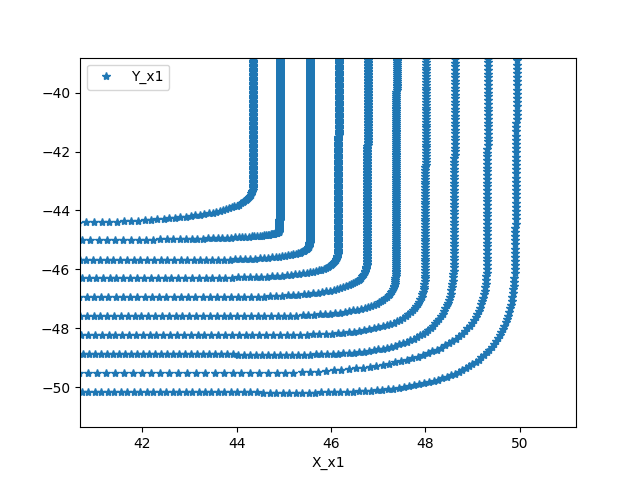

In [14]:
%matplotlib notebook
print(path_k)
#steps_opt.plot(x = steps_opt["X_x"]/80, y = steps_opt["Y_x"]/80, style="*")

#steps_opt.plot(x = "ts", y = ["X_a", "Y_a"], style="*")
#steps_opt.plot(x = "ts", y = ["X_v", "Y_v"], style="*")
#steps_opt.plot(x = "ts", y = ["X_x", "Y_x"], style="*")
if 1:
    steps_opt["X_x1"] = steps_opt["X_x"]/80
    steps_opt["Y_x1"] = steps_opt["Y_x"]/80

    steps_opt.plot(x = "X_x1", y = "Y_x1", style="*")

#code = p.asg.gen_path_code(pr_opt)
#print(len(code))
#print(code)
            

In [ ]:
path_deltas = []

for i in range(0, 20):
    k = 2 - 0.05 * i
    k2 = 2 - 0.05 * (i + 0.5)
    path_deltas.append([   k*100,      0, 50])
    path_deltas.append([       0, -k*100, 50])
    path_deltas.append([ -k2*100,      0, 50])
    path_deltas.append([       0, k2*100, 50])

path_deltas